# Data understanding

## Data collection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.stats import pointbiserialr

df_main = pd.read_csv('listings_data.csv')
df_old = pd.read_excel('./data/data_2022.xlsx')


df_main_pronajem = df_main.loc[df_main['TYP NABÍDKY'] == 'PRONÁJEM']
df_main_prodej = df_main.loc[df_main['TYP NABÍDKY'] == 'PRODEJ']

df_old_pronajem = df_old.loc[df_old['key_offer_type'] == 'pronajem']
df_old_prodej = df_old.loc[df_old['key_offer_type'] == 'prodej']

pd.set_option('display.max_columns', None)

## Data description

### Nabídka pronájmů 2023

In [2]:
print("\nSize of the dataset:")
display(df_main_pronajem.shape)  # check size

print("\nExamples of the dataset:")
display(df_main_pronajem.head())  # check the first few samples

print("\nData types of the dataset:")
display(df_main_pronajem.dtypes)  # check data types

print("\nSummary of the dataset:")
display(df_main_pronajem.describe())  # get summary statistics

print("\nClass imbalance of the dataset:")
display(df_main_pronajem['CENA'].value_counts())  # check for class imbalance

print("\nSummary of the dataset:")
display(df_main_pronajem.info())

print("\nNumber of unique values in each column:")
display(df_main_pronajem.nunique())

# Count of missing values in each column
print("Missing values count in each column:")
display(df_main_pronajem.isnull().sum())


Size of the dataset:


(2996, 39)


Examples of the dataset:


,Index,URL,CENA,POPLATKY ZA SLUŽBY,POPLATKY ZA ENERGII,VRATNÁ KAUCE,TYP NABÍDKY,LOKACE,ČÍSLO INZERÁTU,DISPOZICE,STAV,DOSTUPNÉ OD,VLASTNICTVÍ,TYP BUDOVY,PLOCHA,VYBAVENO,PODLAŽÍ,PENB,Internet,Energie,Balkón,Terasa,Sklep,Lodžie,Bezbariérový přístup,Parkování,Výtah,Garáž,MHD,Pošta,Obchod,Banka,Restaurace,Lékárna,Škola,Mateřská škola,Sportoviště,Hřiště,POPLATKY ZA ENERGIE
2970,1,https://www.bezrealitky.cz/nemovitosti-byty-do...,16 000 Kč,3 200 Kč,NaN,30 000 Kč,PRONÁJEM,"Vorařská, Praha - Modřany",778755.0,1+kk,Novostavba,15. 5. 2023,NaN,Cihla,40 m²,Vybaveno,3.0,C,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,282 m,2 875 m,1 648 m,2 645 m,346 m,1 541 m,1 666 m,1 633 m,1 367 m,798 m,700 Kč
2971,2,https://www.bezrealitky.cz/nemovitosti-byty-do...,23 000 Kč,4 200 Kč,NaN,46 000 Kč,PRONÁJEM,"Pod Bohdalcem I, Praha - Michle",778754.0,2+kk,Velmi dobrý,23. 4. 2023,NaN,Cihla,60 m²,Částečně,3.0,C,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,772 m,1 117 m,227 m,1 275 m,949 m,1 265 m,1 480 m,1 211 m,2 055 m,639 m,1 600 Kč
2972,3,https://www.bezrealitky.cz/nemovitosti-byty-do...,21 000 Kč,500 Kč,NaN,21 000 Kč,PRONÁJEM,"Písecká, Praha - Vinohrady",222297.0,2+kk,NaN,25. 3. 2023,Osobní,Cihla,47 m²,Částečně,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,317 m,329 m,226 m,489 m,57 m,528 m,228 m,141 m,169 m,250 m,3 000 Kč
2973,4,https://www.bezrealitky.cz/nemovitosti-byty-do...,450 €,NaN,NaN,900 €,PRONÁJEM,"Donnerova, Karlova Ves, Bratislavský kraj",776227.0,Jednopokojový,Velmi dobrý,1. 5. 2023,NaN,Panel,40 m²,Vybaveno,2.0,E,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,237 m,795 m,248 m,657 m,301 m,738 m,497 m,459 m,951 m,179 m,90 €
2974,5,https://www.bezrealitky.cz/nemovitosti-byty-do...,25 500 Kč,3 200 Kč,NaN,35 000 Kč,PRONÁJEM,"Kloboučnická, Praha - Nusle",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,301 m,786 m,275 m,529 m,302 m,529 m,621 m,428 m,755 m,485 m,NaN



Data types of the dataset:


Index                     int64
URL                      object
CENA                     object
POPLATKY ZA SLUŽBY       object
POPLATKY ZA ENERGII     float64
VRATNÁ KAUCE             object
TYP NABÍDKY              object
LOKACE                   object
ČÍSLO INZERÁTU          float64
DISPOZICE                object
STAV                     object
DOSTUPNÉ OD              object
VLASTNICTVÍ              object
TYP BUDOVY               object
PLOCHA                   object
VYBAVENO                 object
PODLAŽÍ                 float64
PENB                     object
Internet                float64
Energie                 float64
Balkón                  float64
Terasa                  float64
Sklep                   float64
Lodžie                  float64
Bezbariérový přístup    float64
Parkování               float64
Výtah                   float64
Garáž                   float64
MHD                      object
Pošta                    object
Obchod                   object
Banka   


Summary of the dataset:


,Index,POPLATKY ZA ENERGII,ČÍSLO INZERÁTU,PODLAŽÍ,Internet,Energie,Balkón,Terasa,Sklep,Lodžie,Bezbariérový přístup,Parkování,Výtah,Garáž
count,2996.000000,0.0,2465.000000,2406.000000,2465.0,2465.0,160.0,21.0,286.0,30.0,219.0,1292.0,851.0,207.0
mean,375.001001,NaN,711811.698580,3.062344,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,216.255310,NaN,125110.111655,2.175716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,NaN,16640.000000,-1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,188.000000,NaN,711666.000000,2.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,375.000000,NaN,770380.000000,3.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,562.000000,NaN,776207.000000,4.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,750.000000,NaN,778755.000000,30.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0



Class imbalance of the dataset:


15 000 Kč    104
14 000 Kč    103
10 000 Kč     89
12 000 Kč     81
13 000 Kč     81
            ... 
6 593 Kč       1
25 200 Kč      1
18 300 Kč      1
8 522 Kč       1
8 699 Kč       1
Name: CENA, Length: 515, dtype: int64


Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2996 entries, 2970 to 5965
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Index                 2996 non-null   int64  
 1   URL                   2996 non-null   object 
 2   CENA                  2996 non-null   object 
 3   POPLATKY ZA SLUŽBY    2117 non-null   object 
 4   POPLATKY ZA ENERGII   0 non-null      float64
 5   VRATNÁ KAUCE          2832 non-null   object 
 6   TYP NABÍDKY           2996 non-null   object 
 7   LOKACE                2996 non-null   object 
 8   ČÍSLO INZERÁTU        2465 non-null   float64
 9   DISPOZICE             2464 non-null   object 
 10  STAV                  2309 non-null   object 
 11  DOSTUPNÉ OD           1854 non-null   object 
 12  VLASTNICTVÍ           1493 non-null   object 
 13  TYP BUDOVY            2453 non-null   object 
 14  PLOCHA                2464 non-null   object

None


Number of unique values in each column:


Index                    750
URL                     2967
CENA                     515
POPLATKY ZA SLUŽBY       506
POPLATKY ZA ENERGII        0
VRATNÁ KAUCE             524
TYP NABÍDKY                1
LOKACE                  2081
ČÍSLO INZERÁTU          2442
DISPOZICE                 17
STAV                       5
DOSTUPNÉ OD              219
VLASTNICTVÍ                4
TYP BUDOVY                 5
PLOCHA                   128
VYBAVENO                   3
PODLAŽÍ                   19
PENB                       7
Internet                   1
Energie                    1
Balkón                     1
Terasa                     1
Sklep                      1
Lodžie                     1
Bezbariérový přístup       1
Parkování                  1
Výtah                      1
Garáž                      1
MHD                      652
Pošta                   1406
Obchod                   958
Banka                   1677
Restaurace              1023
Lékárna                 1361
Škola         

Missing values count in each column:


Index                      0
URL                        0
CENA                       0
POPLATKY ZA SLUŽBY       879
POPLATKY ZA ENERGII     2996
VRATNÁ KAUCE             164
TYP NABÍDKY                0
LOKACE                     0
ČÍSLO INZERÁTU           531
DISPOZICE                532
STAV                     687
DOSTUPNÉ OD             1142
VLASTNICTVÍ             1503
TYP BUDOVY               543
PLOCHA                   532
VYBAVENO                1149
PODLAŽÍ                  590
PENB                     758
Internet                 531
Energie                  531
Balkón                  2836
Terasa                  2975
Sklep                   2710
Lodžie                  2966
Bezbariérový přístup    2777
Parkování               1704
Výtah                   2145
Garáž                   2789
MHD                       15
Pošta                     15
Obchod                    15
Banka                     60
Restaurace                15
Lékárna                   24
Škola         

### Nabídka prodejů 2023

In [3]:
print("\nSize of the dataset:")
display(df_main_prodej.shape)  # check size

print("\nExamples of the dataset:")
display(df_main_prodej.head())  # check the first few samples

print("\nData types of the dataset:")
display(df_main_prodej.dtypes)  # check data types

print("\nSummary of the dataset:")
display(df_main_prodej.describe())  # get summary statistics

print("\nClass imbalance of the dataset:")
display(df_main_prodej['CENA'].value_counts())  # check for class imbalance

print("\nSummary of the dataset:")
display(df_main_prodej.info())

print("\nNumber of unique values in each column:")
display(df_main_prodej.nunique())

# Count of missing values in each column
print("Missing values count in each column:")
display(df_main_prodej.isnull().sum())


Size of the dataset:


(2968, 39)


Examples of the dataset:


,Index,URL,CENA,POPLATKY ZA SLUŽBY,POPLATKY ZA ENERGII,VRATNÁ KAUCE,TYP NABÍDKY,LOKACE,ČÍSLO INZERÁTU,DISPOZICE,STAV,DOSTUPNÉ OD,VLASTNICTVÍ,TYP BUDOVY,PLOCHA,VYBAVENO,PODLAŽÍ,PENB,Internet,Energie,Balkón,Terasa,Sklep,Lodžie,Bezbariérový přístup,Parkování,Výtah,Garáž,MHD,Pošta,Obchod,Banka,Restaurace,Lékárna,Škola,Mateřská škola,Sportoviště,Hřiště,POPLATKY ZA ENERGIE
0,1,https://www.bezrealitky.cz/nemovitosti-byty-do...,2 750 000 Kč,NaN,NaN,NaN,PRODEJ,"Čs. armády, Hlučín, Moravskoslezský kraj",776852.0,3+1,Velmi dobrý,1. 6. 2023,Družstevní,Panel,61 m²,Částečně,9.0,F,1.0,1.0,1.0,NaN,1.0,NaN,NaN,1.0,1.0,NaN,258 m,1 324 m,150 m,1 454 m,20 m,766 m,292 m,557 m,806 m,2 512 m,NaN
1,2,https://www.bezrealitky.cz/nemovitosti-byty-do...,2 300 000 Kč,NaN,NaN,NaN,PRODEJ,"Pod Školou, Ústí nad Labem, Ústecký kraj",776129.0,2+1,Dobrý,7. 4. 2023,Osobní,Cihla,58 m²,Částečně,1.0,G,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,236 m,662 m,668 m,978 m,334 m,705 m,432 m,260 m,2 914 m,809 m,NaN
2,3,https://www.bezrealitky.cz/nemovitosti-byty-do...,7 350 000 Kč,NaN,NaN,NaN,PRODEJ,"U Valu, Praha - Ruzyně",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210 m,460 m,434 m,3 949 m,434 m,478 m,438 m,1 884 m,1 264 m,16 m,NaN
3,4,https://www.bezrealitky.cz/nemovitosti-byty-do...,2 260 000 Kč,NaN,NaN,NaN,PRODEJ,"Václava Košaře, Ostrava - Dubina u Ostravy, Mo...",778613.0,3+1,Dobrý,22. 4. 2023,Družstevní,Panel,67 m²,Částečně,1.0,G,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,772 m,1 320 m,529 m,2 083 m,499 m,482 m,1 430 m,707 m,1 348 m,512 m,NaN
4,5,https://www.bezrealitky.cz/nemovitosti-byty-do...,5 356 000 Kč,NaN,NaN,NaN,PRODEJ,"Cihlářova, Praha - Kamýk",778608.0,2+1,Velmi dobrý,NaN,Osobní,Panel,61 m²,Částečně,5.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,394 m,1 073 m,446 m,2 694 m,523 m,547 m,500 m,222 m,635 m,44 m,NaN



Data types of the dataset:


Index                     int64
URL                      object
CENA                     object
POPLATKY ZA SLUŽBY       object
POPLATKY ZA ENERGII     float64
VRATNÁ KAUCE             object
TYP NABÍDKY              object
LOKACE                   object
ČÍSLO INZERÁTU          float64
DISPOZICE                object
STAV                     object
DOSTUPNÉ OD              object
VLASTNICTVÍ              object
TYP BUDOVY               object
PLOCHA                   object
VYBAVENO                 object
PODLAŽÍ                 float64
PENB                     object
Internet                float64
Energie                 float64
Balkón                  float64
Terasa                  float64
Sklep                   float64
Lodžie                  float64
Bezbariérový přístup    float64
Parkování               float64
Výtah                   float64
Garáž                   float64
MHD                      object
Pošta                    object
Obchod                   object
Banka   


Summary of the dataset:


,Index,POPLATKY ZA ENERGII,ČÍSLO INZERÁTU,PODLAŽÍ,Internet,Energie,Balkón,Terasa,Sklep,Lodžie,Bezbariérový přístup,Parkování,Výtah,Garáž
count,2968.000000,0.0,2746.000000,2523.000000,2746.0,2746.0,278.0,47.0,673.0,405.0,130.0,1397.0,442.0,250.0
mean,371.692722,NaN,761702.061544,3.391201,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,214.478108,NaN,20301.504731,2.396707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,NaN,339048.000000,-1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,186.000000,NaN,753798.500000,2.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,371.500000,NaN,767483.500000,3.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,557.000000,NaN,774453.250000,4.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,750.000000,NaN,778613.000000,14.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0



Class imbalance of the dataset:


4 500 000 Kč    25
2 990 000 Kč    24
2 490 000 Kč    24
2 500 000 Kč    23
3 990 000 Kč    22
                ..
8 238 970 Kč     1
2 476 757 Kč     1
1 921 000 Kč     1
6 789 999 Kč     1
3 249 000 Kč     1
Name: CENA, Length: 1246, dtype: int64


Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2968 entries, 0 to 2969
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Index                 2968 non-null   int64  
 1   URL                   2968 non-null   object 
 2   CENA                  2967 non-null   object 
 3   POPLATKY ZA SLUŽBY    0 non-null      object 
 4   POPLATKY ZA ENERGII   0 non-null      float64
 5   VRATNÁ KAUCE          0 non-null      object 
 6   TYP NABÍDKY           2968 non-null   object 
 7   LOKACE                2968 non-null   object 
 8   ČÍSLO INZERÁTU        2746 non-null   float64
 9   DISPOZICE             2746 non-null   object 
 10  STAV                  2742 non-null   object 
 11  DOSTUPNÉ OD           804 non-null    object 
 12  VLASTNICTVÍ           2678 non-null   object 
 13  TYP BUDOVY            2744 non-null   object 
 14  PLOCHA                2746 non-null   object 
 

None


Number of unique values in each column:


Index                    750
URL                     2948
CENA                    1246
POPLATKY ZA SLUŽBY         0
POPLATKY ZA ENERGII        0
VRATNÁ KAUCE               0
TYP NABÍDKY                1
LOKACE                  2231
ČÍSLO INZERÁTU          2734
DISPOZICE                 16
STAV                       5
DOSTUPNÉ OD              181
VLASTNICTVÍ                4
TYP BUDOVY                 5
PLOCHA                   158
VYBAVENO                   3
PODLAŽÍ                   15
PENB                       7
Internet                   1
Energie                    1
Balkón                     1
Terasa                     1
Sklep                      1
Lodžie                     1
Bezbariérový přístup       1
Parkování                  1
Výtah                      1
Garáž                      1
MHD                      692
Pošta                   1384
Obchod                  1076
Banka                   1742
Restaurace              1200
Lékárna                 1406
Škola         

Missing values count in each column:


Index                      0
URL                        0
CENA                       1
POPLATKY ZA SLUŽBY      2968
POPLATKY ZA ENERGII     2968
VRATNÁ KAUCE            2968
TYP NABÍDKY                0
LOKACE                     0
ČÍSLO INZERÁTU           222
DISPOZICE                222
STAV                     226
DOSTUPNÉ OD             2164
VLASTNICTVÍ              290
TYP BUDOVY               224
PLOCHA                   222
VYBAVENO                 224
PODLAŽÍ                  445
PENB                    2177
Internet                 222
Energie                  222
Balkón                  2690
Terasa                  2921
Sklep                   2295
Lodžie                  2563
Bezbariérový přístup    2838
Parkování               1571
Výtah                   2526
Garáž                   2718
MHD                      230
Pošta                    230
Obchod                   230
Banka                    372
Restaurace               231
Lékárna                  259
Škola         

### Nabídka pronájmů 2022

In [4]:
print("\nSize of the dataset:")
display(df_old_pronajem.shape)  # check size

print("\nExamples of the dataset:")
display(df_old_pronajem.tail(30))  # check the first few samples

print("\nData types of the dataset:")
display(df_old_pronajem.dtypes)  # check data types

print("\nSummary of the dataset:")
display(df_old_pronajem.describe())  # get summary statistics

print("\nClass imbalance of the dataset:")
display(df_old_pronajem['price'].value_counts())  # check for class imbalance

print("\nSummary of the dataset:")
display(df_old_pronajem.info())

print("\nNumber of unique values in each column:")
display(df_old_pronajem.nunique())

# Count of missing values in each column
print("Missing values count in each column:")
display(df_old_pronajem.isnull().sum())


Size of the dataset:


(2220, 36)


Examples of the dataset:


,Unnamed: 0,id,uri,lat,lng,price,currency,key_offer_type,key_disposition,surface,utilities,facilities,floor,balcony,terrace,cellar,loggia,parking,elevator,garage,public_transport_stop,post_office,store,bank,restaurant,pharmacy,school,kindergarten,sport_field,playground,condition,property_type,building_type,penb,deposit,deposit_by_price
2190,3513,559599,559599-nabidka-pronajem-bytu,49.715147,15.676625,7000,CZK,pronajem,1-1,55,5000.0,Částečně,3,0,0,1,0,1,0,0,646,1003,657,1096,526,510,405,646,517,759,Dobrý,Osobní,Cihla,D,13000.000000,1.857143
2191,3514,545926,545926-nabidka-pronajem-bytu-na-parcelach-cesk...,50.076425,14.888406,16000,CZK,pronajem,3-1,120,3500.0,Částečně,2,1,0,0,0,0,0,0,602,2900,2800,2900,2900,2700,819,565,3000,288,None,Osobní,Cihla,None,32000.000000,2.000000
2192,3515,545805,545805-nabidka-pronajem-bytu-novackova-brno-mesto,49.208199,16.629481,12000,CZK,pronajem,1-1,33,1500.0,Částečně,2,0,0,0,0,0,0,0,39,405,198,567,189,103,287,611,560,747,Dobrý,Osobní,Cihla,None,12000.000000,1.000000
2193,3516,541932,541932-nabidka-pronajem-bytu,50.137833,14.509755,13000,CZK,pronajem,2-1,52,3400.0,Vybavený,2,1,0,0,0,0,0,0,107,566,288,672,194,143,329,732,482,136,None,Osobní,Cihla,None,22000.000000,1.692308
2194,3517,541583,541583-nabidka-pronajem-bytu,50.042867,14.442780,14000,CZK,pronajem,2-1,67,3800.0,Částečně,2,0,0,0,0,0,0,0,197,180,199,440,197,212,414,256,693,230,None,Osobní,Cihla,None,20000.000000,1.428571
2195,3518,533302,533302-nabidka-pronajem-bytu-svornosti-praha,50.071786,14.408697,15000,CZK,pronajem,2-1,60,4000.0,Vybavený,1,0,0,0,0,0,0,0,114,552,102,48,41,450,591,920,964,450,None,Ostatní,Cihla,G,25000.000000,1.666667
2196,3519,532574,532574-nabidka-pronajem-bytu,49.999123,14.410768,12000,CZK,pronajem,1-kk,38,2455.0,Vybavený,1,0,1,0,0,0,0,0,72,1035,937,1130,304,785,923,785,514,137,None,Osobní,Nízkoenergetický,B,12000.000000,1.000000
2197,3520,512262,512262-nabidka-pronajem-bytu-nad-bertramkou,50.069933,14.392351,9900,CZK,pronajem,1-kk,26,2900.0,Vybavený,1,0,0,1,0,0,0,0,217,799,671,878,468,885,690,1102,346,542,Dobrý,Osobní,Cihla,None,25000.000000,2.525253
2198,3521,510775,510775-nabidka-pronajem-bytu-nabrezi-zavodu-mi...,50.037045,15.758875,10000,CZK,pronajem,2-1,52,4500.0,Částečně,7,0,0,0,1,0,1,0,297,578,607,617,711,554,218,1260,507,653,None,Osobní,Panel,None,25000.000000,2.500000
2199,3522,504474,504474-nabidka-pronajem-bytu-ostravska,49.896137,18.193967,7500,CZK,pronajem,1-kk,40,500.0,Nevybavený,1,0,1,0,0,0,0,0,133,848,32,767,392,195,590,746,786,551,Dobrý,Osobní,Cihla,None,10000.000000,1.333333



Data types of the dataset:


Unnamed: 0                 int64
id                         int64
uri                       object
lat                      float64
lng                      float64
price                      int64
currency                  object
key_offer_type            object
key_disposition           object
surface                    int64
utilities                float64
facilities                object
floor                      int64
balcony                    int64
terrace                    int64
cellar                     int64
loggia                     int64
parking                    int64
elevator                   int64
garage                     int64
public_transport_stop      int64
post_office                int64
store                      int64
bank                       int64
restaurant                 int64
pharmacy                   int64
school                     int64
kindergarten               int64
sport_field                int64
playground                 int64
condition 


Summary of the dataset:


,Unnamed: 0,id,lat,lng,price,surface,utilities,floor,balcony,terrace,cellar,loggia,parking,elevator,garage,public_transport_stop,post_office,store,bank,restaurant,pharmacy,school,kindergarten,sport_field,playground,deposit,deposit_by_price
count,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000
mean,1872.944595,629894.093243,49.938388,15.322042,13824.435586,52.703153,4119.855856,3.068919,0.306757,0.101351,0.409910,0.080631,0.325225,0.435135,0.086937,268.347297,820.412613,455.718018,1313.846847,466.499099,770.328378,651.723423,996.685135,1120.796847,555.185135,21838.265916,1.638248
std,1081.615096,138408.453680,0.355788,1.519761,7602.507626,22.681955,3203.113267,2.369672,0.461251,0.301861,0.491928,0.272328,0.468564,0.495886,0.281806,278.400416,1018.957247,1016.100340,2100.848314,1289.572115,1220.175813,819.701899,1464.324019,1426.423466,885.542186,12274.020209,0.500557
min,0.000000,6603.000000,48.752639,12.185680,2000.000000,12.000000,120.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,3.000000,4.000000,2000.000000,0.083333
25%,881.500000,597420.750000,49.795058,14.415690,9000.000000,38.000000,2322.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,137.000000,413.500000,149.000000,356.000000,137.000000,281.000000,291.000000,370.750000,449.000000,217.000000,14000.000000,1.205460
50%,1918.000000,705339.500000,50.057067,14.482255,12700.000000,50.000000,3117.500000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,221.000000,650.500000,278.000000,692.000000,286.000000,471.000000,449.000000,610.000000,742.500000,361.000000,19500.000000,1.666667
75%,2865.250000,709365.250000,50.099144,16.577880,16000.000000,62.000000,4500.000000,4.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,331.000000,986.000000,490.250000,1300.000000,493.250000,768.000000,710.000000,1050.000000,1179.500000,575.250000,26000.000000,2.000000
max,3544.000000,711040.000000,50.854330,18.623375,150000.000000,322.000000,17083.333333,48.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5000.000000,36500.000000,36100.000000,28400.000000,37200.000000,14600.000000,11600.000000,35300.000000,24300.000000,15900.000000,165000.000000,3.160920



Class imbalance of the dataset:


12000    109
15000     97
14000     90
13000     87
10000     82
        ... 
12670      1
7570       1
20500      1
3650       1
13525      1
Name: price, Length: 369, dtype: int64


Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2220 entries, 0 to 2219
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             2220 non-null   int64  
 1   id                     2220 non-null   int64  
 2   uri                    2220 non-null   object 
 3   lat                    2220 non-null   float64
 4   lng                    2220 non-null   float64
 5   price                  2220 non-null   int64  
 6   currency               2220 non-null   object 
 7   key_offer_type         2220 non-null   object 
 8   key_disposition        2220 non-null   object 
 9   surface                2220 non-null   int64  
 10  utilities              2220 non-null   float64
 11  facilities             2220 non-null   object 
 12  floor                  2220 non-null   int64  
 13  balcony                2220 non-null   int64  
 14  terrace                2220 non

None


Number of unique values in each column:


Unnamed: 0               2220
id                       2220
uri                      2220
lat                      2119
lng                      2133
price                     369
currency                    1
key_offer_type              1
key_disposition            10
surface                   123
utilities                 443
facilities                  4
floor                      18
balcony                     2
terrace                     2
cellar                      2
loggia                      2
parking                     2
elevator                    2
garage                      2
public_transport_stop     609
post_office              1022
store                     827
bank                     1029
restaurant                843
pharmacy                  998
school                    931
kindergarten             1021
sport_field              1057
playground                859
condition                   6
property_type               3
building_type               6
penb      

Missing values count in each column:


Unnamed: 0               0
id                       0
uri                      0
lat                      0
lng                      0
price                    0
currency                 0
key_offer_type           0
key_disposition          0
surface                  0
utilities                0
facilities               0
floor                    0
balcony                  0
terrace                  0
cellar                   0
loggia                   0
parking                  0
elevator                 0
garage                   0
public_transport_stop    0
post_office              0
store                    0
bank                     0
restaurant               0
pharmacy                 0
school                   0
kindergarten             0
sport_field              0
playground               0
condition                0
property_type            0
building_type            0
penb                     0
deposit                  0
deposit_by_price         0
dtype: int64

### Nabídka prodejů 2022

In [5]:
print("\nSize of the dataset:")
display(df_old_prodej.shape)  # check size

print("\nExamples of the dataset:")
display(df_old_prodej.head(10))  # check the first few samples

print("\nData types of the dataset:")
display(df_old_prodej.dtypes)  # check data types

print("\nSummary of the dataset:")
display(df_old_prodej.describe())  # get summary statistics

print("\nClass imbalance of the dataset:")
display(df_old_prodej['price'].value_counts())  # check for class imbalance

print("\nSummary of the dataset:")
display(df_old_prodej.info())

print("\nNumber of unique values in each column:")
display(df_old_prodej.nunique())

# Count of missing values in each column
print("Missing values count in each column:")
display(df_old_prodej.isnull().sum())


Size of the dataset:


(931, 36)


Examples of the dataset:


,Unnamed: 0,id,uri,lat,lng,price,currency,key_offer_type,key_disposition,surface,utilities,facilities,floor,balcony,terrace,cellar,loggia,parking,elevator,garage,public_transport_stop,post_office,store,bank,restaurant,pharmacy,school,kindergarten,sport_field,playground,condition,property_type,building_type,penb,deposit,deposit_by_price
2220,1,710804,710804-nabidka-prodej-bytu-na-dlouhych-plzen,49.750050,13.415810,4550000,CZK,prodej,3-1,74,NaN,Nevybavený,4,1,0,1,1,1,1,0,63,111,311,2800,359,428,259,645,665,170,Velmi dobrý,Osobní,Panel,C,NaN,NaN
2221,3,710799,710799-nabidka-prodej-bytu-jozefa-gabcika-pard...,50.052230,15.751670,6690000,CZK,prodej,3-kk,80,NaN,Částečně,4,1,0,1,0,1,1,0,408,774,839,1037,713,690,797,623,4000,198,Novostavba,Osobní,Cihla,C,NaN,NaN
2222,5,710796,710796-nabidka-prodej-bytu-na-vysluni,50.251948,14.512914,2969400,CZK,prodej,1-1,36,NaN,None,4,0,0,1,1,0,1,0,445,1160,185,549,692,802,466,344,1102,321,Dobrý,Osobní,Panel,None,NaN,NaN
2223,6,710795,710795-nabidka-prodej-bytu-na-vysluni,50.549556,14.128920,2650000,CZK,prodej,2-kk,41,NaN,None,2,0,0,1,0,0,1,0,296,840,535,2400,385,278,505,2300,217,888,Velmi dobrý,Osobní,Panel,None,NaN,NaN
2224,13,710784,710784-nabidka-prodej-bytu-merhautova-brno,49.203630,16.621712,9490000,CZK,prodej,3-kk,76,NaN,Částečně,2,0,0,0,0,0,0,0,201,886,5,230,122,195,272,336,44,707,Velmi dobrý,Osobní,Cihla,G,NaN,NaN
2225,15,710782,710782-nabidka-prodej-bytu-cerna-cesta-olomouc,49.600570,17.269160,5299000,CZK,prodej,3-1,73,NaN,Nevybavený,4,1,0,1,1,1,1,0,248,971,464,881,697,851,402,645,2100,283,Velmi dobrý,Osobní,Panel,C,NaN,NaN
2226,17,710780,710780-nabidka-prodej-bytu-sazovicka-hlavni-me...,50.057730,14.284030,6000000,CZK,prodej,2-kk,39,NaN,Vybavený,3,0,1,0,0,0,0,0,305,987,679,609,742,734,131,3500,955,171,Velmi dobrý,Osobní,Cihla,C,NaN,NaN
2227,19,710775,710775-nabidka-prodej-bytu-mattioliho-hlavni-m...,50.052530,14.511680,7150000,CZK,prodej,1-kk,38,NaN,Částečně,4,0,1,0,0,0,1,1,225,508,498,551,257,504,945,874,761,446,Novostavba,Osobní,Cihla,A,NaN,NaN
2228,20,710774,710774-nabidka-prodej-bytu-u-pruseku,50.057360,14.517663,6999000,CZK,prodej,2-1,68,NaN,None,4,0,0,1,0,0,0,0,181,625,176,587,609,629,837,1092,903,183,Dobrý,Osobní,Panel,None,NaN,NaN
2229,21,710773,710773-nabidka-prodej-bytu-tr-t-g-masaryka,50.754312,14.553415,2130000,CZK,prodej,1-1,34,NaN,None,2,0,0,1,0,0,0,0,643,574,448,396,136,255,593,334,1238,83,Dobrý,Osobní,Panel,None,NaN,NaN



Data types of the dataset:


Unnamed: 0                 int64
id                         int64
uri                       object
lat                      float64
lng                      float64
price                      int64
currency                  object
key_offer_type            object
key_disposition           object
surface                    int64
utilities                float64
facilities                object
floor                      int64
balcony                    int64
terrace                    int64
cellar                     int64
loggia                     int64
parking                    int64
elevator                   int64
garage                     int64
public_transport_stop      int64
post_office                int64
store                      int64
bank                       int64
restaurant                 int64
pharmacy                   int64
school                     int64
kindergarten               int64
sport_field                int64
playground                 int64
condition 


Summary of the dataset:


,Unnamed: 0,id,lat,lng,price,surface,utilities,floor,balcony,terrace,cellar,loggia,parking,elevator,garage,public_transport_stop,post_office,store,bank,restaurant,pharmacy,school,kindergarten,sport_field,playground,deposit,deposit_by_price
count,931.000000,931.000000,931.000000,931.000000,9.310000e+02,931.000000,0.0,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,0.0,0.0
mean,1537.821697,696320.980666,49.983496,14.946753,6.311735e+06,64.026853,NaN,3.283566,0.294307,0.119227,0.664876,0.227712,0.282492,0.572503,0.118153,293.407089,825.183673,444.158969,1565.092374,513.649839,948.148228,757.414608,1170.633727,1352.868958,582.309345,NaN,NaN
std,864.923532,40538.141444,0.364043,1.286328,4.116658e+06,28.593148,NaN,2.255969,0.455976,0.324229,0.472287,0.419581,0.450453,0.494981,0.322962,327.612206,721.866457,696.201646,2244.886344,786.513142,1507.009031,1075.132823,1658.589609,1570.097638,951.062131,NaN,NaN
min,1.000000,167870.000000,48.639230,12.187420,4.400000e+05,16.000000,NaN,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,6.000000,0.000000,12.000000,0.000000,4.000000,21.000000,1.000000,NaN,NaN
25%,844.000000,697634.000000,49.930710,14.383305,3.710000e+06,46.000000,NaN,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,144.000000,436.500000,153.000000,438.500000,162.500000,313.500000,301.000000,361.000000,493.000000,182.500000,NaN,NaN
50%,1557.000000,707058.000000,50.067080,14.477220,5.800000e+06,60.000000,NaN,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,226.000000,667.000000,293.000000,829.000000,330.000000,507.000000,484.000000,571.000000,817.000000,331.000000,NaN,NaN
75%,2163.500000,709275.000000,50.106565,15.119540,7.700000e+06,76.000000,NaN,4.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,338.000000,969.500000,489.000000,1477.000000,547.000000,852.000000,753.500000,1153.500000,1345.500000,562.000000,NaN,NaN
max,3512.000000,711032.000000,50.899100,18.727960,4.290000e+07,256.000000,NaN,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4200.000000,7400.000000,11200.000000,27300.000000,7900.000000,10700.000000,13100.000000,12900.000000,10800.000000,8500.000000,NaN,NaN



Class imbalance of the dataset:


6990000     13
4500000     11
6500000      9
5800000      8
5990000      8
            ..
4899000      1
11599000     1
2800000      1
800000       1
17190000     1
Name: price, Length: 495, dtype: int64


Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 931 entries, 2220 to 3150
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             931 non-null    int64  
 1   id                     931 non-null    int64  
 2   uri                    931 non-null    object 
 3   lat                    931 non-null    float64
 4   lng                    931 non-null    float64
 5   price                  931 non-null    int64  
 6   currency               931 non-null    object 
 7   key_offer_type         931 non-null    object 
 8   key_disposition        931 non-null    object 
 9   surface                931 non-null    int64  
 10  utilities              0 non-null      float64
 11  facilities             931 non-null    object 
 12  floor                  931 non-null    int64  
 13  balcony                931 non-null    int64  
 14  terrace                931 no

None


Number of unique values in each column:


Unnamed: 0               931
id                       931
uri                      931
lat                      874
lng                      880
price                    495
currency                   1
key_offer_type             1
key_disposition           10
surface                  130
utilities                  0
facilities                 4
floor                     14
balcony                    2
terrace                    2
cellar                     2
loggia                     2
parking                    2
elevator                   2
garage                     2
public_transport_stop    451
post_office              622
store                    529
bank                     594
restaurant               563
pharmacy                 608
school                   586
kindergarten             576
sport_field              583
playground               544
condition                  6
property_type              3
building_type              5
penb                       8
deposit       

Missing values count in each column:


Unnamed: 0                 0
id                         0
uri                        0
lat                        0
lng                        0
price                      0
currency                   0
key_offer_type             0
key_disposition            0
surface                    0
utilities                931
facilities                 0
floor                      0
balcony                    0
terrace                    0
cellar                     0
loggia                     0
parking                    0
elevator                   0
garage                     0
public_transport_stop      0
post_office                0
store                      0
bank                       0
restaurant                 0
pharmacy                   0
school                     0
kindergarten               0
sport_field                0
playground                 0
condition                  0
property_type              0
building_type              0
penb                       0
deposit       

## Data quality verification

### Unuse values

In [6]:
# Remove duplicate rows based on the 'URL' column
df_main_prodej.drop_duplicates(subset=['URL'], inplace=True)

df_main_prodej.drop(['Index', 'URL', 'POPLATKY ZA ENERGII', 'ČÍSLO INZERÁTU', 'POPLATKY ZA ENERGIE', 'POPLATKY ZA SLUŽBY', 'VRATNÁ KAUCE', 'Internet', 'Energie', 'Bezbariérový přístup'],
         axis=1, inplace=True)

# Remove duplicate rows based on the 'URL' column
df_main_pronajem.drop_duplicates(subset=['URL'], inplace=True)

df_main_pronajem.drop(['Index', 'URL', 'POPLATKY ZA ENERGII', 'ČÍSLO INZERÁTU', 'POPLATKY ZA ENERGIE', 'Bezbariérový přístup', 'Internet', 'Energie'],
         axis=1, inplace=True)

C:\Users\vikto\AppData\Local\Temp\ipykernel_15440\1464933449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_prodej.drop_duplicates(subset=['URL'], inplace=True)
C:\Users\vikto\AppData\Local\Temp\ipykernel_15440\1464933449.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_prodej.drop(['Index', 'URL', 'POPLATKY ZA ENERGII', 'ČÍSLO INZERÁTU', 'POPLATKY ZA ENERGIE', 'POPLATKY ZA SLUŽBY', 'VRATNÁ KAUCE', 'Internet', 'Energie', 'Bezbariérový přístup'],
C:\Users\vikto\AppData\Local\Temp\ipykernel_15440\1464933449.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [7]:
# Remove duplicate rows based on the 'URL' column
df_old_prodej.drop_duplicates(subset=['uri'], inplace=True)

df_old_prodej.drop(['Unnamed: 0', 'id', 'currency', 'deposit_by_price', 'deposit', 'utilities'],
         axis=1, inplace=True)

# Remove duplicate rows based on the 'URL' column
df_old_pronajem.drop_duplicates(subset=['uri'], inplace=True)

df_old_pronajem.drop(['Unnamed: 0', 'id', 'currency', 'deposit_by_price'],
         axis=1, inplace=True)

C:\Users\vikto\AppData\Local\Temp\ipykernel_15440\3595772363.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_old_prodej.drop_duplicates(subset=['uri'], inplace=True)
C:\Users\vikto\AppData\Local\Temp\ipykernel_15440\3595772363.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_old_prodej.drop(['Unnamed: 0', 'id', 'currency', 'deposit_by_price', 'deposit', 'utilities'],
C:\Users\vikto\AppData\Local\Temp\ipykernel_15440\3595772363.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

### Binary values

In [8]:
# Transorm binary attributes to 0/1

binary_attributes = ['Balkón', 'Terasa', 'Sklep', 'Lodžie', 'Parkování', 'Výtah', 'Garáž']

for attribute in binary_attributes:
    df_main_pronajem[attribute] = df_main_pronajem[attribute].fillna(0).astype(int)

for attribute in binary_attributes:
    df_main_prodej[attribute] = df_main_prodej[attribute].fillna(0).astype(int)

C:\Users\vikto\AppData\Local\Temp\ipykernel_15440\3938787571.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_pronajem[attribute] = df_main_pronajem[attribute].fillna(0).astype(int)
C:\Users\vikto\AppData\Local\Temp\ipykernel_15440\3938787571.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_prodej[attribute] = df_main_prodej[attribute].fillna(0).astype(int)


### Price and distance values

In [9]:
# list of columns where NaN should be replaced with 0
columns_pronajem = ['CENA', 'POPLATKY ZA SLUŽBY', 'VRATNÁ KAUCE']

# list of columns where NaN should be replaced with median
columns_fill_median = ['MHD', 'Pošta', 'Obchod', 'Banka', 'Restaurace', 'Lékárna', 'Škola', 'Mateřská škola', 'Sportoviště', 'Hřiště', 'PLOCHA', 'PODLAŽÍ']

df_main_pronajem = df_main_pronajem.dropna(subset=['VRATNÁ KAUCE'])
df_main_prodej = df_main_prodej.dropna(subset=['CENA'])

# replace NaN with 0 in these columns and convert to integer
for column in columns_pronajem:
    df_main_pronajem[column] = df_main_pronajem[column].fillna('0').replace('\D+', '', regex=True).astype(int)

df_main_prodej['CENA'] = df_main_prodej['CENA'].fillna('0').replace('\D+', '', regex=True).astype(int)

# convert to integer and replace NaN with 'Not specified' in these columns;;;;
def clean_and_fill_median(df, columns):
    for column in columns:
        df[column] = df[column].replace('\D+', '', regex=True)
        df[column] = pd.to_numeric(df[column], errors='coerce')
        median_value = df[column].median(skipna=True)
        df[column] = df[column].fillna(median_value).astype(int)
    return df

df_main_pronajem = clean_and_fill_median(df_main_pronajem, columns_fill_median)
df_main_prodej = clean_and_fill_median(df_main_prodej, columns_fill_median)

In [10]:
columns_floats = ['utilities', 'deposit']

for column in columns_floats:
    df_old_pronajem[column] = df_old_pronajem[column].astype(int)

C:\Users\vikto\AppData\Local\Temp\ipykernel_15440\1122614419.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_old_pronajem[column] = df_old_pronajem[column].astype(int)


### Location values

In [11]:
# Standardize location names
locations = [
    ('Praha', 'Praha'),
    ('Moravskoslezský kraj', 'Moravskoslezský kraj'),
    ('Ústecký kraj', 'Ústecký kraj'),
    ('Pardubický kraj', 'Praha'),
    ('Jihomoravský kraj', 'Jihomoravský kraj'),
    ('Olomoucký kraj', 'Olomoucký kraj'),
    ('Liberecký kraj', 'Liberecký kraj'),
    ('Středočeský kraj', 'Středočeský kraj'),
    ('Plzeňský', 'Plzeňský kraj'),
    ('Královéhradecký kraj', 'Královéhradecký kraj'),
    ('Karlovarský kraj', 'Karlovarský kraj'),
    ('kraj Vysočina', 'kraj Vysočina'),
    ('Zlínský kraj', 'Zlínský kraj'),
    ('Jihočeský kraj', 'Jihočeský kraj')
]

# Drop NaN values in the 'LOKACE' column
df_main_pronajem = df_main_pronajem.dropna(subset=['LOKACE']) 
df_main_prodej = df_main_prodej.dropna(subset=['LOKACE']) 

for old_name, new_name in locations:
    df_main_pronajem.loc[df_main_pronajem['LOKACE'].str.contains(old_name, case=False), 'LOKACE'] = new_name
    df_main_prodej.loc[df_main_prodej['LOKACE'].str.contains(old_name, case=False), 'LOKACE'] = new_name

# Drop rows where 'LOKACE' is not in the location_values list
df_main_pronajem = df_main_pronajem[df_main_pronajem['LOKACE'].isin([new_name for _, new_name in locations])]
df_main_prodej = df_main_prodej[df_main_prodej['LOKACE'].isin([new_name for _, new_name in locations])]

In [12]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Standardize location names
locations_old = [
    ('Prague', 'Praha'),
    ('Moravskoslezský', 'Moravskoslezský kraj'),
    ('Ústecký', 'Ústecký kraj'),
    ('Pardubický', 'Praha'),
    ('Jihomoravský', 'Jihomoravský kraj'),
    ('Olomoucký', 'Olomoucký kraj'),
    ('Liberecký', 'Liberecký kraj'),
    ('Středočeský', 'Středočeský kraj'),
    ('Plzeňský', 'Plzeňský kraj'),
    ('Královéhradecký', 'Královéhradecký kraj'),
    ('Karlovarský', 'Karlovarský kraj'),
    ('Kraj Vysočina', 'kraj Vysočina'),
    ('Zlínský', 'Zlínský kraj'),
    ('Jihočeský', 'Jihočeský kraj')
]

# Load the Shapefile
gdf = gpd.read_file('./geo_data/gadm36_CZE_1.shp')

# Assuming 'df' is your original DataFrame
# Convert 'lat' and 'lng' to a geoseries
geometry_prodej = gpd.points_from_xy(df_old_prodej['lng'], df_old_prodej['lat'])
geometry_pronajem = gpd.points_from_xy(df_old_pronajem['lng'], df_old_pronajem['lat'])

# Make a GeoDataFrame from your original DataFrame
gdf_points_prodej = gpd.GeoDataFrame(df_old_prodej, geometry=geometry_prodej)
gdf_points_pronajem = gpd.GeoDataFrame(df_old_pronajem, geometry=geometry_pronajem)

# Check the CRS of the original data and make sure they match
print("Original CRS:", gdf.crs)  # e.g., EPSG:4326
gdf_points_prodej = gdf_points_prodej.set_crs(gdf.crs)
gdf_points_pronajem = gdf_points_pronajem.set_crs(gdf.crs)

# Spatial join
gdf_joined_prodej = gpd.sjoin(gdf_points_prodej, gdf, how='inner', op='within')
gdf_joined_pronajem = gpd.sjoin(gdf_points_pronajem, gdf, how='inner', op='within')

# Add the district name back to the original DataFrame
df_old_prodej['LOKACE'] = gdf_joined_prodej['NAME_1']
df_old_pronajem['LOKACE'] = gdf_joined_pronajem['NAME_1']


df_old_prodej.drop(['uri', 'lat', 'lng'],
         axis=1, inplace=True)
df_old_pronajem.drop(['uri', 'lat', 'lng'],
         axis=1, inplace=True)

# Drop NaN values in the 'LOKACE' column
df_old_pronajem = df_old_pronajem.dropna(subset=['LOKACE']) 
df_old_prodej = df_old_prodej.dropna(subset=['LOKACE']) 

for old_name, new_name in locations_old:
    df_old_pronajem.loc[df_old_pronajem['LOKACE'].str.contains(old_name, case=False), 'LOKACE'] = new_name
    df_old_prodej.loc[df_old_prodej['LOKACE'].str.contains(old_name, case=False), 'LOKACE'] = new_name

# Drop rows where 'LOKACE' is not in the location_values list
df_old_pronajem = df_old_pronajem[df_old_pronajem['LOKACE'].isin([new_name for _, new_name in locations_old])]
df_old_prodej = df_old_prodej[df_old_prodej['LOKACE'].isin([new_name for _, new_name in locations_old])]

Original CRS: EPSG:4326


d:\Python\lib\site-packages\IPython\core\interactiveshell.py:3382: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
d:\Python\lib\site-packages\IPython\core\interactiveshell.py:3382: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\vikto\AppData\Local\Temp\ipykernel_15440\3760100399.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_old_prodej['LOKACE'] = gdf_joined_prodej['NAME_1']
C:\Users\vikto\AppData\Local\Temp\ipykernel_15440\3760100399.py:46: SettingWithC

### Dates

In [13]:
# Extract year, month, and day as separate features before converting 'DOSTUPNÉ OD' to ordinal values
# df_main['YEAR'] = df_main['DOSTUPNÉ OD'].dt.year
# df_main['MONTH'] = df_main['DOSTUPNÉ OD'].dt.month
# df_main['DAY'] = df_main['DOSTUPNÉ OD'].dt.day

df_main_pronajem.drop(['DOSTUPNÉ OD'],
         axis=1, inplace=True)
df_main_prodej.drop(['DOSTUPNÉ OD'],
         axis=1, inplace=True)

# Add new column 'SCRAPED IN' with all values as 2023
df_main_pronajem['SCRAPED IN'] = 2023
df_main_prodej['SCRAPED IN'] = 2023




In [14]:
df_old_pronajem['SCRAPED IN'] = 2022
df_old_prodej['SCRAPED IN'] = 2022

### Categorical values

In [15]:
# List of categorical columns
categorical_columns = ['DISPOZICE', 'STAV', 'VLASTNICTVÍ', 'TYP BUDOVY', 'VYBAVENO', 'PENB']

# Fill missing values with 'Unknown'
for column in categorical_columns:
    df_main_prodej[column] = df_main_prodej[column].fillna('Unknown')
    df_main_pronajem[column] = df_main_pronajem[column].fillna('Unknown')

In [16]:
categorical_columns_old = ['key_disposition', 'facilities', 'condition', 'property_type', 'building_type', 'penb']

for column in categorical_columns_old:
    df_old_prodej[column] = df_old_prodej[column].replace('None', 'Unknown')
    df_old_pronajem[column] = df_old_pronajem[column].replace('None', 'Unknown')

### Prepared dataframes

In [17]:
# mapping of old column names to new ones for df1
mapping_df1 = {
    'CENA': 'Cena',
    'POPLATKY ZA SLUŽBY': 'Poplatky za služby',
    'VRATNÁ KAUCE': 'Vratná kauce',
    'TYP NABÍDKY': 'Typ nabídky',
    'LOKACE': 'Kraj',
    'DISPOZICE': 'Dispozice',
    'STAV': 'Stav',
    'VLASTNICTVÍ': 'Vlastnictví',
    'TYP BUDOVY': 'Typ budovy',
    'PLOCHA': 'Plocha',
    'VYBAVENO': 'Vybaveno',
    'PODLAŽÍ': 'Podlaží',
    'PENB': 'PENB',
    'Balkón': 'Balkón',
    'Terasa': 'Terasa',
    'Sklep': 'Sklep',
    'Lodžie': 'Lodžie',
    'Bezbariérový přístup': 'Bezbariérový přístup',
    'Parkování': 'Parkování',
    'Výtah': 'Výtah',
    'Garáž': 'Garáž',
    'MHD': 'MHD',
    'Pošta': 'Pošta',
    'Obchod': 'Obchod',
    'Banka': 'Banka',
    'Restaurace': 'Restaurace',
    'Lékárna': 'Lékárna',
    'Škola': 'Škola',
    'Mateřská škola': 'Mateřská škola',
    'Sportoviště': 'Sportoviště',
    'Hřiště': 'Hřiště',
    'SCRAPED IN': 'Data z roku'
}

# mapping of old column names to new ones for df2
mapping_df2 = {
    'price': 'Cena',
    'key_offer_type': 'Typ nabídky',
    'key_disposition': 'Dispozice',
    'surface': 'Plocha',
    'utilities': 'Poplatky za služby',
    'facilities': 'Vybaveno',
    'floor': 'Podlaží',
    'balcony': 'Balkón',
    'terrace': 'Terasa',
    'cellar': 'Sklep',
    'loggia': 'Lodžie',
    'parking': 'Parkování',
    'elevator': 'Výtah',
    'garage': 'Garáž',
    'public_transport_stop': 'MHD',
    'post_office': 'Pošta',
    'store': 'Obchod',
    'bank': 'Banka',
    'restaurant': 'Restaurace',
    'pharmacy': 'Lékárna',
    'school': 'Škola',
    'kindergarten': 'Mateřská škola',
    'sport_field': 'Sportoviště',
    'playground': 'Hřiště',
    'condition': 'Stav',
    'property_type': 'Vlastnictví',
    'building_type': 'Typ budovy',
    'penb': 'PENB',
    'deposit': 'Vratná kauce',
    'LOKACE': 'Kraj',
    'SCRAPED IN': 'Data z roku',
}

df_main_prodej.rename(columns=mapping_df1, inplace=True)
df_main_pronajem.rename(columns=mapping_df1, inplace=True)
df_old_prodej.rename(columns=mapping_df2, inplace=True)
df_old_pronajem.rename(columns=mapping_df2, inplace=True)

df_prodej = pd.concat([df_main_prodej, df_old_prodej], ignore_index=True)
df_pronajem = pd.concat([df_main_pronajem, df_old_pronajem], ignore_index=True)

df_prodej['Typ nabídky'] = df_prodej['Typ nabídky'].replace(['PRODEJ', 'prodej'], 'Prodej')
df_pronajem['Typ nabídky'] = df_pronajem['Typ nabídky'].replace(['PRONÁJEM', 'pronajem'], 'Pronájem')

# replace - with +
df_pronajem['Dispozice'] = df_pronajem['Dispozice'].replace(to_replace=r'\-', value='+', regex=True)
df_prodej['Dispozice'] = df_prodej['Dispozice'].replace(to_replace=r'\-', value='+', regex=True)

# replace garsoniera and Garsoniéra with Garsoniéra
df_pronajem['Dispozice'] = df_pronajem['Dispozice'].replace(['garsoniera', 'Garsoniéra'], 'Garsoniéra')
df_prodej['Dispozice'] = df_prodej['Dispozice'].replace(['garsoniera', 'Garsoniéra'], 'Garsoniéra')

# replace ostatní and Ostatní with Ostatní
df_pronajem['Dispozice'] = df_pronajem['Dispozice'].replace(['ostatní', 'Ostatní'], 'Ostatní')
df_prodej['Dispozice'] = df_prodej['Dispozice'].replace(['ostatní', 'Ostatní'], 'Ostatní')


## Data exploration

### Cleaned dataset df_pronajem

In [18]:
print("\nSize of the dataset:")
display(df_pronajem.shape)

print("\nExamples of the dataset:")
display(df_pronajem.head(30))

print("\nStatistics of the dataset:")
display(df_pronajem.describe())

print("\nClass imbalance of the dataset:")
display(df_pronajem['Dispozice'].value_counts())

print("\nSummary of the dataset:")
display(df_pronajem.info())

print("\nNumber of unique values in each column:")
display(df_pronajem.nunique())


Size of the dataset:


(4963, 31)


Examples of the dataset:


,Cena,Poplatky za služby,Vratná kauce,Typ nabídky,Kraj,Dispozice,Stav,Vlastnictví,Typ budovy,Plocha,Vybaveno,Podlaží,PENB,Balkón,Terasa,Sklep,Lodžie,Parkování,Výtah,Garáž,MHD,Pošta,Obchod,Banka,Restaurace,Lékárna,Škola,Mateřská škola,Sportoviště,Hřiště,Data z roku
0,16000,3200,30000,Pronájem,Praha,1+kk,Novostavba,Unknown,Cihla,40,Vybaveno,3,C,0,0,0,1,0,1,1,282,2875,1648,2645,346,1541,1666,1633,1367,798,2023
1,23000,4200,46000,Pronájem,Praha,2+kk,Velmi dobrý,Unknown,Cihla,60,Částečně,3,C,0,0,1,0,0,1,1,772,1117,227,1275,949,1265,1480,1211,2055,639,2023
2,21000,500,21000,Pronájem,Praha,2+kk,Unknown,Osobní,Cihla,47,Částečně,1,Unknown,0,0,0,0,0,0,0,317,329,226,489,57,528,228,141,169,250,2023
3,25500,3200,35000,Pronájem,Praha,Unknown,Unknown,Unknown,Unknown,52,Unknown,3,Unknown,0,0,0,0,0,0,0,301,786,275,529,302,529,621,428,755,485,2023
4,14000,0,15000,Pronájem,Praha,2+kk,Velmi dobrý,Unknown,Cihla,50,Vybaveno,1,G,0,0,0,0,0,0,0,377,767,251,583,437,494,464,577,333,441,2023
5,12000,500,10000,Pronájem,Jihomoravský kraj,2+1,Velmi dobrý,Osobní,Cihla,61,Částečně,2,G,0,1,0,0,0,0,0,153,184,225,722,205,7528,7029,11584,12241,9653,2023
6,25000,7500,25000,Pronájem,Praha,3+kk,Velmi dobrý,Osobní,Cihla,84,Vybaveno,2,G,1,0,0,0,1,1,1,227,1281,1243,2646,601,1226,712,5135,750,672,2023
7,25000,4967,40000,Pronájem,Praha,3+kk,Novostavba,Unknown,Cihla,100,Částečně,7,C,0,0,0,0,0,1,1,248,1532,375,1742,713,394,1947,748,1242,168,2023
8,12200,2800,24000,Pronájem,Moravskoslezský kraj,Unknown,Unknown,Unknown,Unknown,52,Unknown,3,Unknown,0,0,0,0,0,0,0,288,754,244,507,236,417,538,580,1298,719,2023
9,9000,0,18000,Pronájem,Praha,Unknown,Unknown,Unknown,Unknown,52,Unknown,3,Unknown,0,0,0,0,0,0,0,127,1528,353,623,483,2372,708,2367,1376,74,2023



Statistics of the dataset:


,Cena,Poplatky za služby,Vratná kauce,Plocha,Podlaží,Balkón,Terasa,Sklep,Lodžie,Parkování,Výtah,Garáž,MHD,Pošta,Obchod,Banka,Restaurace,Lékárna,Škola,Mateřská škola,Sportoviště,Hřiště,Data z roku
count,4963.000000,4963.000000,4963.000000,4963.000000,4963.000000,4963.000000,4963.000000,4963.000000,4963.000000,4963.000000,4963.000000,4963.000000,4963.000000,4963.000000,4963.000000,4963.000000,4963.000000,4963.000000,4963.000000,4963.000000,4963.000000,4963.000000,4963.000000
mean,14149.227886,3023.864195,22971.381221,53.314729,3.054201,0.168849,0.049164,0.240580,0.041910,0.395930,0.353214,0.077373,270.762845,861.581100,468.980455,1389.250050,509.782390,869.052186,706.279871,1030.177514,1224.706226,606.073544,2022.552690
std,7870.539919,2866.092297,13481.946761,21.164346,2.152041,0.374657,0.216232,0.427479,0.200404,0.489099,0.478017,0.267209,300.248413,934.946531,934.725494,2030.560484,1071.681788,1272.353563,946.996447,1402.458309,1552.427269,964.861258,0.497266
min,1.000000,0.000000,1.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,2022.000000
25%,9000.000000,1000.000000,15000.000000,40.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,135.000000,411.500000,154.000000,380.500000,149.000000,296.000000,292.000000,356.000000,457.000000,217.000000,2022.000000
50%,13000.000000,2700.000000,20000.000000,52.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,218.000000,630.000000,280.000000,722.000000,295.000000,501.000000,458.000000,588.000000,751.000000,362.000000,2023.000000
75%,17000.000000,4000.000000,28000.000000,62.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,325.000000,1037.000000,492.000000,1640.000000,518.000000,830.000000,712.000000,1113.500000,1373.000000,605.000000,2023.000000
max,150000.000000,22500.000000,240000.000000,322.000000,48.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8560.000000,36500.000000,36100.000000,28400.000000,37200.000000,14600.000000,12212.000000,35300.000000,24501.000000,15900.000000,2023.000000



Class imbalance of the dataset:


2+kk          1192
2+1            934
1+kk           795
1+1            527
3+1            469
Unknown        412
3+kk           330
Garsoniéra     159
4+kk            56
4+1             55
Ostatní         26
5+1              4
5+kk             3
6+kk             1
Name: Dispozice, dtype: int64


Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4963 entries, 0 to 4962
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Cena                4963 non-null   int64 
 1   Poplatky za služby  4963 non-null   int32 
 2   Vratná kauce        4963 non-null   int32 
 3   Typ nabídky         4963 non-null   object
 4   Kraj                4963 non-null   object
 5   Dispozice           4963 non-null   object
 6   Stav                4963 non-null   object
 7   Vlastnictví         4963 non-null   object
 8   Typ budovy          4963 non-null   object
 9   Plocha              4963 non-null   int64 
 10  Vybaveno            4963 non-null   object
 11  Podlaží             4963 non-null   int64 
 12  PENB                4963 non-null   object
 13  Balkón              4963 non-null   int64 
 14  Terasa              4963 non-null   int64 
 15  Sklep               4963 non-null   int64 
 16 

None


Number of unique values in each column:


Cena                   556
Poplatky za služby     734
Vratná kauce           719
Typ nabídky              1
Kraj                    13
Dispozice               14
Stav                     6
Vlastnictví              5
Typ budovy               6
Plocha                 144
Vybaveno                 6
Podlaží                 22
PENB                     8
Balkón                   2
Terasa                   2
Sklep                    2
Lodžie                   2
Parkování                2
Výtah                    2
Garáž                    2
MHD                    763
Pošta                 1674
Obchod                1157
Banka                 2006
Restaurace            1226
Lékárna               1636
Škola                 1431
Mateřská škola        1731
Sportoviště           1948
Hřiště                1308
Data z roku              2
dtype: int64

### Cleaned dataset df_prodej

In [19]:
print("\nSize of the dataset:")
display(df_prodej.shape)

print("\nExamples of the dataset:")
display(df_prodej.head(10))

print("\nStatistics of the dataset:")
display(df_prodej.describe())

print("\nClass imbalance of the dataset:")
display(df_prodej['Dispozice'].value_counts())

print("\nSummary of the dataset:")
display(df_prodej.info())

print("\nNumber of unique values in each column:")
display(df_prodej.nunique())


Size of the dataset:


(3863, 29)


Examples of the dataset:


,Cena,Typ nabídky,Kraj,Dispozice,Stav,Vlastnictví,Typ budovy,Plocha,Vybaveno,Podlaží,PENB,Balkón,Terasa,Sklep,Lodžie,Parkování,Výtah,Garáž,MHD,Pošta,Obchod,Banka,Restaurace,Lékárna,Škola,Mateřská škola,Sportoviště,Hřiště,Data z roku
0,2750000,Prodej,Moravskoslezský kraj,3+1,Velmi dobrý,Družstevní,Panel,61,Částečně,9,F,1,0,1,0,1,1,0,258,1324,150,1454,20,766,292,557,806,2512,2023
1,2300000,Prodej,Ústecký kraj,2+1,Dobrý,Osobní,Cihla,58,Částečně,1,G,0,0,0,0,1,0,0,236,662,668,978,334,705,432,260,2914,809,2023
2,7350000,Prodej,Praha,Unknown,Unknown,Unknown,Unknown,63,Unknown,3,Unknown,0,0,0,0,0,0,0,210,460,434,3949,434,478,438,1884,1264,16,2023
3,2260000,Prodej,Moravskoslezský kraj,3+1,Dobrý,Družstevní,Panel,67,Částečně,1,G,0,0,0,1,0,0,0,772,1320,529,2083,499,482,1430,707,1348,512,2023
4,5356000,Prodej,Praha,2+1,Velmi dobrý,Osobní,Panel,61,Částečně,5,Unknown,0,0,0,0,0,0,0,394,1073,446,2694,523,547,500,222,635,44,2023
5,5500000,Prodej,Praha,1+kk,Velmi dobrý,Osobní,Cihla,38,Vybaveno,1,G,0,0,0,0,1,0,0,387,7774,365,7888,1389,7966,8340,3550,8126,4024,2023
6,6100000,Prodej,Praha,3+kk,Dobrý,Osobní,Panel,63,Částečně,2,G,0,0,1,1,0,1,0,155,676,231,1612,462,212,673,303,942,225,2023
7,9450000,Prodej,Praha,Unknown,Unknown,Unknown,Unknown,63,Unknown,3,Unknown,0,0,0,0,0,0,0,159,322,149,275,174,210,102,674,158,552,2023
8,3635000,Prodej,Jihomoravský kraj,3+1,Velmi dobrý,Osobní,Panel,69,Částečně,8,G,0,0,1,0,1,1,0,243,318,92,221,159,205,844,210,294,328,2023
9,5990000,Prodej,Praha,Unknown,Unknown,Unknown,Unknown,63,Unknown,3,Unknown,0,0,0,0,0,0,0,191,661,93,438,126,436,134,323,706,292,2023



Statistics of the dataset:


,Cena,Plocha,Podlaží,Balkón,Terasa,Sklep,Lodžie,Parkování,Výtah,Garáž,MHD,Pošta,Obchod,Banka,Restaurace,Lékárna,Škola,Mateřská škola,Sportoviště,Hřiště,Data z roku
count,3.863000e+03,3863.000000,3863.000000,3863.000000,3863.000000,3863.000000,3863.000000,3863.000000,3863.000000,3863.000000,3863.000000,3863.000000,3863.000000,3863.000000,3863.000000,3863.000000,3863.000000,3863.000000,3863.000000,3863.000000,3863.000000
mean,4.829905e+06,64.826042,3.325395,0.142635,0.040901,0.333678,0.159203,0.426353,0.250582,0.091897,327.433860,929.276210,644.066787,1909.565364,736.454051,1195.555786,1094.609371,1509.659850,1694.704893,834.736992,2022.758996
std,3.792004e+06,26.207450,2.229340,0.349746,0.198086,0.471587,0.365912,0.494610,0.433405,0.288919,635.805975,924.056663,1182.234378,2417.522464,1229.039857,1845.278681,1822.035837,2161.890211,2012.149038,1419.492789,0.427748
min,4.400000e+05,11.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000,8.000000,1.000000,2022.000000
25%,2.470500e+06,50.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,151.000000,426.000000,195.000000,547.000000,215.000000,365.000000,329.000000,386.000000,562.500000,218.000000,2023.000000
50%,3.890000e+06,63.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,231.000000,662.000000,354.000000,1223.000000,405.000000,609.000000,524.000000,662.000000,1106.000000,407.000000,2023.000000
75%,6.250000e+06,75.000000,4.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,336.000000,1119.000000,561.000000,2103.000000,646.500000,1044.000000,815.000000,1560.500000,1926.500000,699.500000,2023.000000
max,8.805000e+07,290.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11982.000000,10887.000000,15419.000000,27300.000000,13851.000000,14265.000000,25606.000000,15750.000000,25473.000000,14201.000000,2023.000000



Class imbalance of the dataset:


3+1           878
2+1           737
2+kk          635
3+kk          460
1+kk          300
1+1           275
Unknown       210
4+1           147
4+kk          137
5+1            23
Garsoniéra     23
Ostatní        21
5+kk           16
6+1             1
Name: Dispozice, dtype: int64


Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3863 entries, 0 to 3862
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Cena            3863 non-null   int64 
 1   Typ nabídky     3863 non-null   object
 2   Kraj            3863 non-null   object
 3   Dispozice       3863 non-null   object
 4   Stav            3863 non-null   object
 5   Vlastnictví     3863 non-null   object
 6   Typ budovy      3863 non-null   object
 7   Plocha          3863 non-null   int64 
 8   Vybaveno        3863 non-null   object
 9   Podlaží         3863 non-null   int64 
 10  PENB            3863 non-null   object
 11  Balkón          3863 non-null   int64 
 12  Terasa          3863 non-null   int64 
 13  Sklep           3863 non-null   int64 
 14  Lodžie          3863 non-null   int64 
 15  Parkování       3863 non-null   int64 
 16  Výtah           3863 non-null   int64 
 17  Garáž           3863 non-nu

None


Number of unique values in each column:


Cena              1449
Typ nabídky          1
Kraj                13
Dispozice           14
Stav                 6
Vlastnictví          5
Typ budovy           6
Plocha             170
Vybaveno             6
Podlaží             15
PENB                 8
Balkón               2
Terasa               2
Sklep                2
Lodžie               2
Parkování            2
Výtah                2
Garáž                2
MHD                760
Pošta             1573
Obchod            1180
Banka             1998
Restaurace        1316
Lékárna           1566
Škola             1465
Mateřská škola    1740
Sportoviště       1932
Hřiště            1353
Data z roku          2
dtype: int64

### Correlation

C:\Users\vikto\AppData\Local\Temp\ipykernel_15440\3685518195.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_matrix = corr_matrix.append(pbc_series.rename(var))
C:\Users\vikto\AppData\Local\Temp\ipykernel_15440\3685518195.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_matrix = corr_matrix.append(pbc_series.rename(var))
C:\Users\vikto\AppData\Local\Temp\ipykernel_15440\3685518195.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_matrix = corr_matrix.append(pbc_series.rename(var))
C:\Users\vikto\AppData\Local\Temp\ipykernel_15440\3685518195.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_matrix = cor

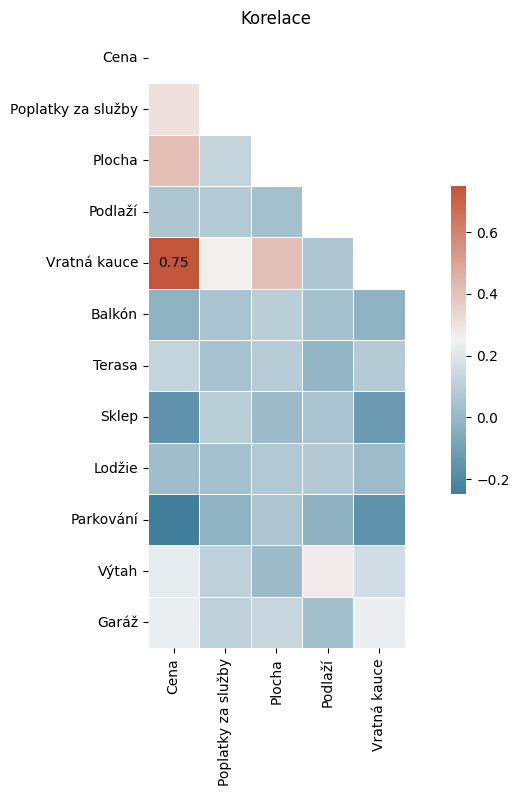

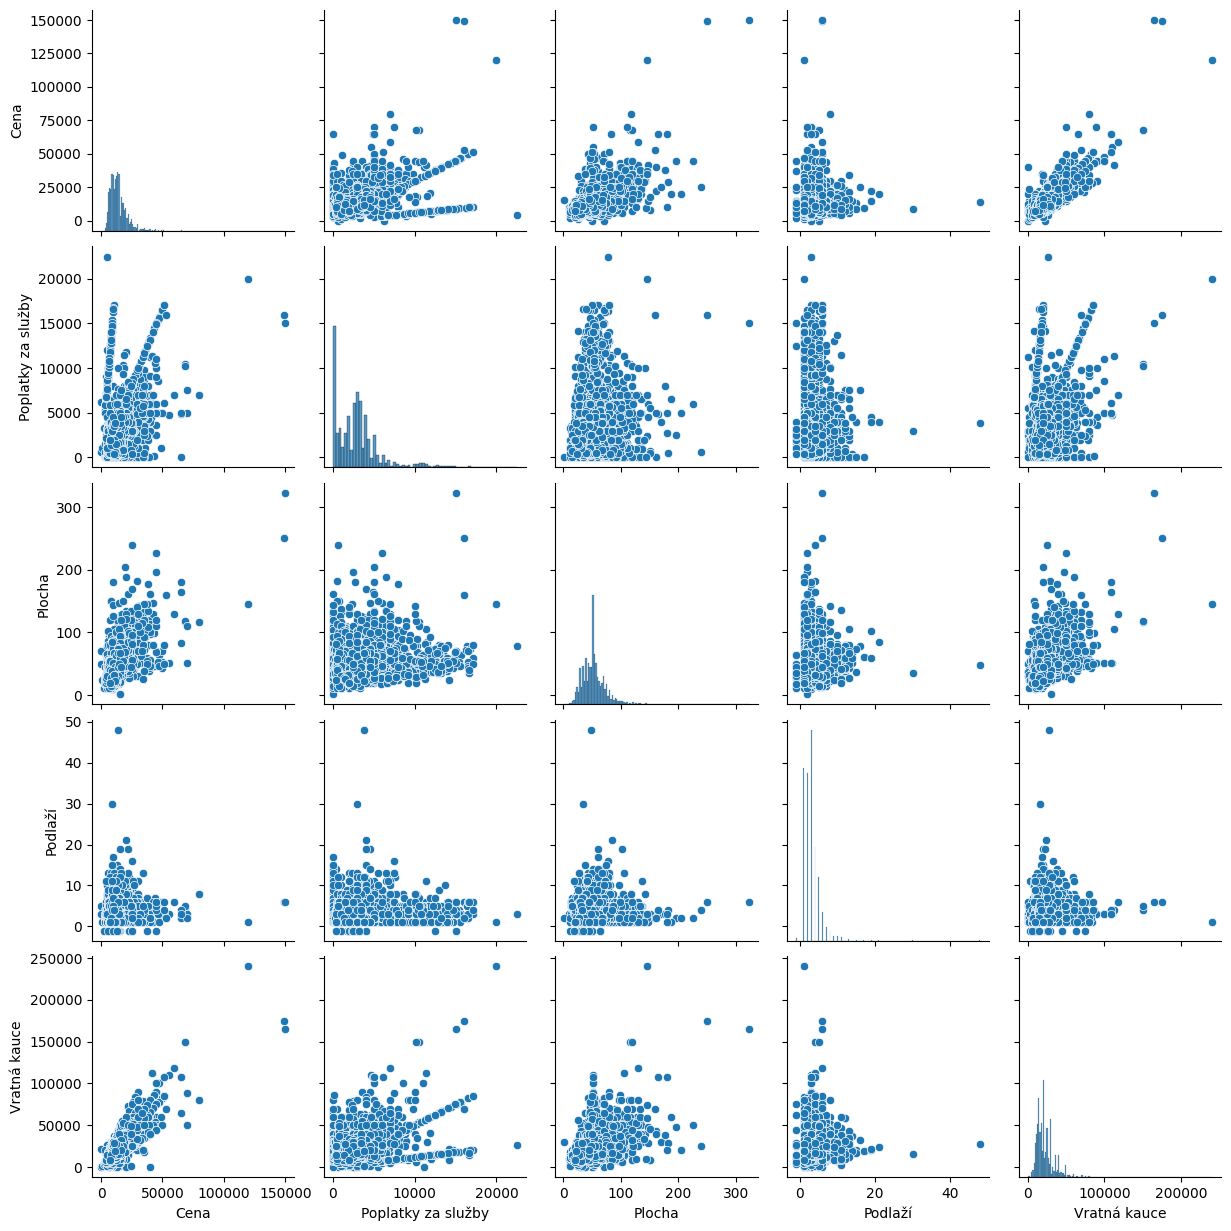

In [20]:
df_correlation = df_pronajem.copy()

# List of continuous variables for Spearman correlation
continuous_vars = ["Cena", "Poplatky za služby", "Plocha", "Podlaží", "Vratná kauce"] # adjust this list based on your data

# Calculate Spearman correlation for continuous variables
corr_matrix = df_correlation[continuous_vars].corr(method='spearman')

# List of binary variables for point-biserial correlation
binary_vars = ["Balkón", "Terasa", "Sklep", "Lodžie", "Parkování", "Výtah", "Garáž"]  # adjust this list based on your data

# Calculate point-biserial correlation for binary variables and append to corr_matrix
for var in binary_vars:
    # Fill NaN values in binary variables with the mode
    df_correlation[var] = df_correlation[var].fillna(df_correlation[var].mode().iloc[0])
    df_correlation[var] = df_correlation[var].astype(float)  # make sure binary variables are float type
    pbc = []
    for other_var in continuous_vars:
        # Fill NaN values in continuous variables with the median
        y = df_correlation[other_var].fillna(df_correlation[other_var].median())
        pbc.append(pointbiserialr(df_correlation[var], y)[0])
    pbc_series = pd.Series(pbc, index=continuous_vars)
    corr_matrix = corr_matrix.append(pbc_series.rename(var))

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=False, cmap=cmap, mask=mask, linewidths=0.5, square=True, cbar_kws={"shrink": .5})

# Overlay significant correlations
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.7:  # choose your threshold here
            plt.text(j+0.5, i+0.5, f"{corr_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='black')

plt.title("Korelace")
plt.show()

# Variables of interest for the pairplot
variables_of_interest = ["Cena", "Poplatky za služby", "Plocha", "Podlaží", "Vratná kauce"]  # replace with your variables
sns.pairplot(df_pronajem[variables_of_interest])
plt.show()

### Price and area for df_pronajem


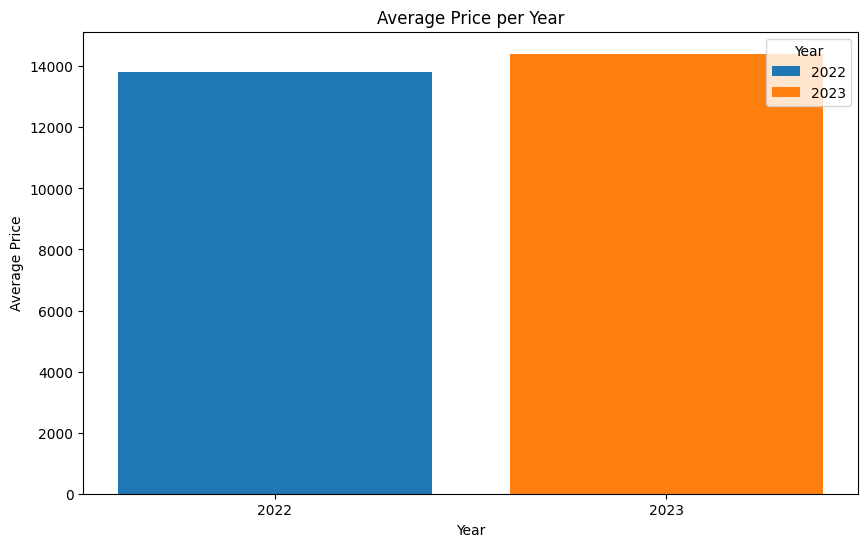

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = df_pronajem.copy()

# Ensure 'Cena' and 'Data z roku' columns are numeric
df['Cena'] = pd.to_numeric(df['Cena'], errors='coerce')
df['Data z roku'] = pd.to_numeric(df['Data z roku'], errors='coerce')

# Group by year and calculate the mean of 'Cena'
grouped_df = df.groupby('Data z roku')['Cena'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
for year in grouped_df['Data z roku'].unique():
    plt.bar(grouped_df[grouped_df['Data z roku']==year]['Data z roku'].astype(str), 
            grouped_df[grouped_df['Data z roku']==year]['Cena'], 
            label=year)
    
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Price per Year')
plt.legend(title='Year')
plt.show()

Dropped rows: 0


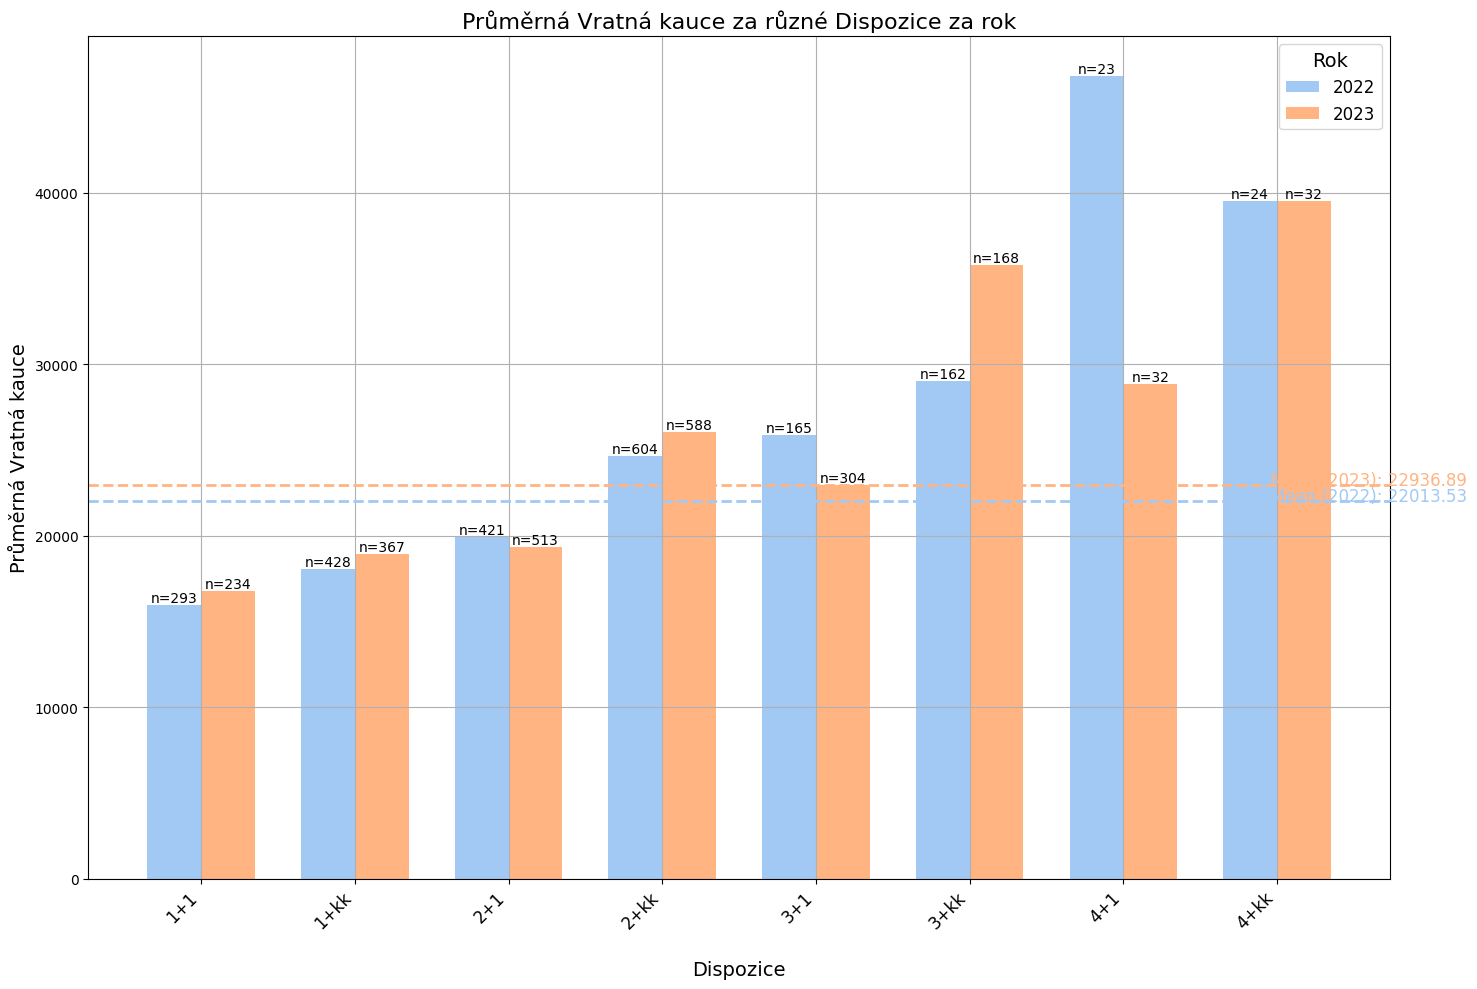

In [22]:
df = df_pronajem.copy()

df['Vratná kauce'] = pd.to_numeric(df['Vratná kauce'], errors='coerce')
df['Data z roku'] = pd.to_numeric(df['Data z roku'], errors='coerce')

desired_dispozice = ['1+1', '1+kk', '2+1', '2+kk', '3+1', '3+kk', '4+1', '4+kk']
df = df[df['Dispozice'].isin(desired_dispozice)]

# Count initial number of rows
initial_rows = df.shape[0]

# Drop rows where 'Poplatky za služby' is 0
df = df[df['Vratná kauce'] != 0]

# Count final number of rows and calculate difference
final_rows = df.shape[0]
dropped_rows = initial_rows - final_rows

print(f"Dropped rows: {dropped_rows}")

# Group by 'Dispozice', 'Data z roku' and calculate the mean of 'Cena'
grouped_df = df.groupby(['Dispozice', 'Data z roku'])['Vratná kauce'].mean().reset_index()
grouped_df_size = df.groupby(['Dispozice', 'Data z roku']).size().reset_index(name='counts')

# Pivot the DataFrame to get Dispozice as index, Data z roku as columns and Cena as values
pivot_df = grouped_df.pivot(index='Dispozice', columns='Data z roku', values='Vratná kauce').fillna(0)
pivot_df_size = grouped_df_size.pivot(index='Dispozice', columns='Data z roku', values='counts').fillna(0)

# Get unique 'Dispozice' and 'Data z roku' values
dispozice_values = pivot_df.index
year_values = pivot_df.columns

# Define the width of the bars and the positions of the bar groups
width = 0.35
ind = np.arange(len(dispozice_values))

# Adjust size of the plot
fig, ax = plt.subplots(figsize=(15, 10))

# Choose a nice color palette
colors = sns.color_palette('pastel')[0:len(year_values)]

# Generate a bar group for each year
for i, year in enumerate(year_values):
    bars = ax.bar(ind - width/2 + i*width, pivot_df[year], width, color=colors[i], label=year)

    # Annotate each bar with the size of the group it represents
    for bar, size in zip(bars, pivot_df_size[year]):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'n={int(size)}', ha='center', va='bottom')

# Set the x-ticks to be the 'Dispozice' values and set the labels
ax.set_xticks(ind)
ax.set_xticklabels(dispozice_values, fontsize=12, rotation=45, ha="right")  # Adjust fontsize and rotation

ax.set_xlabel('Dispozice', fontsize=14, labelpad=20)  # Adjust fontsize and labelpad
ax.set_ylabel('Průměrná Vratná kauce', fontsize=14)
ax.set_title('Průměrná Vratná kauce za různé Dispozice za rok', fontsize=16)
ax.legend(title='Rok', fontsize=12, title_fontsize=14)

# Calculate and add lines for the mean price of each year
for year in year_values:
    mean_price = df[df['Data z roku'] == year]['Vratná kauce'].mean()
    ax.axhline(mean_price, color=colors[year-min(year_values)], linestyle='dashed', linewidth=2)
    ax.text(ax.get_xlim()[1]*0.9, mean_price, f'Mean ({year}): {mean_price:.2f}', fontsize=12, color=colors[year-min(year_values)])

# Add grid for better visibility of data points
ax.grid(True)

# Improve layout for better visibility
plt.tight_layout()
plt.show()

Dropped rows: 0


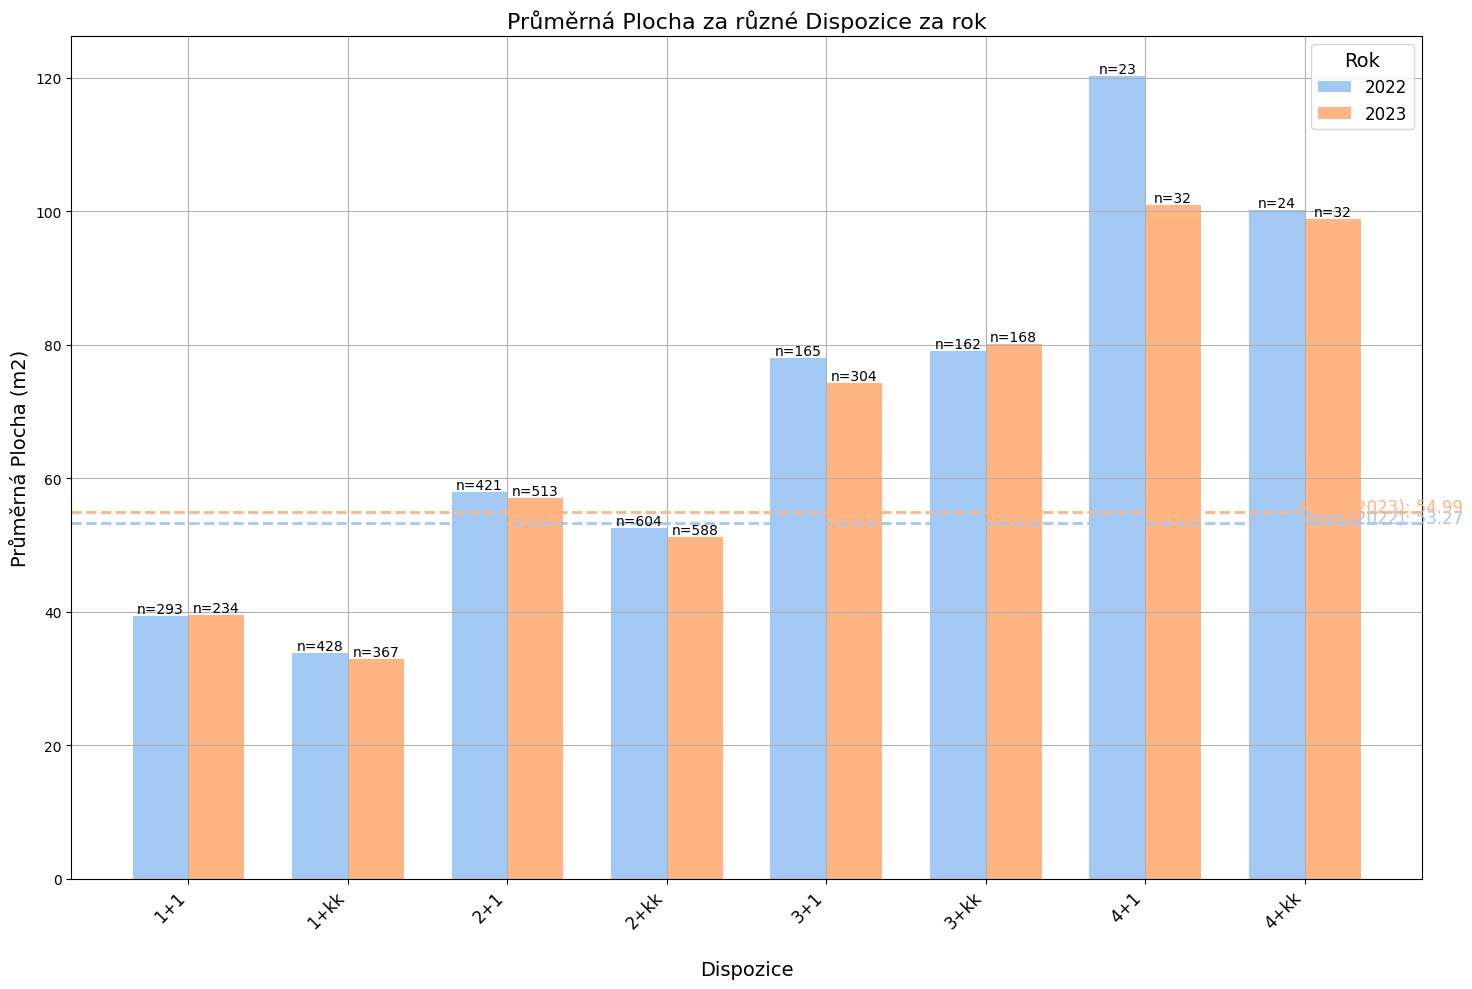

In [23]:
df = df_pronajem.copy()

df['Plocha'] = pd.to_numeric(df['Plocha'], errors='coerce')
df['Data z roku'] = pd.to_numeric(df['Data z roku'], errors='coerce')

desired_dispozice = ['1+1', '1+kk', '2+1', '2+kk', '3+1', '3+kk', '4+1', '4+kk']
df = df[df['Dispozice'].isin(desired_dispozice)]

# Count initial number of rows
initial_rows = df.shape[0]

# Drop rows where 'Poplatky za služby' is 0
df = df[df['Plocha'] != 0]

# Count final number of rows and calculate difference
final_rows = df.shape[0]
dropped_rows = initial_rows - final_rows

print(f"Dropped rows: {dropped_rows}")

# Group by 'Dispozice', 'Data z roku' and calculate the mean of 'Cena'
grouped_df = df.groupby(['Dispozice', 'Data z roku'])['Plocha'].mean().reset_index()
grouped_df_size = df.groupby(['Dispozice', 'Data z roku']).size().reset_index(name='counts')

# Pivot the DataFrame to get Dispozice as index, Data z roku as columns and Cena as values
pivot_df = grouped_df.pivot(index='Dispozice', columns='Data z roku', values='Plocha').fillna(0)
pivot_df_size = grouped_df_size.pivot(index='Dispozice', columns='Data z roku', values='counts').fillna(0)

# Get unique 'Dispozice' and 'Data z roku' values
dispozice_values = pivot_df.index
year_values = pivot_df.columns

# Define the width of the bars and the positions of the bar groups
width = 0.35
ind = np.arange(len(dispozice_values))

# Adjust size of the plot
fig, ax = plt.subplots(figsize=(15, 10))

# Choose a nice color palette
colors = sns.color_palette('pastel')[0:len(year_values)]

# Generate a bar group for each year
for i, year in enumerate(year_values):
    bars = ax.bar(ind - width/2 + i*width, pivot_df[year], width, color=colors[i], label=year)

    # Annotate each bar with the size of the group it represents
    for bar, size in zip(bars, pivot_df_size[year]):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'n={int(size)}', ha='center', va='bottom')

# Set the x-ticks to be the 'Dispozice' values and set the labels
ax.set_xticks(ind)
ax.set_xticklabels(dispozice_values, fontsize=12, rotation=45, ha="right")  # Adjust fontsize and rotation

ax.set_xlabel('Dispozice', fontsize=14, labelpad=20)  # Adjust fontsize and labelpad
ax.set_ylabel('Průměrná Plocha (m2)', fontsize=14)
ax.set_title('Průměrná Plocha za různé Dispozice za rok', fontsize=16)
ax.legend(title='Rok', fontsize=12, title_fontsize=14)

# Calculate and add lines for the mean price of each year
for year in year_values:
    mean_price = df[df['Data z roku'] == year]['Plocha'].mean()
    ax.axhline(mean_price, color=colors[year-min(year_values)], linestyle='dashed', linewidth=2)
    ax.text(ax.get_xlim()[1]*0.9, mean_price, f'Mean ({year}): {mean_price:.2f}', fontsize=12, color=colors[year-min(year_values)])

# Add grid for better visibility of data points
ax.grid(True)

# Improve layout for better visibility
plt.tight_layout()
plt.show()

Dropped rows: 765


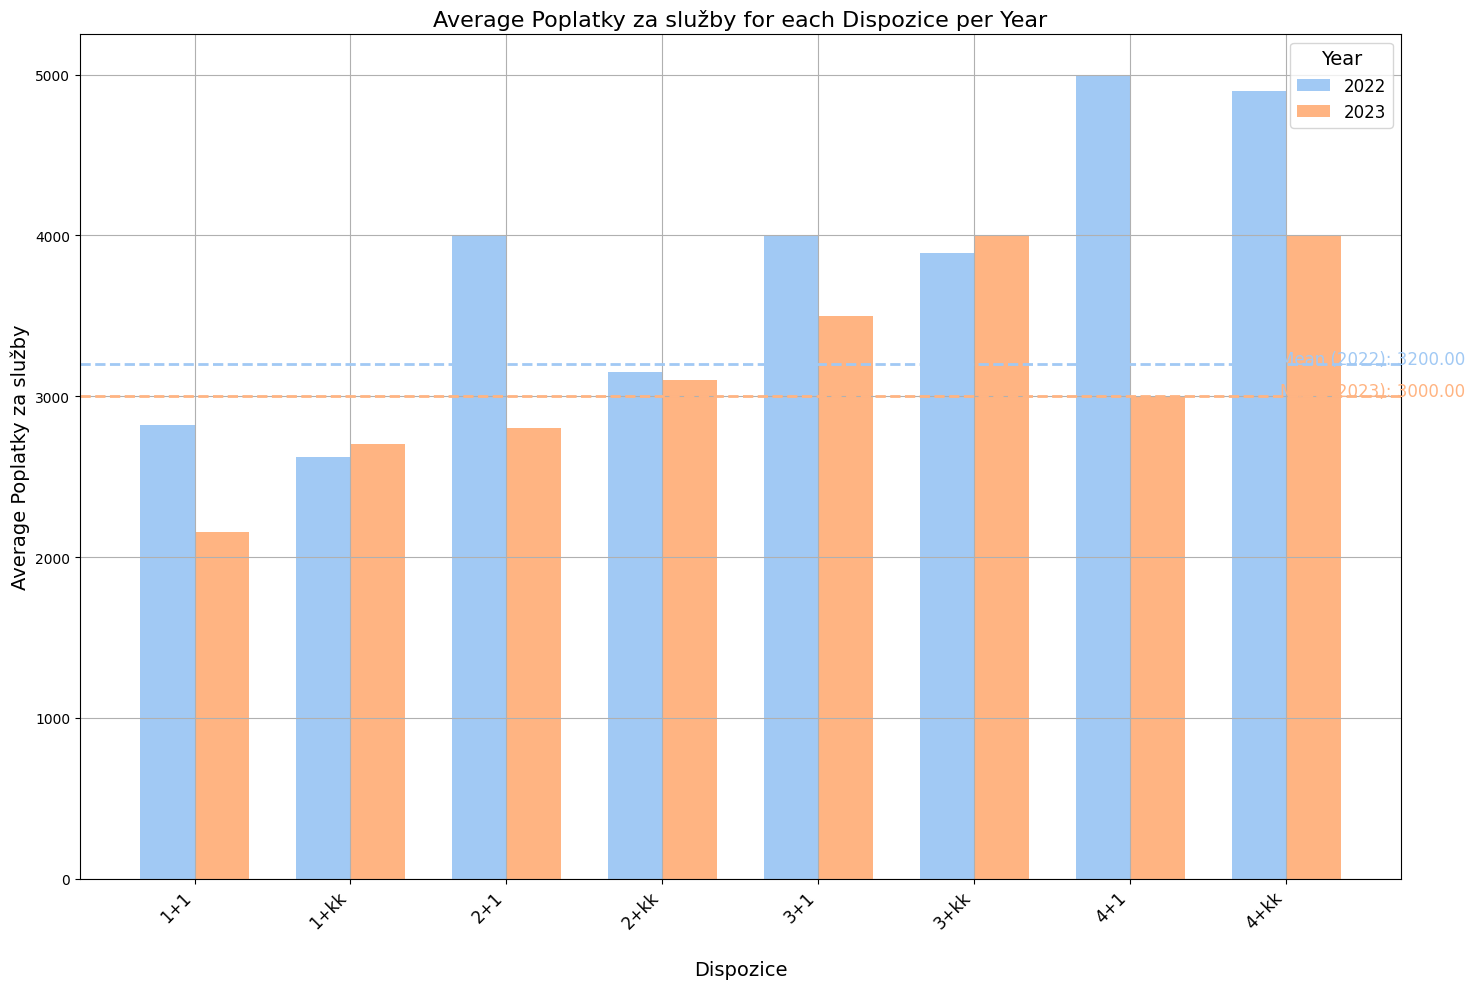

In [24]:
df = df_pronajem.copy()

df['Poplatky za služby'] = pd.to_numeric(df['Poplatky za služby'], errors='coerce')
df['Data z roku'] = pd.to_numeric(df['Data z roku'], errors='coerce')

desired_dispozice = ['1+1', '1+kk', '2+1', '2+kk', '3+1', '3+kk', '4+1', '4+kk']
df = df[df['Dispozice'].isin(desired_dispozice)]

# Count initial number of rows
initial_rows = df.shape[0]

# Drop rows where 'Poplatky za služby' is 0
df = df[df['Poplatky za služby'] != 0]

# Count final number of rows and calculate difference
final_rows = df.shape[0]
dropped_rows = initial_rows - final_rows

print(f"Dropped rows: {dropped_rows}")

# Group by 'Dispozice', 'Data z roku' and calculate the mean of 'Cena'
grouped_df = df.groupby(['Dispozice', 'Data z roku'])['Poplatky za služby'].median().reset_index()

# Pivot the DataFrame to get Dispozice as index, Data z roku as columns and Cena as values
pivot_df = grouped_df.pivot(index='Dispozice', columns='Data z roku', values='Poplatky za služby').fillna(0)

# Get unique 'Dispozice' and 'Data z roku' values
dispozice_values = pivot_df.index
year_values = pivot_df.columns

# Define the width of the bars and the positions of the bar groups
width = 0.35
ind = np.arange(len(dispozice_values))

# Adjust size of the plot
fig, ax = plt.subplots(figsize=(15, 10))

# Choose a nice color palette
colors = sns.color_palette('pastel')[0:len(year_values)]

# Generate a bar group for each year
for i, year in enumerate(year_values):
    ax.bar(ind - width/2 + i*width, pivot_df[year], width, color=colors[i], label=year)

# Set the x-ticks to be the 'Dispozice' values and set the labels
ax.set_xticks(ind)
ax.set_xticklabels(dispozice_values, fontsize=12, rotation=45, ha="right")  # Adjust fontsize and rotation

ax.set_xlabel('Dispozice', fontsize=14, labelpad=20)  # Adjust fontsize and labelpad
ax.set_ylabel('Average Poplatky za služby', fontsize=14)
ax.set_title('Average Poplatky za služby for each Dispozice per Year', fontsize=16)
ax.legend(title='Year', fontsize=12, title_fontsize=14)

# Calculate and add lines for the mean price of each year
for year in year_values:
    mean_price = df[df['Data z roku'] == year]['Poplatky za služby'].median()
    ax.axhline(mean_price, color=colors[year-min(year_values)], linestyle='dashed', linewidth=2)
    ax.text(ax.get_xlim()[1]*0.9, mean_price, f'Mean ({year}): {mean_price:.2f}', fontsize=12, color=colors[year-min(year_values)])

# Add grid for better visibility of data points
ax.grid(True)

# Improve layout for better visibility
plt.tight_layout()
plt.show()

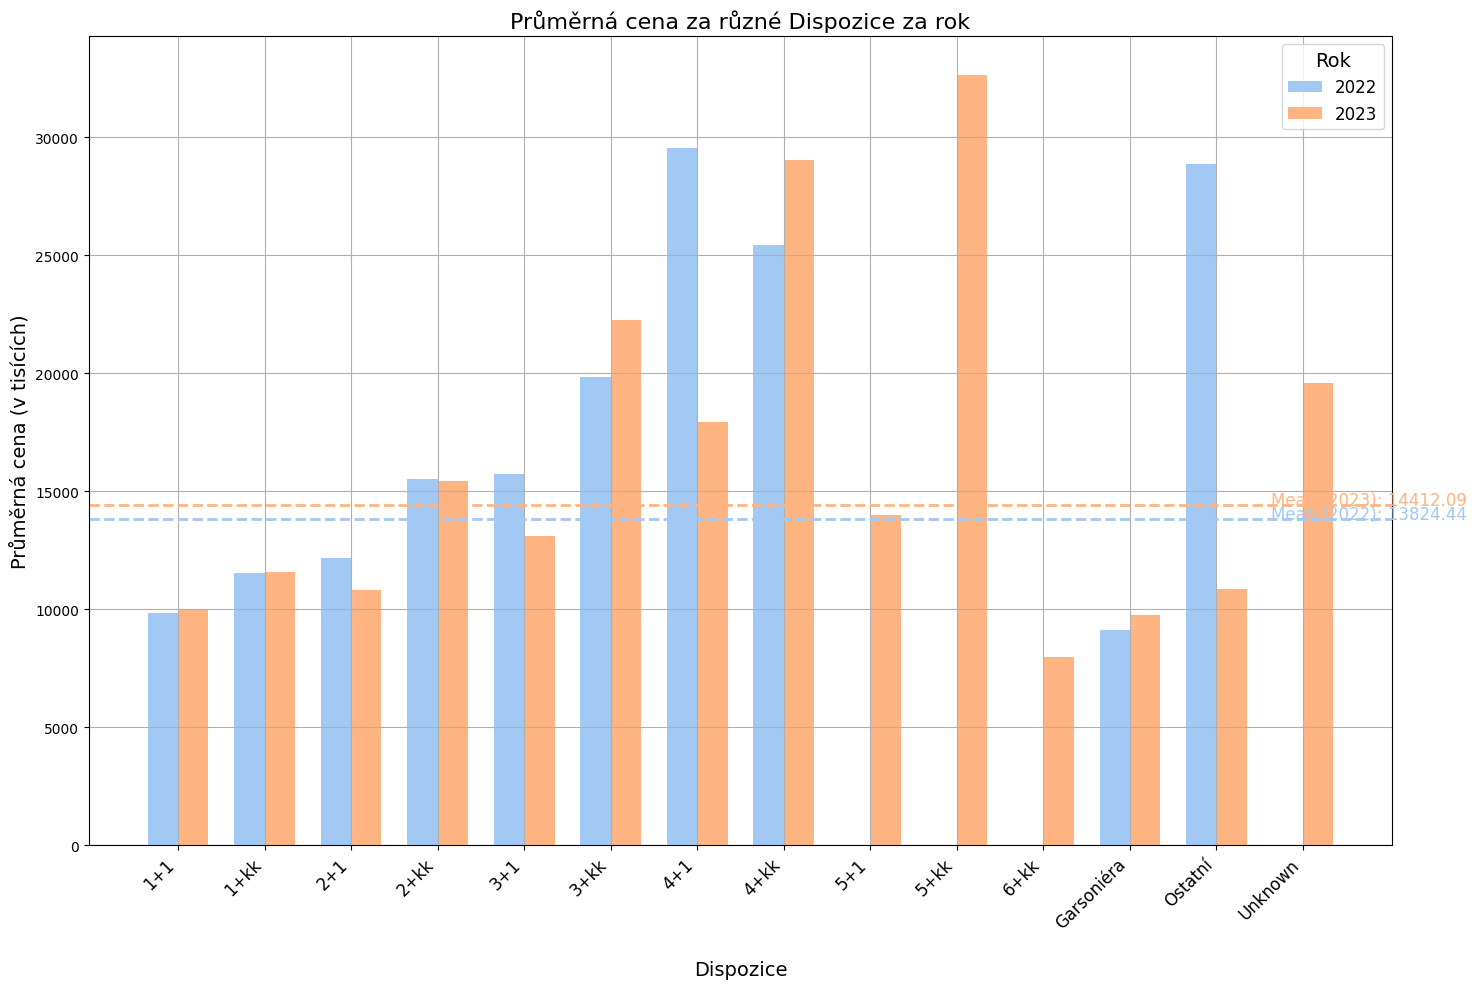

In [25]:
df = df_pronajem.copy()

df['Cena'] = pd.to_numeric(df['Cena'], errors='coerce')
df['Data z roku'] = pd.to_numeric(df['Data z roku'], errors='coerce')

# Group by 'Dispozice', 'Data z roku' and calculate the mean of 'Cena'
grouped_df = df.groupby(['Dispozice', 'Data z roku'])['Cena'].mean().reset_index()

# Pivot the DataFrame to get Dispozice as index, Data z roku as columns and Cena as values
pivot_df = grouped_df.pivot(index='Dispozice', columns='Data z roku', values='Cena').fillna(0)

# Get unique 'Dispozice' and 'Data z roku' values
dispozice_values = pivot_df.index
year_values = pivot_df.columns

# Define the width of the bars and the positions of the bar groups
width = 0.35
ind = np.arange(len(dispozice_values))

# Adjust size of the plot
fig, ax = plt.subplots(figsize=(15, 10))

# Choose a nice color palette
colors = sns.color_palette('pastel')[0:len(year_values)]

# Generate a bar group for each year
for i, year in enumerate(year_values):
    ax.bar(ind - width/2 + i*width, pivot_df[year], width, color=colors[i], label=year)

# Set the x-ticks to be the 'Dispozice' values and set the labels
ax.set_xticks(ind)
ax.set_xticklabels(dispozice_values, fontsize=12, rotation=45, ha="right")  # Adjust fontsize and rotation

ax.set_xlabel('Dispozice', fontsize=14, labelpad=20)  # Adjust fontsize and labelpad
ax.set_ylabel('Průměrná cena (v tisících)', fontsize=14)
ax.set_title('Průměrná cena za různé Dispozice za rok', fontsize=16)
ax.legend(title='Rok', fontsize=12, title_fontsize=14)

# Calculate and add lines for the mean price of each year
for year in year_values:
    mean_price = df[df['Data z roku'] == year]['Cena'].mean()
    ax.axhline(mean_price, color=colors[year-min(year_values)], linestyle='dashed', linewidth=2)
    ax.text(ax.get_xlim()[1]*0.9, mean_price, f'Mean ({year}): {mean_price:.2f}', fontsize=12, color=colors[year-min(year_values)])

# Add grid for better visibility of data points
ax.grid(True)

# Improve layout for better visibility
plt.tight_layout()
plt.show()

17082.96279491833
18967.70530209618


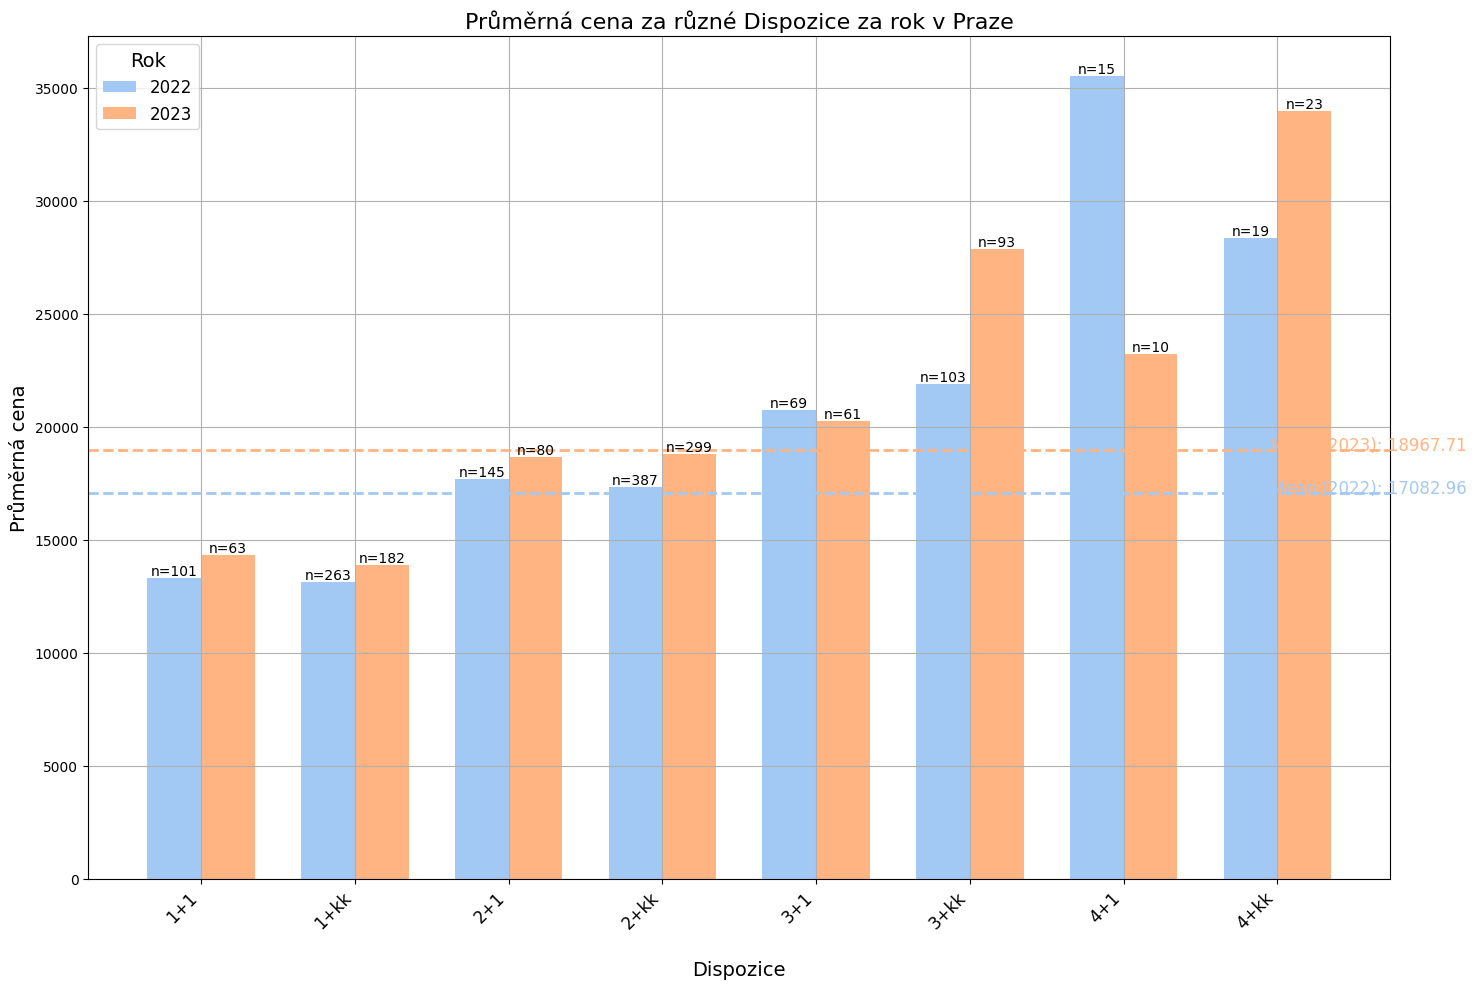

In [26]:
df = df_pronajem.copy()

df['Cena'] = pd.to_numeric(df['Cena'], errors='coerce')
df['Data z roku'] = pd.to_numeric(df['Data z roku'], errors='coerce')

df = df[df['Kraj'] == 'Praha']

# Filter to include only the desired 'Dispozice' values
desired_dispozice = ['1+1', '1+kk', '2+1', '2+kk', '3+1', '3+kk', '4+1', '4+kk']
df = df[df['Dispozice'].isin(desired_dispozice)]

# Group by 'Dispozice', 'Data z roku' and calculate the mean of 'Cena'
grouped_df = df.groupby(['Dispozice', 'Data z roku'])['Cena'].mean().reset_index()
grouped_df_size = df.groupby(['Dispozice', 'Data z roku']).size().reset_index(name='counts')

# Pivot the DataFrame to get Dispozice as index, Data z roku as columns and Cena as values
pivot_df = grouped_df.pivot(index='Dispozice', columns='Data z roku', values='Cena').fillna(0)
pivot_df_size = grouped_df_size.pivot(index='Dispozice', columns='Data z roku', values='counts').fillna(0)

# Get unique 'Dispozice' and 'Data z roku' values
dispozice_values = pivot_df.index
year_values = pivot_df.columns

# Define the width of the bars and the positions of the bar groups
width = 0.35
ind = np.arange(len(dispozice_values))

# Adjust size of the plot
fig, ax = plt.subplots(figsize=(15, 10))

# Choose a nice color palette
colors = sns.color_palette('pastel')[0:len(year_values)]

# Generate a bar group for each year
for i, year in enumerate(year_values):
    bars = ax.bar(ind - width/2 + i*width, pivot_df[year], width, color=colors[i], label=year)

    # Annotate each bar with the size of the group it represents
    for bar, size in zip(bars, pivot_df_size[year]):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'n={int(size)}', ha='center', va='bottom')

# Set the x-ticks to be the 'Dispozice' values and set the labels
ax.set_xticks(ind)
ax.set_xticklabels(dispozice_values, fontsize=12, rotation=45, ha="right")  # Adjust fontsize and rotation

ax.set_xlabel('Dispozice', fontsize=14, labelpad=20)  # Adjust fontsize and labelpad
ax.set_ylabel('Průměrná cena', fontsize=14)
ax.set_title('Průměrná cena za různé Dispozice za rok v Praze', fontsize=16)
ax.legend(title='Rok', fontsize=12, title_fontsize=14)

# Calculate and add lines for the mean price of each year
for year in year_values:
    mean_price = df[df['Data z roku'] == year]['Cena'].mean()
    ax.axhline(mean_price, color=colors[year-min(year_values)], linestyle='dashed', linewidth=2)
    ax.text(ax.get_xlim()[1]*0.9, mean_price, f'Mean ({year}): {mean_price:.2f}', fontsize=12, color=colors[year-min(year_values)])
    print(mean_price)

# Add grid for better visibility of data points
ax.grid(True)

# Improve layout for better visibility
plt.tight_layout()
plt.show()

10429.8163064833
10561.876664330764


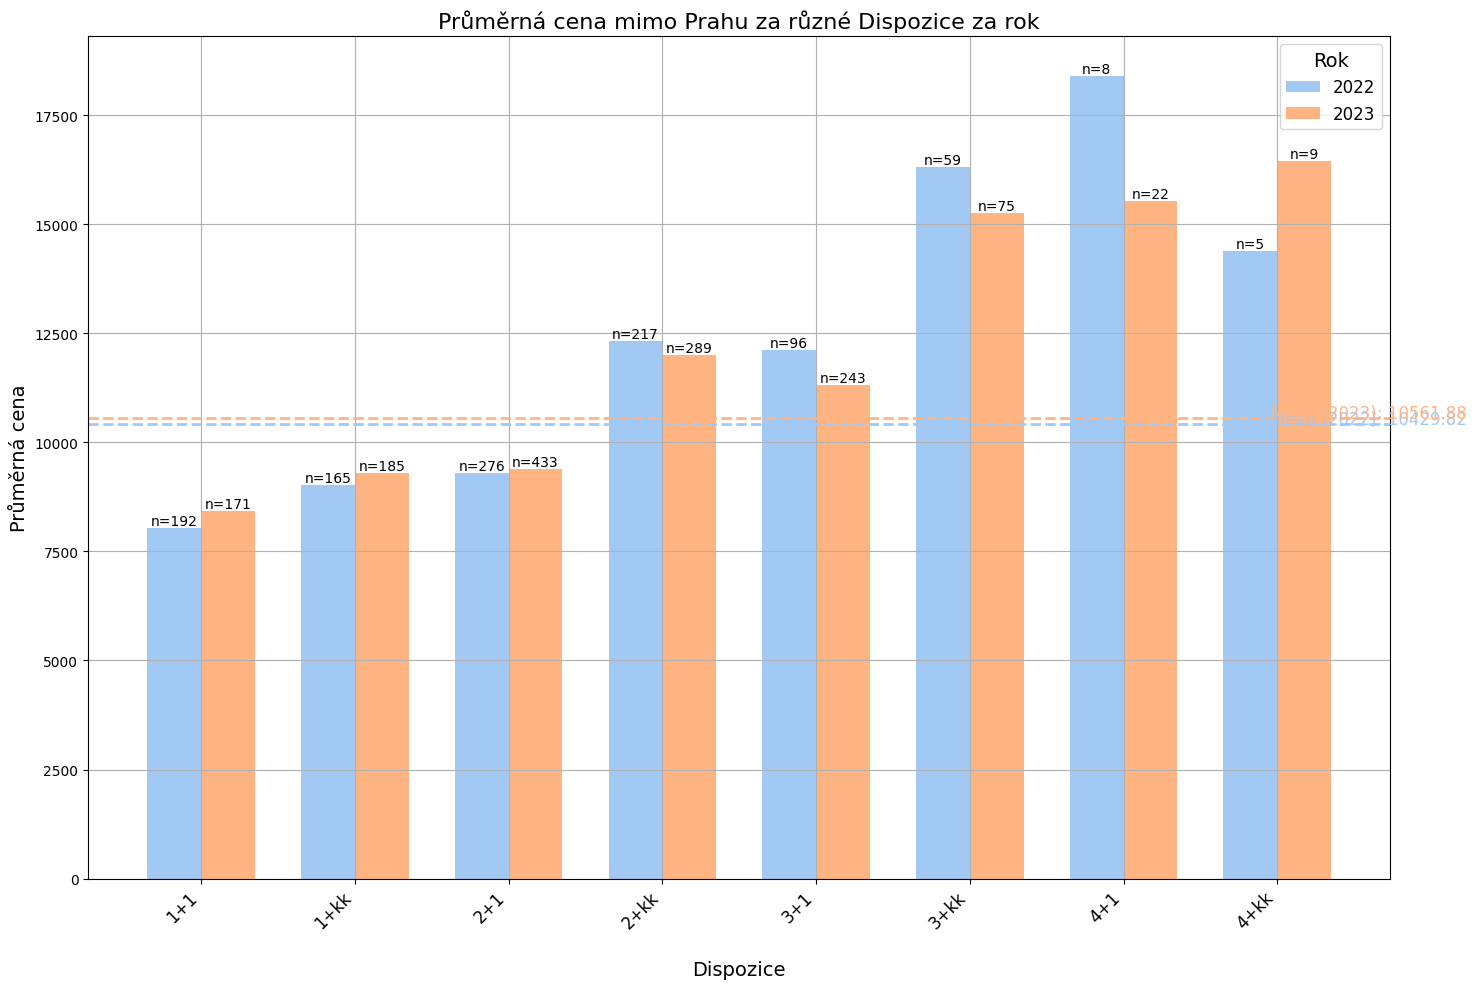

In [27]:
df = df_pronajem.copy()

df['Cena'] = pd.to_numeric(df['Cena'], errors='coerce')
df['Data z roku'] = pd.to_numeric(df['Data z roku'], errors='coerce')

# Filter to include only rows where 'Lokace' is 'Praha'
df = df[df['Kraj'] != 'Praha']

# Filter to include only the desired 'Dispozice' values
desired_dispozice = ['1+1', '1+kk', '2+1', '2+kk', '3+1', '3+kk', '4+1', '4+kk']
df = df[df['Dispozice'].isin(desired_dispozice)]

# Group by 'Dispozice', 'Data z roku' and calculate the mean of 'Cena'
grouped_df = df.groupby(['Dispozice', 'Data z roku'])['Cena'].mean().reset_index()
grouped_df_size = df.groupby(['Dispozice', 'Data z roku']).size().reset_index(name='counts')

# Pivot the DataFrame to get Dispozice as index, Data z roku as columns and Cena as values
pivot_df = grouped_df.pivot(index='Dispozice', columns='Data z roku', values='Cena').fillna(0)
pivot_df_size = grouped_df_size.pivot(index='Dispozice', columns='Data z roku', values='counts').fillna(0)

# Get unique 'Dispozice' and 'Data z roku' values
dispozice_values = pivot_df.index
year_values = pivot_df.columns

# Define the width of the bars and the positions of the bar groups
width = 0.35
ind = np.arange(len(dispozice_values))

# Adjust size of the plot
fig, ax = plt.subplots(figsize=(15, 10))

# Choose a nice color palette
colors = sns.color_palette('pastel')[0:len(year_values)]

# Generate a bar group for each year
for i, year in enumerate(year_values):
    bars = ax.bar(ind - width/2 + i*width, pivot_df[year], width, color=colors[i], label=year)

    # Annotate each bar with the size of the group it represents
    for bar, size in zip(bars, pivot_df_size[year]):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'n={int(size)}', ha='center', va='bottom')

# Set the x-ticks to be the 'Dispozice' values and set the labels
ax.set_xticks(ind)
ax.set_xticklabels(dispozice_values, fontsize=12, rotation=45, ha="right")  # Adjust fontsize and rotation

ax.set_xlabel('Dispozice', fontsize=14, labelpad=20)  # Adjust fontsize and labelpad
ax.set_ylabel('Průměrná cena', fontsize=14)
ax.set_title('Průměrná cena mimo Prahu za různé Dispozice za rok', fontsize=16)
ax.legend(title='Rok', fontsize=12, title_fontsize=14)

# Calculate and add lines for the mean price of each year
for year in year_values:
    mean_price = df[df['Data z roku'] == year]['Cena'].mean()
    ax.axhline(mean_price, color=colors[year-min(year_values)], linestyle='dashed', linewidth=2)
    ax.text(ax.get_xlim()[1]*0.9, mean_price, f'Mean ({year}): {mean_price:.2f}', fontsize=12, color=colors[year-min(year_values)])
    print(mean_price)

# Add grid for better visibility of data points
ax.grid(True)

# Improve layout for better visibility
plt.tight_layout()
plt.show()

### Price and area for df_prodej

Dropped rows: 0
63.297777777777775
63.988010490820535


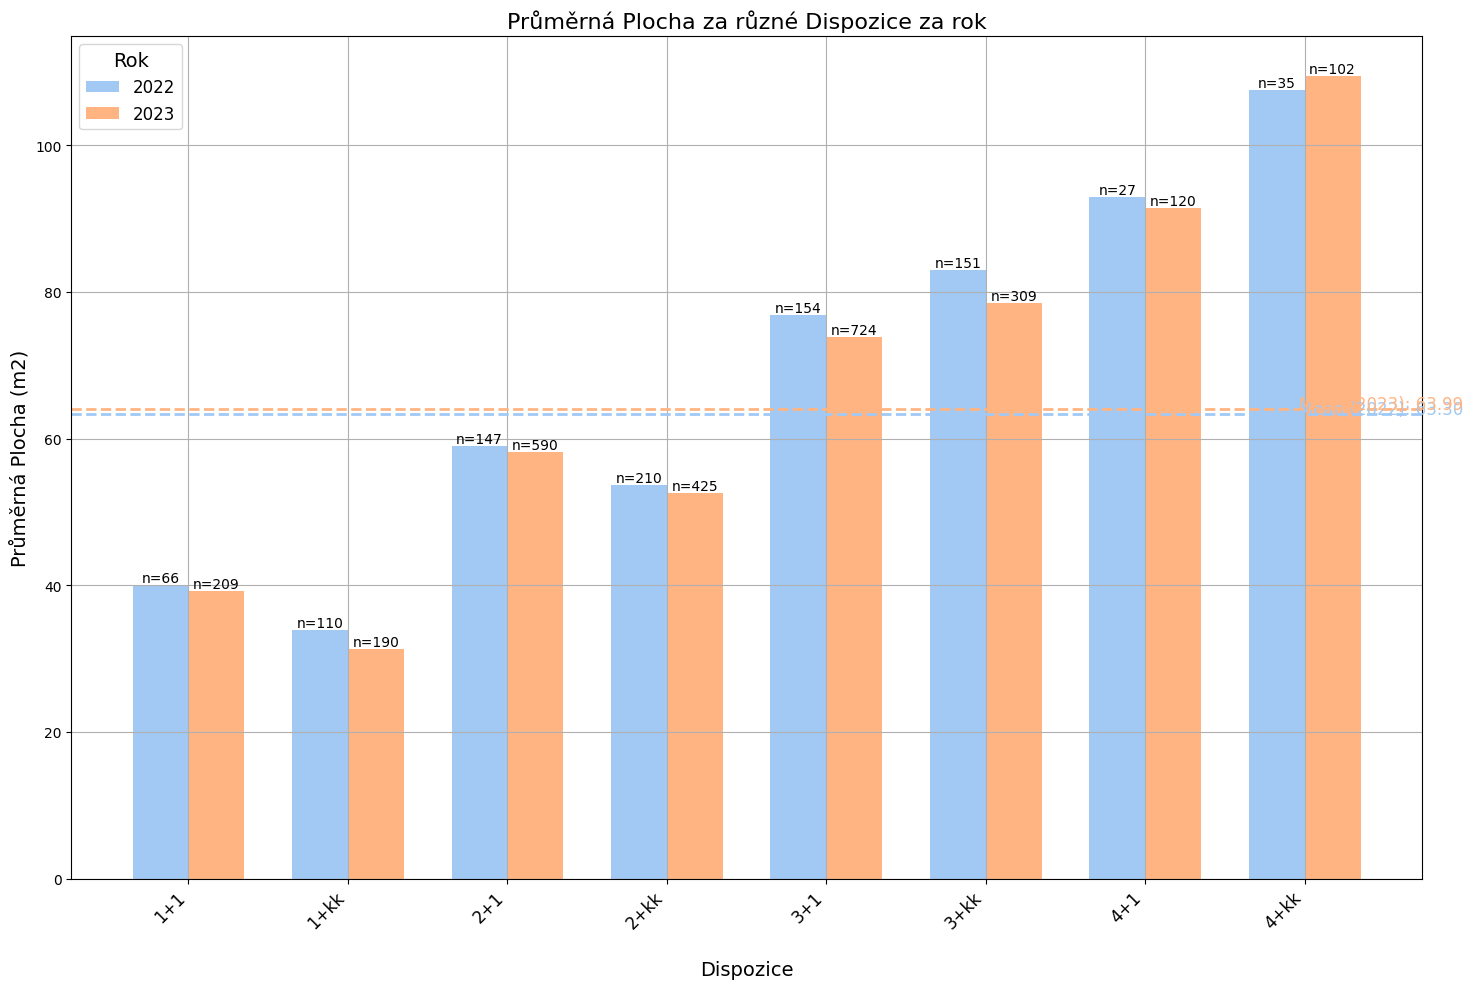

In [28]:
df = df_prodej.copy()

df['Plocha'] = pd.to_numeric(df['Plocha'], errors='coerce')
df['Data z roku'] = pd.to_numeric(df['Data z roku'], errors='coerce')

desired_dispozice = ['1+1', '1+kk', '2+1', '2+kk', '3+1', '3+kk', '4+1', '4+kk']
df = df[df['Dispozice'].isin(desired_dispozice)]

# Count initial number of rows
initial_rows = df.shape[0]

# Drop rows where 'Poplatky za služby' is 0
df = df[df['Plocha'] != 0]

# Count final number of rows and calculate difference
final_rows = df.shape[0]
dropped_rows = initial_rows - final_rows

print(f"Dropped rows: {dropped_rows}")

# Group by 'Dispozice', 'Data z roku' and calculate the mean of 'Cena'
grouped_df = df.groupby(['Dispozice', 'Data z roku'])['Plocha'].mean().reset_index()
grouped_df_size = df.groupby(['Dispozice', 'Data z roku']).size().reset_index(name='counts')

# Pivot the DataFrame to get Dispozice as index, Data z roku as columns and Cena as values
pivot_df = grouped_df.pivot(index='Dispozice', columns='Data z roku', values='Plocha').fillna(0)
pivot_df_size = grouped_df_size.pivot(index='Dispozice', columns='Data z roku', values='counts').fillna(0)

# Get unique 'Dispozice' and 'Data z roku' values
dispozice_values = pivot_df.index
year_values = pivot_df.columns

# Define the width of the bars and the positions of the bar groups
width = 0.35
ind = np.arange(len(dispozice_values))

# Adjust size of the plot
fig, ax = plt.subplots(figsize=(15, 10))

# Choose a nice color palette
colors = sns.color_palette('pastel')[0:len(year_values)]

# Generate a bar group for each year
for i, year in enumerate(year_values):
    bars = ax.bar(ind - width/2 + i*width, pivot_df[year], width, color=colors[i], label=year)

    # Annotate each bar with the size of the group it represents
    for bar, size in zip(bars, pivot_df_size[year]):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'n={int(size)}', ha='center', va='bottom')

# Set the x-ticks to be the 'Dispozice' values and set the labels
ax.set_xticks(ind)
ax.set_xticklabels(dispozice_values, fontsize=12, rotation=45, ha="right")  # Adjust fontsize and rotation

ax.set_xlabel('Dispozice', fontsize=14, labelpad=20)  # Adjust fontsize and labelpad
ax.set_ylabel('Průměrná Plocha (m2)', fontsize=14)
ax.set_title('Průměrná Plocha za různé Dispozice za rok', fontsize=16)
ax.legend(title='Rok', fontsize=12, title_fontsize=14)

# Calculate and add lines for the mean price of each year
for year in year_values:
    mean_price = df[df['Data z roku'] == year]['Plocha'].mean()
    ax.axhline(mean_price, color=colors[year-min(year_values)], linestyle='dashed', linewidth=2)
    ax.text(ax.get_xlim()[1]*0.9, mean_price, f'Mean ({year}): {mean_price:.2f}', fontsize=12, color=colors[year-min(year_values)])
    print(mean_price)

# Add grid for better visibility of data points
ax.grid(True)

# Improve layout for better visibility
plt.tight_layout()
plt.show()

4197444.687192118
3140519.6906510033


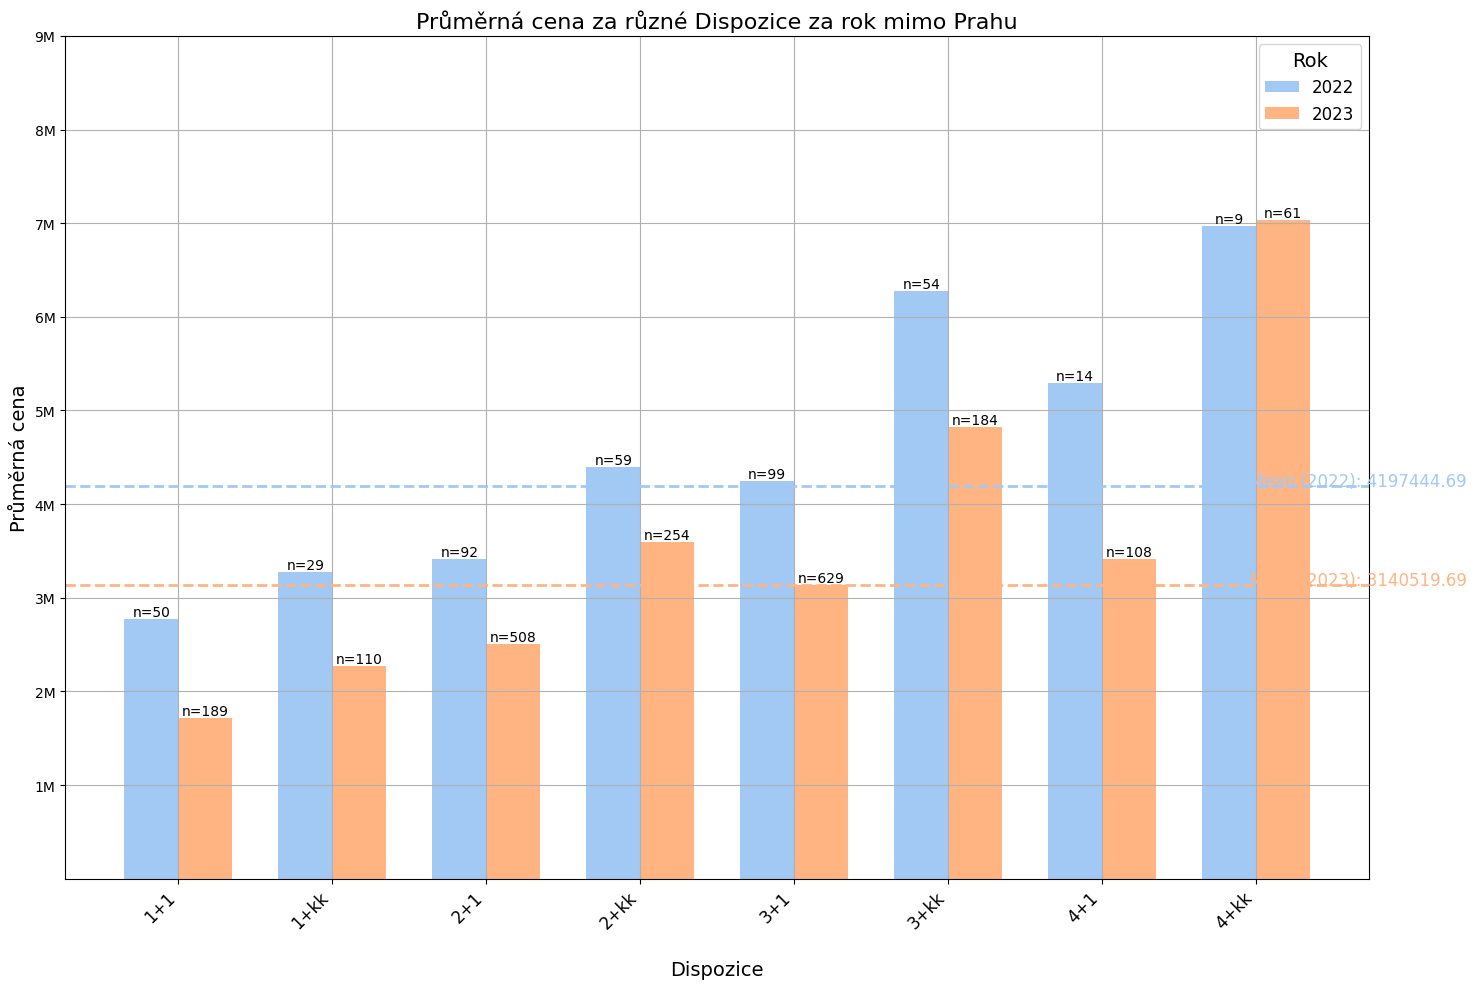

In [29]:
df = df_prodej.copy()

df['Cena'] = pd.to_numeric(df['Cena'], errors='coerce')
df['Data z roku'] = pd.to_numeric(df['Data z roku'], errors='coerce')

# Filter to include only rows where 'Lokace' is 'Praha'
df = df[df['Kraj'] != 'Praha']

# Filter to include only the desired 'Dispozice' values
desired_dispozice = ['1+1', '1+kk', '2+1', '2+kk', '3+1', '3+kk', '4+1', '4+kk']
df = df[df['Dispozice'].isin(desired_dispozice)]

# Group by 'Dispozice', 'Data z roku' and calculate the mean of 'Cena'
grouped_df = df.groupby(['Dispozice', 'Data z roku'])['Cena'].mean().reset_index()
grouped_df_size = df.groupby(['Dispozice', 'Data z roku']).size().reset_index(name='counts')

# Pivot the DataFrame to get Dispozice as index, Data z roku as columns and Cena as values
pivot_df = grouped_df.pivot(index='Dispozice', columns='Data z roku', values='Cena').fillna(0)
pivot_df_size = grouped_df_size.pivot(index='Dispozice', columns='Data z roku', values='counts').fillna(0)

# Get unique 'Dispozice' and 'Data z roku' values
dispozice_values = pivot_df.index
year_values = pivot_df.columns

# Define the width of the bars and the positions of the bar groups
width = 0.35
ind = np.arange(len(dispozice_values))

# Adjust size of the plot
fig, ax = plt.subplots(figsize=(15, 10))

# Choose a nice color palette
colors = sns.color_palette('pastel')[0:len(year_values)]

# Generate a bar group for each year
for i, year in enumerate(year_values):
    bars = ax.bar(ind - width/2 + i*width, pivot_df[year], width, color=colors[i], label=year)

    # Annotate each bar with the size of the group it represents
    for bar, size in zip(bars, pivot_df_size[year]):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'n={int(size)}', ha='center', va='bottom')

# Set the x-ticks to be the 'Dispozice' values and set the labels
ax.set_xticks(ind)
ax.set_xticklabels(dispozice_values, fontsize=12, rotation=45, ha="right")  # Adjust fontsize and rotation

# Define the range of y ticks from 1 million to 10 million (or a max of your data) with a step of 1 million
yticks = range(1000000, 10000000, 1000000)

# Set the yticks and their labels to represent millions
ax.set_yticks(yticks)
ax.set_yticklabels(['{}M'.format(i//1000000) for i in yticks])

ax.set_xlabel('Dispozice', fontsize=14, labelpad=20)  # Adjust fontsize and labelpad
ax.set_ylabel('Průměrná cena', fontsize=14)
ax.set_title('Průměrná cena za různé Dispozice za rok mimo Prahu', fontsize=16)
ax.legend(title='Rok', fontsize=12, title_fontsize=14)

# Calculate and add lines for the mean price of each year
for year in year_values:
    mean_price = df[df['Data z roku'] == year]['Cena'].mean()
    ax.axhline(mean_price, color=colors[year-min(year_values)], linestyle='dashed', linewidth=2)
    ax.text(ax.get_xlim()[1]*0.9, mean_price, f'Mean ({year}): {mean_price:.2f}', fontsize=12, color=colors[year-min(year_values)])
    print(mean_price)

# Add grid for better visibility of data points
ax.grid(True)

# Improve layout for better visibility
plt.tight_layout()
plt.show()

7892664.548582996
7197806.436102237


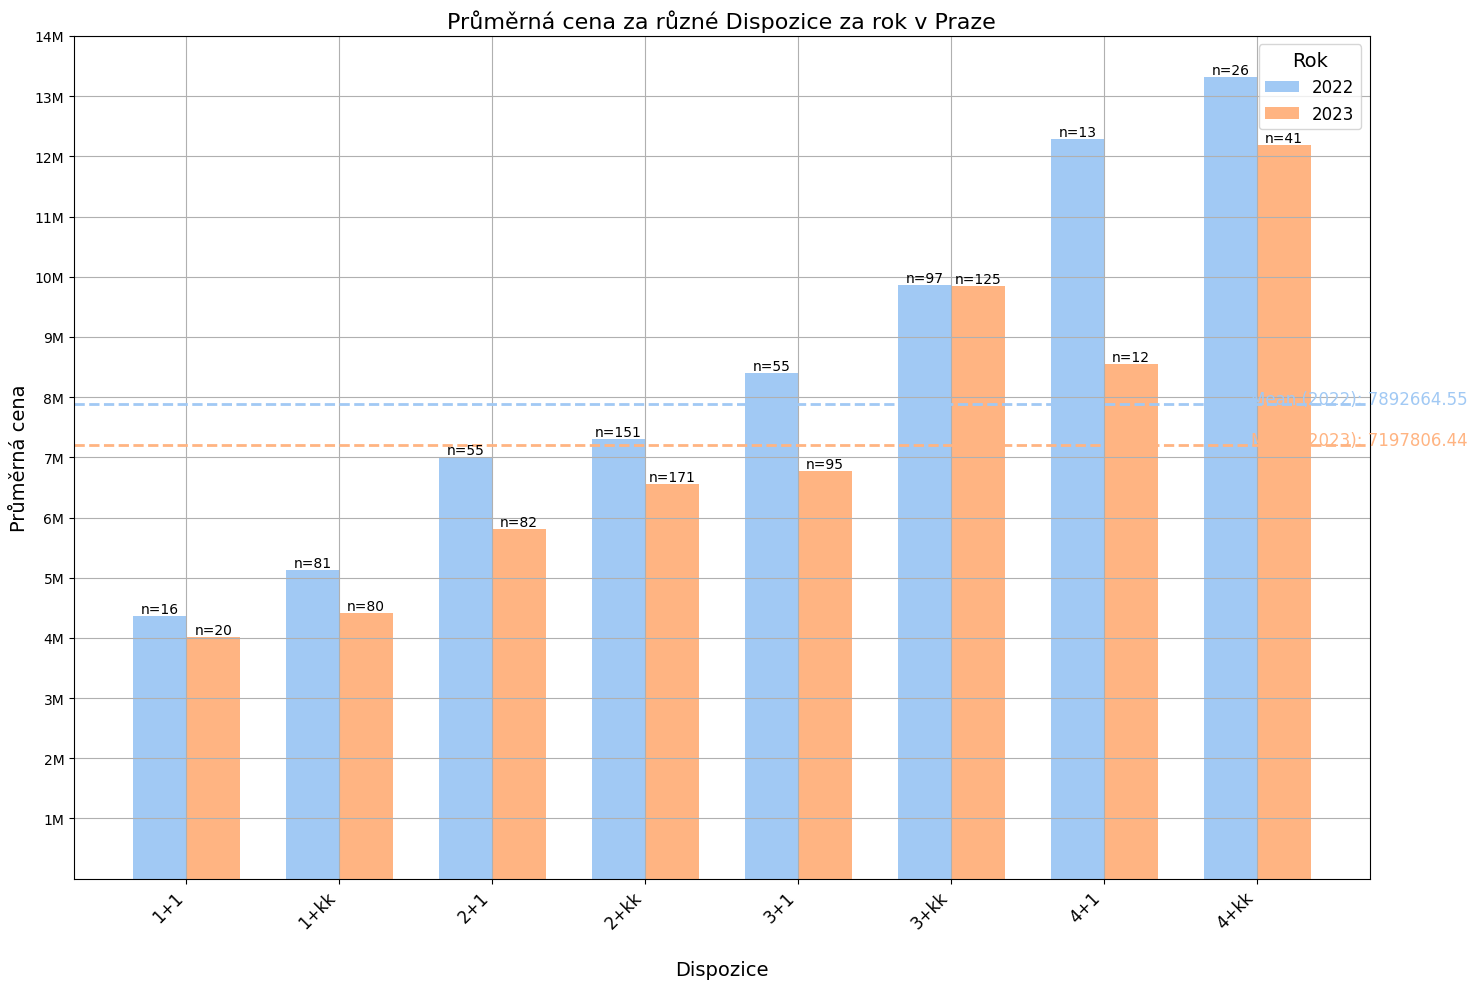

In [30]:
df = df_prodej.copy()

df['Cena'] = pd.to_numeric(df['Cena'], errors='coerce')
df['Data z roku'] = pd.to_numeric(df['Data z roku'], errors='coerce')

# Filter to include only rows where 'Lokace' is 'Praha'
df = df[df['Kraj'] == 'Praha']

# Filter to include only the desired 'Dispozice' values
desired_dispozice = ['1+1', '1+kk', '2+1', '2+kk', '3+1', '3+kk', '4+1', '4+kk']
df = df[df['Dispozice'].isin(desired_dispozice)]

# Group by 'Dispozice', 'Data z roku' and calculate the mean of 'Cena'
grouped_df = df.groupby(['Dispozice', 'Data z roku'])['Cena'].mean().reset_index()
grouped_df_size = df.groupby(['Dispozice', 'Data z roku']).size().reset_index(name='counts')

# Pivot the DataFrame to get Dispozice as index, Data z roku as columns and Cena as values
pivot_df = grouped_df.pivot(index='Dispozice', columns='Data z roku', values='Cena').fillna(0)
pivot_df_size = grouped_df_size.pivot(index='Dispozice', columns='Data z roku', values='counts').fillna(0)

# Get unique 'Dispozice' and 'Data z roku' values
dispozice_values = pivot_df.index
year_values = pivot_df.columns

# Define the width of the bars and the positions of the bar groups
width = 0.35
ind = np.arange(len(dispozice_values))

# Adjust size of the plot
fig, ax = plt.subplots(figsize=(15, 10))

# Choose a nice color palette
colors = sns.color_palette('pastel')[0:len(year_values)]

# Generate a bar group for each year
for i, year in enumerate(year_values):
    bars = ax.bar(ind - width/2 + i*width, pivot_df[year], width, color=colors[i], label=year)

    # Annotate each bar with the size of the group it represents
    for bar, size in zip(bars, pivot_df_size[year]):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'n={int(size)}', ha='center', va='bottom')

# Set the x-ticks to be the 'Dispozice' values and set the labels
ax.set_xticks(ind)
ax.set_xticklabels(dispozice_values, fontsize=12, rotation=45, ha="right")  # Adjust fontsize and rotation

# Define the range of y ticks from 1 million to 10 million (or a max of your data) with a step of 1 million
yticks = range(1000000, 15000000, 1000000)

# Set the yticks and their labels to represent millions
ax.set_yticks(yticks)
ax.set_yticklabels(['{}M'.format(i//1000000) for i in yticks])

ax.set_xlabel('Dispozice', fontsize=14, labelpad=20)  # Adjust fontsize and labelpad
ax.set_ylabel('Průměrná cena', fontsize=14)
ax.set_title('Průměrná cena za různé Dispozice za rok v Praze', fontsize=16)
ax.legend(title='Rok', fontsize=12, title_fontsize=14)

# Calculate and add lines for the mean price of each year
for year in year_values:
    mean_price = df[df['Data z roku'] == year]['Cena'].mean()
    ax.axhline(mean_price, color=colors[year-min(year_values)], linestyle='dashed', linewidth=2)
    ax.text(ax.get_xlim()[1]*0.9, mean_price, f'Mean ({year}): {mean_price:.2f}', fontsize=12, color=colors[year-min(year_values)])
    print(mean_price)

# Add grid for better visibility of data points
ax.grid(True)

# Improve layout for better visibility
plt.tight_layout()
plt.show()

68356.26164241075
50179.72707541205


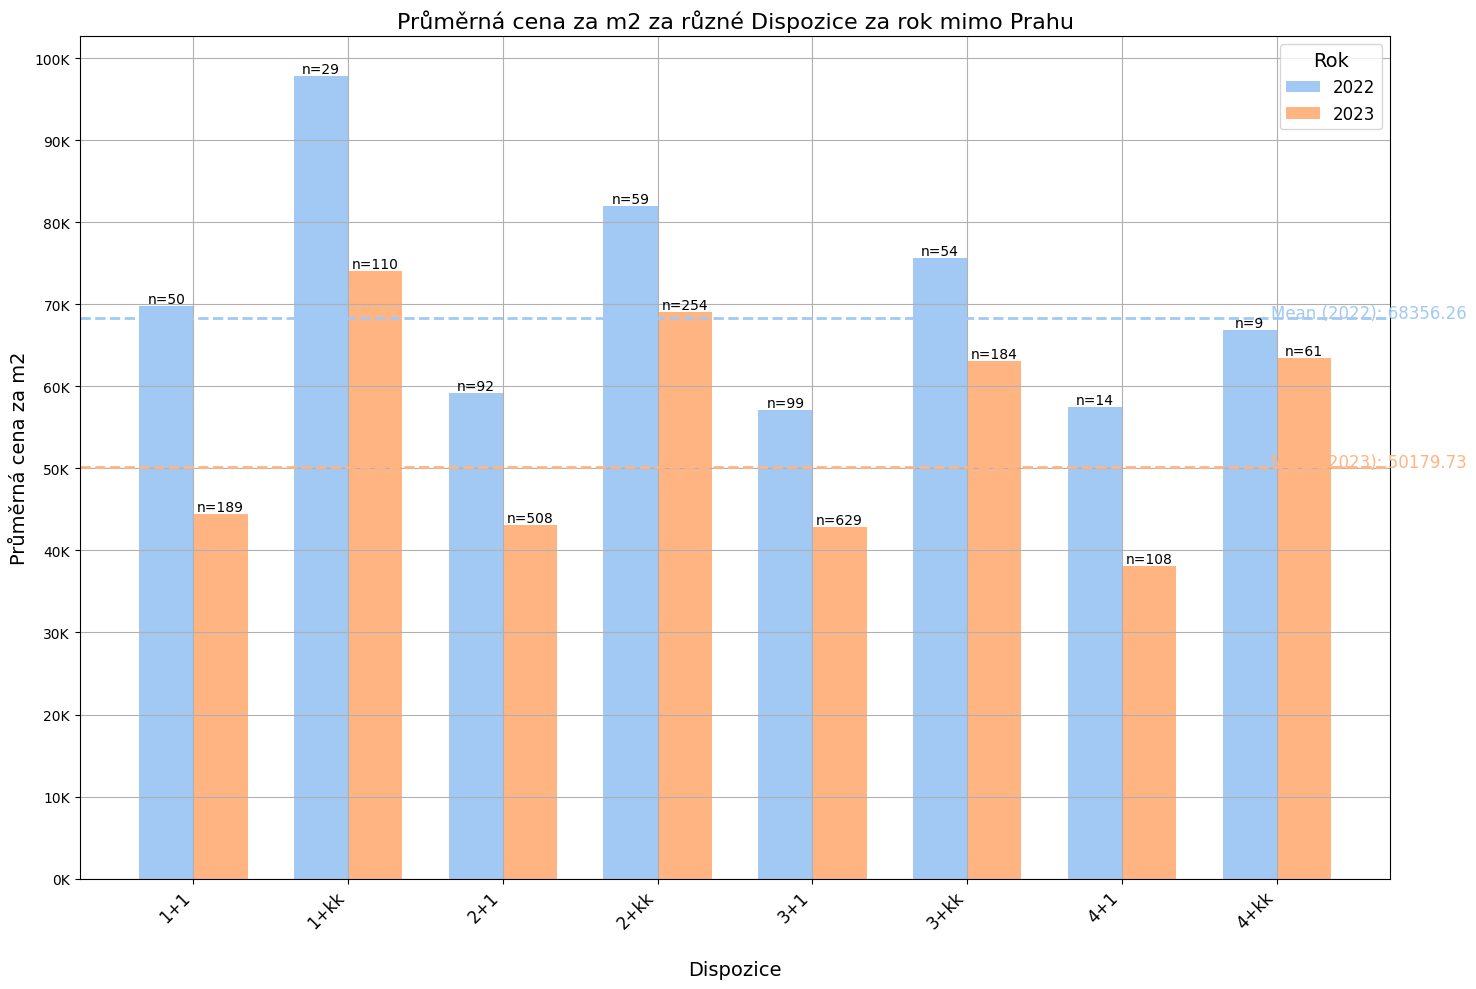

In [31]:
df = df_prodej.copy()

df['Cena'] = pd.to_numeric(df['Cena'], errors='coerce')
df['Data z roku'] = pd.to_numeric(df['Data z roku'], errors='coerce')
df['Plocha'] = pd.to_numeric(df['Plocha'], errors='coerce')

# Create a new column 'Price per m2'
df['Price per m2'] = df['Cena'] / df['Plocha']

# Filter to include only rows where 'Lokace' is 'Praha'
df = df[df['Kraj'] != 'Praha']

# Filter to include only the desired 'Dispozice' values
desired_dispozice = ['1+1', '1+kk', '2+1', '2+kk', '3+1', '3+kk', '4+1', '4+kk']
df = df[df['Dispozice'].isin(desired_dispozice)]

# Group by 'Dispozice', 'Data z roku' and calculate the mean of 'Cena'
grouped_df = df.groupby(['Dispozice', 'Data z roku'])['Price per m2'].mean().reset_index()
grouped_df_size = df.groupby(['Dispozice', 'Data z roku']).size().reset_index(name='counts')

# Pivot the DataFrame to get Dispozice as index, Data z roku as columns and Cena as values
pivot_df = grouped_df.pivot(index='Dispozice', columns='Data z roku', values='Price per m2').fillna(0)
pivot_df_size = grouped_df_size.pivot(index='Dispozice', columns='Data z roku', values='counts').fillna(0)

# Get unique 'Dispozice' and 'Data z roku' values
dispozice_values = pivot_df.index
year_values = pivot_df.columns

# Define the width of the bars and the positions of the bar groups
width = 0.35
ind = np.arange(len(dispozice_values))

# Adjust size of the plot
fig, ax = plt.subplots(figsize=(15, 10))

# Choose a nice color palette
colors = sns.color_palette('pastel')[0:len(year_values)]

# Generate a bar group for each year
for i, year in enumerate(year_values):
    bars = ax.bar(ind - width/2 + i*width, pivot_df[year], width, color=colors[i], label=year)

    # Annotate each bar with the size of the group it represents
    for bar, size in zip(bars, pivot_df_size[year]):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'n={int(size)}', ha='center', va='bottom')

# Set the x-ticks to be the 'Dispozice' values and set the labels
ax.set_xticks(ind)
ax.set_xticklabels(dispozice_values, fontsize=12, rotation=45, ha="right")  # Adjust fontsize and rotation

# Define the range of y ticks from 1 million to 10 million (or a max of your data) with a step of 1 million
yticks = range(0, 110000, 10000)

# Set the yticks and their labels to represent millions
ax.set_yticks(yticks)
ax.set_yticklabels(['{}K'.format(i//1000) for i in yticks])

ax.set_xlabel('Dispozice', fontsize=14, labelpad=20)  # Adjust fontsize and labelpad
ax.set_ylabel('Průměrná cena za m2', fontsize=14)
ax.set_title('Průměrná cena za m2 za různé Dispozice za rok mimo Prahu', fontsize=16)
ax.legend(title='Rok', fontsize=12, title_fontsize=14)

# Calculate and add lines for the mean price of each year
for year in year_values:
    mean_price = df[df['Data z roku'] == year]['Price per m2'].mean()
    ax.axhline(mean_price, color=colors[year-min(year_values)], linestyle='dashed', linewidth=2)
    ax.text(ax.get_xlim()[1]*0.9, mean_price, f'Mean ({year}): {mean_price:.2f}', fontsize=12, color=colors[year-min(year_values)])
    print(mean_price)

# Add grid for better visibility of data points
ax.grid(True)

# Improve layout for better visibility
plt.tight_layout()
plt.show()

129110.40353653577
114869.86356278116


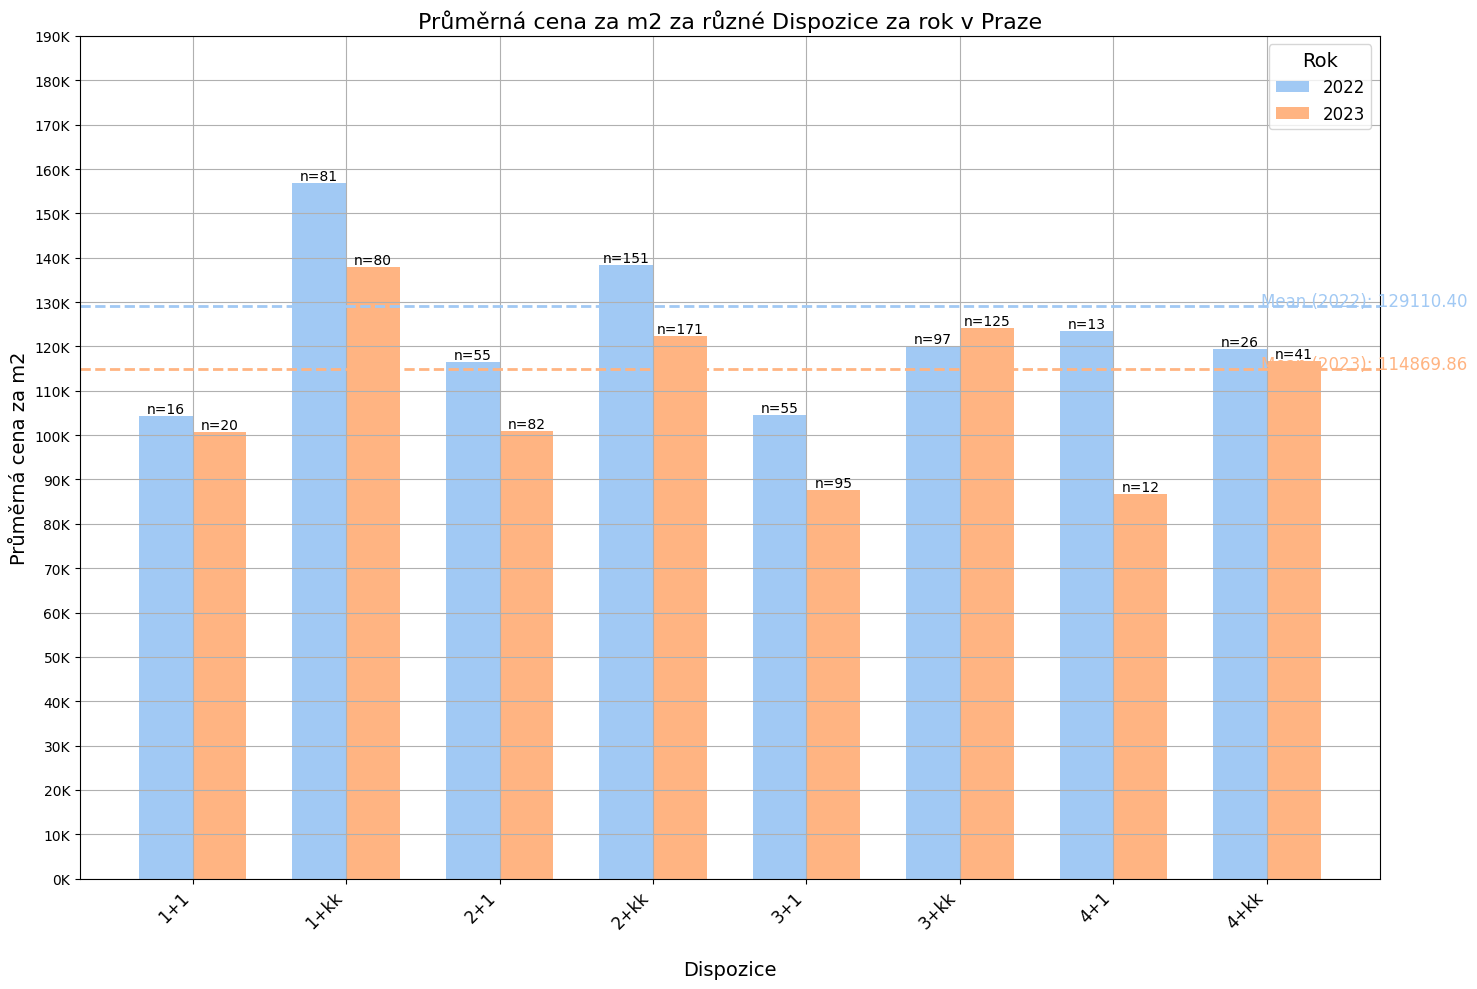

In [32]:
df = df_prodej.copy()

df['Cena'] = pd.to_numeric(df['Cena'], errors='coerce')
df['Data z roku'] = pd.to_numeric(df['Data z roku'], errors='coerce')
df['Plocha'] = pd.to_numeric(df['Plocha'], errors='coerce')

# Create a new column 'Price per m2'
df['Price per m2'] = df['Cena'] / df['Plocha']

# Filter to include only rows where 'Lokace' is 'Praha'
df = df[df['Kraj'] == 'Praha']

# Filter to include only the desired 'Dispozice' values
desired_dispozice = ['1+1', '1+kk', '2+1', '2+kk', '3+1', '3+kk', '4+1', '4+kk']
df = df[df['Dispozice'].isin(desired_dispozice)]

# Group by 'Dispozice', 'Data z roku' and calculate the mean of 'Cena'
grouped_df = df.groupby(['Dispozice', 'Data z roku'])['Price per m2'].mean().reset_index()
grouped_df_size = df.groupby(['Dispozice', 'Data z roku']).size().reset_index(name='counts')

# Pivot the DataFrame to get Dispozice as index, Data z roku as columns and Cena as values
pivot_df = grouped_df.pivot(index='Dispozice', columns='Data z roku', values='Price per m2').fillna(0)
pivot_df_size = grouped_df_size.pivot(index='Dispozice', columns='Data z roku', values='counts').fillna(0)

# Get unique 'Dispozice' and 'Data z roku' values
dispozice_values = pivot_df.index
year_values = pivot_df.columns

# Define the width of the bars and the positions of the bar groups
width = 0.35
ind = np.arange(len(dispozice_values))

# Adjust size of the plot
fig, ax = plt.subplots(figsize=(15, 10))

# Choose a nice color palette
colors = sns.color_palette('pastel')[0:len(year_values)]

# Generate a bar group for each year
for i, year in enumerate(year_values):
    bars = ax.bar(ind - width/2 + i*width, pivot_df[year], width, color=colors[i], label=year)

    # Annotate each bar with the size of the group it represents
    for bar, size in zip(bars, pivot_df_size[year]):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'n={int(size)}', ha='center', va='bottom')

# Set the x-ticks to be the 'Dispozice' values and set the labels
ax.set_xticks(ind)
ax.set_xticklabels(dispozice_values, fontsize=12, rotation=45, ha="right")  # Adjust fontsize and rotation

# Define the range of y ticks from 1 million to 10 million (or a max of your data) with a step of 1 million
yticks = range(0, 200000, 10000)

# Set the yticks and their labels to represent millions
ax.set_yticks(yticks)
ax.set_yticklabels(['{}K'.format(i//1000) for i in yticks])

ax.set_xlabel('Dispozice', fontsize=14, labelpad=20)  # Adjust fontsize and labelpad
ax.set_ylabel('Průměrná cena za m2', fontsize=14)
ax.set_title('Průměrná cena za m2 za různé Dispozice za rok v Praze', fontsize=16)
ax.legend(title='Rok', fontsize=12, title_fontsize=14)

# Calculate and add lines for the mean price of each year
for year in year_values:
    mean_price = df[df['Data z roku'] == year]['Price per m2'].mean()
    ax.axhline(mean_price, color=colors[year-min(year_values)], linestyle='dashed', linewidth=2)
    ax.text(ax.get_xlim()[1]*0.9, mean_price, f'Mean ({year}): {mean_price:.2f}', fontsize=12, color=colors[year-min(year_values)])
    print(mean_price)

# Add grid for better visibility of data points
ax.grid(True)

# Improve layout for better visibility
plt.tight_layout()
plt.show()

### Location

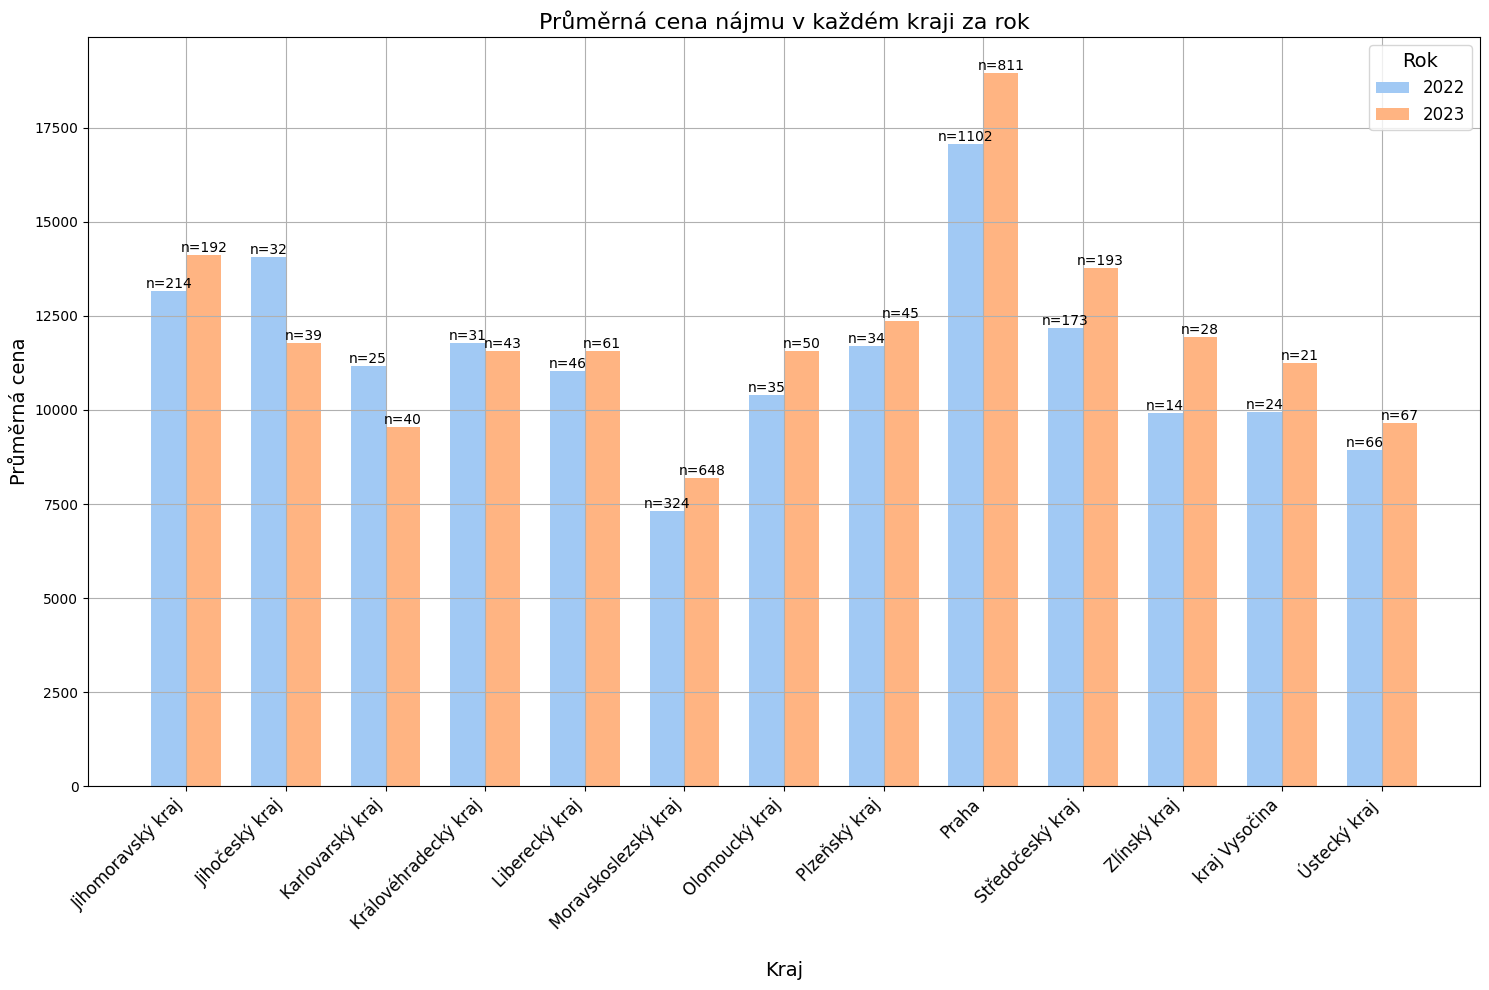

In [33]:
df = df_pronajem.copy()

df['Cena'] = pd.to_numeric(df['Cena'], errors='coerce')
df['Data z roku'] = pd.to_numeric(df['Data z roku'], errors='coerce')

desired_dispozice = ['1+1', '1+kk', '2+1', '2+kk', '3+1', '3+kk', '4+1', '4+kk']
df = df[df['Dispozice'].isin(desired_dispozice)]

# Group by 'Kraj', 'Data z roku' and calculate the mean of 'Cena' and the size of each group
grouped_df_mean = df.groupby(['Kraj', 'Data z roku'])['Cena'].mean().reset_index()
grouped_df_size = df.groupby(['Kraj', 'Data z roku']).size().reset_index(name='counts')

# Pivot the DataFrame to get Dispozice as index, Data z roku as columns and Cena as values
pivot_df_mean = grouped_df_mean.pivot(index='Kraj', columns='Data z roku', values='Cena').fillna(0)
pivot_df_size = grouped_df_size.pivot(index='Kraj', columns='Data z roku', values='counts').fillna(0)

# Get unique 'Dispozice' and 'Data z roku' values
dispozice_values = pivot_df_mean.index
year_values = pivot_df_mean.columns

# Define the width of the bars and the positions of the bar groups
width = 0.35
ind = np.arange(len(dispozice_values))

# Adjust size of the plot
fig, ax = plt.subplots(figsize=(15, 10))

# Choose a nice color palette
colors = sns.color_palette('pastel')[0:len(year_values)]

# Generate a bar group for each year
for i, year in enumerate(year_values):
    bars = ax.bar(ind - width/2 + i*width, pivot_df_mean[year], width, color=colors[i], label=year)
    
    # Annotate each bar with the size of the group it represents
    for bar, size in zip(bars, pivot_df_size[year]):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'n={int(size)}', ha='center', va='bottom')

# Set the x-ticks to be the 'Dispozice' values and set the labels
ax.set_xticks(ind)
ax.set_xticklabels(dispozice_values, fontsize=12, rotation=45, ha="right")  # Adjust fontsize and rotation

ax.set_xlabel('Kraj', fontsize=14, labelpad=20)  # Adjust fontsize and labelpad
ax.set_ylabel('Průměrná cena', fontsize=14)
ax.set_title('Průměrná cena nájmu v každém kraji za rok', fontsize=16)
ax.legend(title='Rok', fontsize=12, title_fontsize=14)

# Add grid for better visibility of data points
ax.grid(True)

# Improve layout for better visibility
plt.tight_layout()
plt.show()


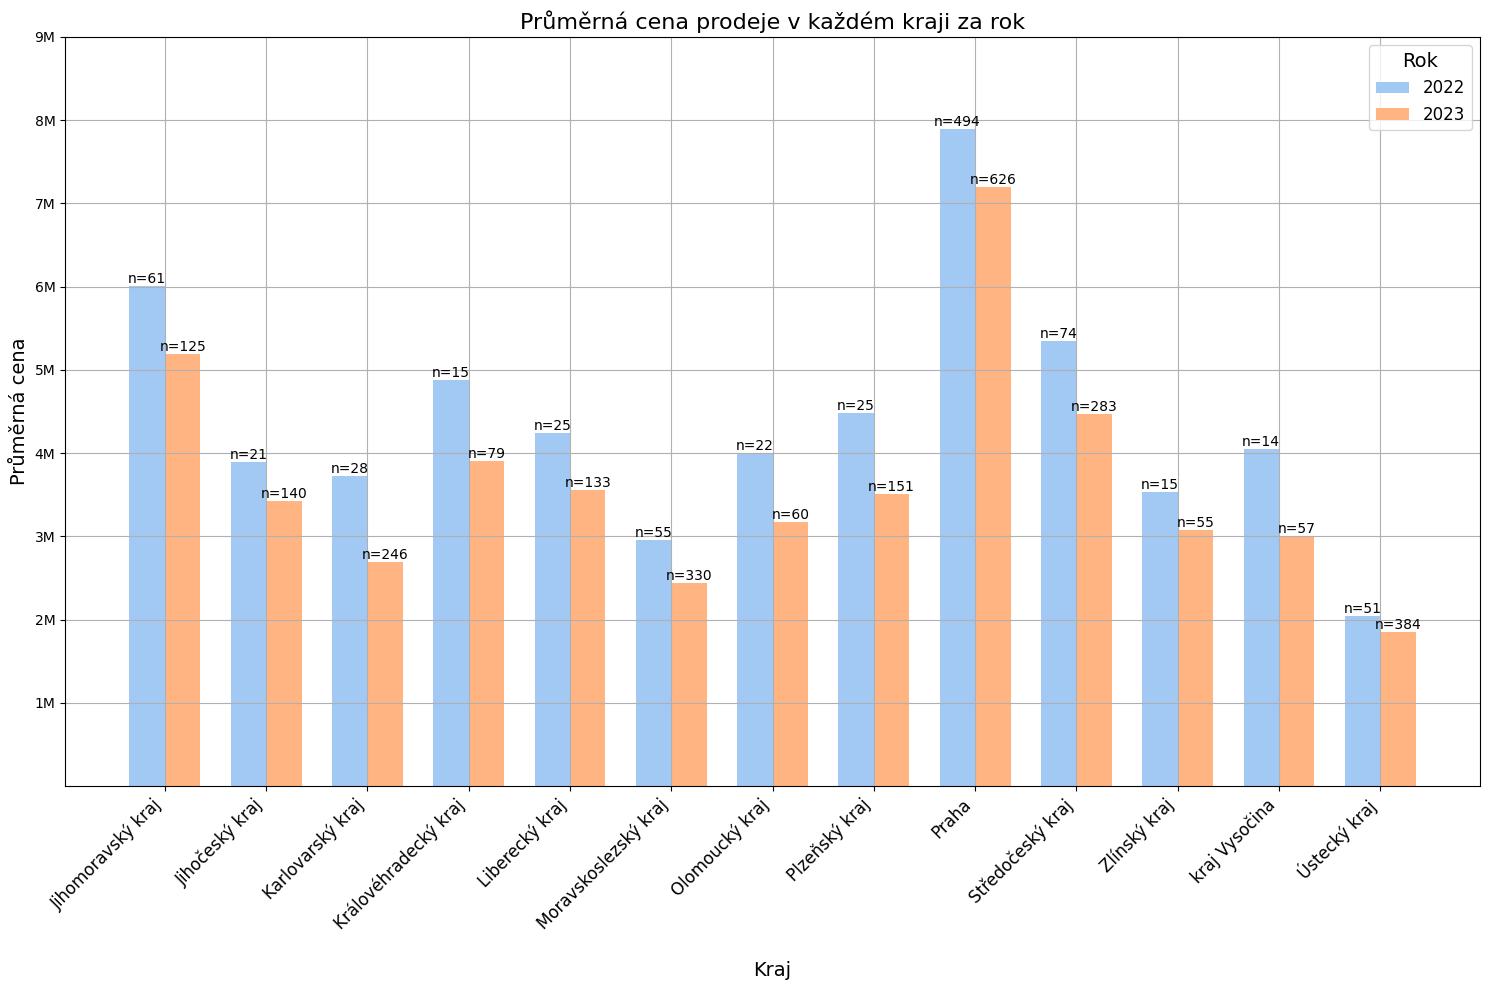

In [34]:
df = df_prodej.copy()

df['Cena'] = pd.to_numeric(df['Cena'], errors='coerce')
df['Data z roku'] = pd.to_numeric(df['Data z roku'], errors='coerce')

desired_dispozice = ['1+1', '1+kk', '2+1', '2+kk', '3+1', '3+kk', '4+1', '4+kk']
df = df[df['Dispozice'].isin(desired_dispozice)]

# Group by 'Kraj', 'Data z roku' and calculate the mean of 'Cena' and the size of each group
grouped_df_mean = df.groupby(['Kraj', 'Data z roku'])['Cena'].mean().reset_index()
grouped_df_size = df.groupby(['Kraj', 'Data z roku']).size().reset_index(name='counts')

# Pivot the DataFrame to get Dispozice as index, Data z roku as columns and Cena as values
pivot_df_mean = grouped_df_mean.pivot(index='Kraj', columns='Data z roku', values='Cena').fillna(0)
pivot_df_size = grouped_df_size.pivot(index='Kraj', columns='Data z roku', values='counts').fillna(0)

# Get unique 'Dispozice' and 'Data z roku' values
dispozice_values = pivot_df_mean.index
year_values = pivot_df_mean.columns

# Define the width of the bars and the positions of the bar groups
width = 0.35
ind = np.arange(len(dispozice_values))

# Adjust size of the plot
fig, ax = plt.subplots(figsize=(15, 10))

# Choose a nice color palette
colors = sns.color_palette('pastel')[0:len(year_values)]

# Generate a bar group for each year
for i, year in enumerate(year_values):
    bars = ax.bar(ind - width/2 + i*width, pivot_df_mean[year], width, color=colors[i], label=year)
    
    # Annotate each bar with the size of the group it represents
    for bar, size in zip(bars, pivot_df_size[year]):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'n={int(size)}', ha='center', va='bottom')

# Define the range of y ticks from 1 million to 10 million (or a max of your data) with a step of 1 million
yticks = range(1000000, 10000000, 1000000)

# Set the yticks and their labels to represent millions
ax.set_yticks(yticks)
ax.set_yticklabels(['{}M'.format(i//1000000) for i in yticks])

# Set the x-ticks to be the 'Dispozice' values and set the labels
ax.set_xticks(ind)
ax.set_xticklabels(dispozice_values, fontsize=12, rotation=45, ha="right")  # Adjust fontsize and rotation

ax.set_xlabel('Kraj', fontsize=14, labelpad=20)  # Adjust fontsize and labelpad
ax.set_ylabel('Průměrná cena', fontsize=14)
ax.set_title('Průměrná cena prodeje v každém kraji za rok', fontsize=16)
ax.legend(title='Rok', fontsize=12, title_fontsize=14)

# Add grid for better visibility of data points
ax.grid(True)

# Improve layout for better visibility
plt.tight_layout()
plt.show()


### Novostavba pronajem

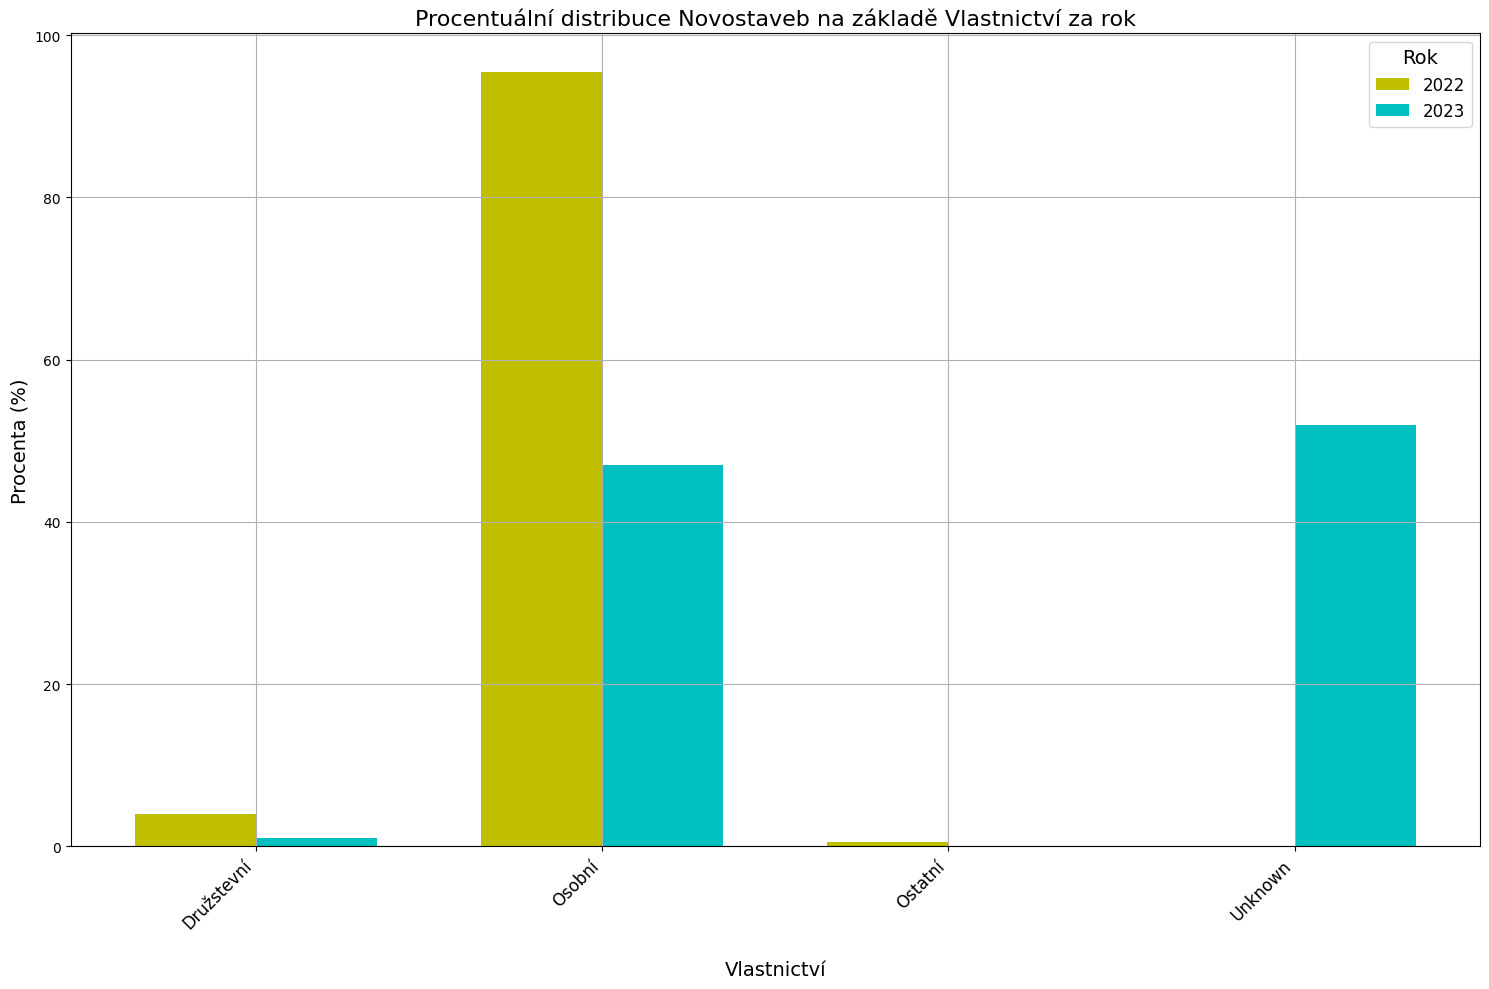

In [35]:
import numpy as np
import matplotlib.pyplot as plt

df = df_pronajem.copy()
df = df[df['Stav'] == 'Novostavba']

grouped_df = df.groupby(['Vlastnictví', 'Data z roku']).size().reset_index(name='Count')

# Calculate the total count per year
total_count = grouped_df.groupby('Data z roku')['Count'].sum()

# Calculate the percentage
grouped_df['Percentage'] = grouped_df.apply(lambda row: row['Count'] / total_count[row['Data z roku']] * 100, axis=1)

pivot_df = grouped_df.pivot(index='Vlastnictví', columns='Data z roku', values='Percentage').fillna(0)

offer_types = pivot_df.index
year_values = pivot_df.columns

width = 0.35  # the width of the bars
colors = ['y', 'c']  # Specify your color list here

ind = np.arange(len(offer_types))

fig, ax = plt.subplots(figsize=(15, 10))

for i, year in enumerate(year_values):
    ax.bar(ind - width/2 + i*width, pivot_df[year], width, color=colors[i], label=year)

ax.set_xticks(ind)
ax.set_xticklabels(offer_types, fontsize=12, rotation=45, ha="right")

ax.set_xlabel('Vlastnictví', fontsize=14, labelpad=20)  
ax.set_ylabel('Procenta (%)', fontsize=14)
ax.set_title('Procentuální distribuce Novostaveb na základě Vlastnictví za rok', fontsize=16)
ax.legend(title='Rok', fontsize=12, title_fontsize=14)

ax.grid(True)
plt.tight_layout()
plt.show()


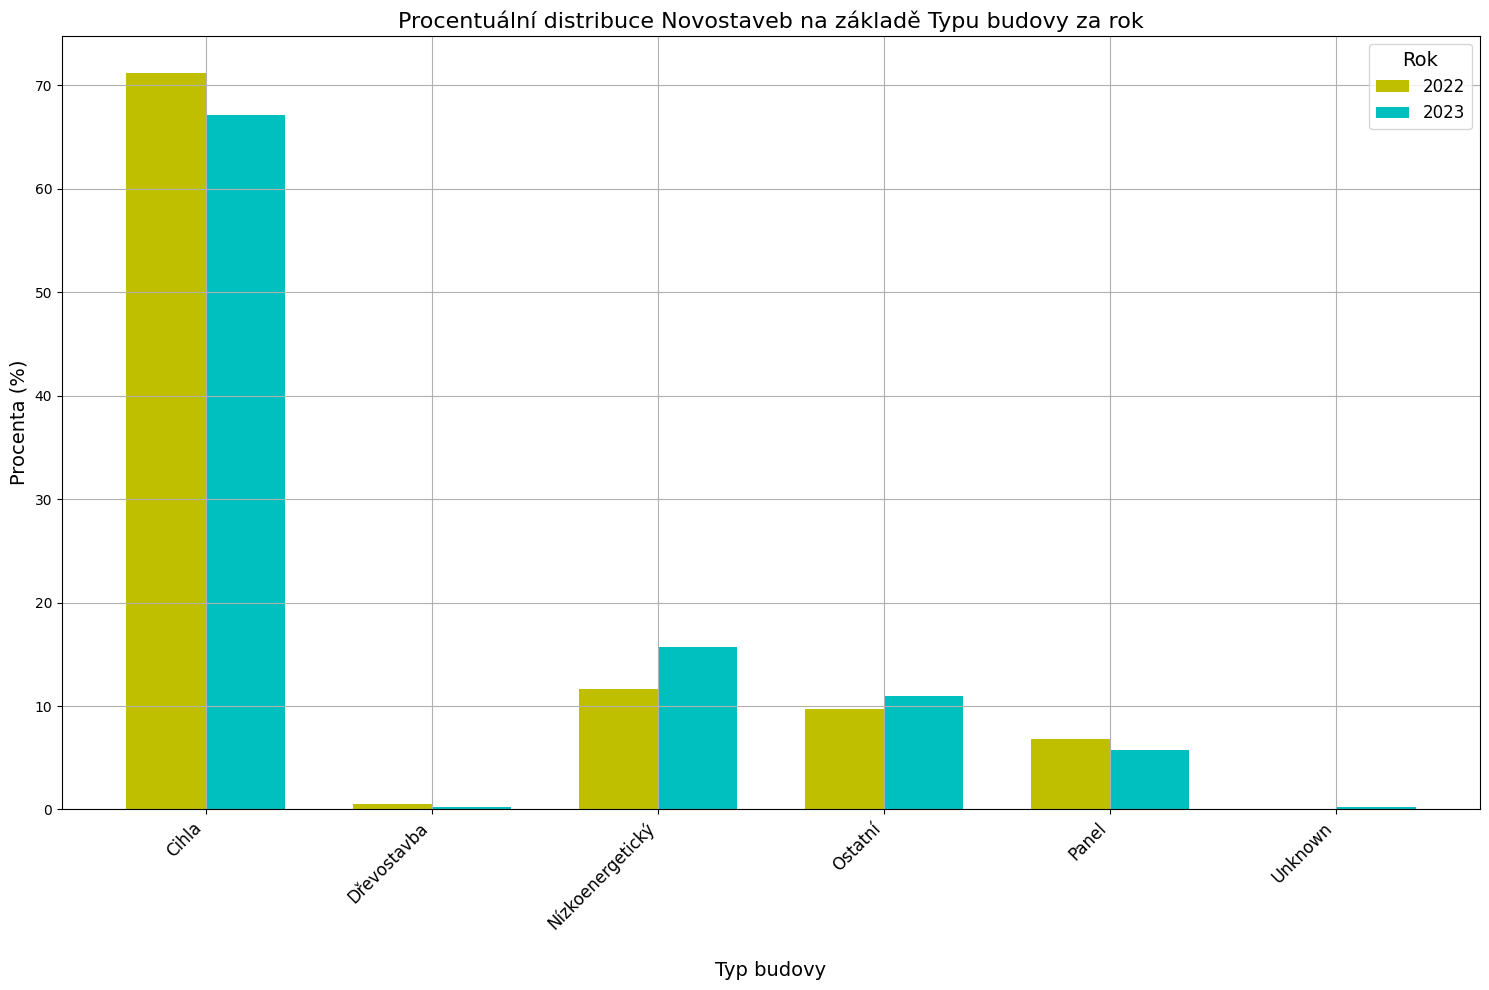

In [36]:
import numpy as np
import matplotlib.pyplot as plt

df = df_pronajem.copy()
df = df[df['Stav'] == 'Novostavba']

grouped_df = df.groupby(['Typ budovy', 'Data z roku']).size().reset_index(name='Count')

# Calculate the total count per year
total_count = grouped_df.groupby('Data z roku')['Count'].sum()

# Calculate the percentage
grouped_df['Percentage'] = grouped_df.apply(lambda row: row['Count'] / total_count[row['Data z roku']] * 100, axis=1)

pivot_df = grouped_df.pivot(index='Typ budovy', columns='Data z roku', values='Percentage').fillna(0)

offer_types = pivot_df.index
year_values = pivot_df.columns

width = 0.35  # the width of the bars
colors = ['y', 'c']  # Specify your color list here

ind = np.arange(len(offer_types))

fig, ax = plt.subplots(figsize=(15, 10))

for i, year in enumerate(year_values):
    ax.bar(ind - width/2 + i*width, pivot_df[year], width, color=colors[i], label=year)

ax.set_xticks(ind)
ax.set_xticklabels(offer_types, fontsize=12, rotation=45, ha="right")

ax.set_xlabel('Typ budovy', fontsize=14, labelpad=20)  
ax.set_ylabel('Procenta (%)', fontsize=14)
ax.set_title('Procentuální distribuce Novostaveb na základě Typu budovy za rok', fontsize=16)
ax.legend(title='Rok', fontsize=12, title_fontsize=14)

ax.grid(True)
plt.tight_layout()
plt.show()


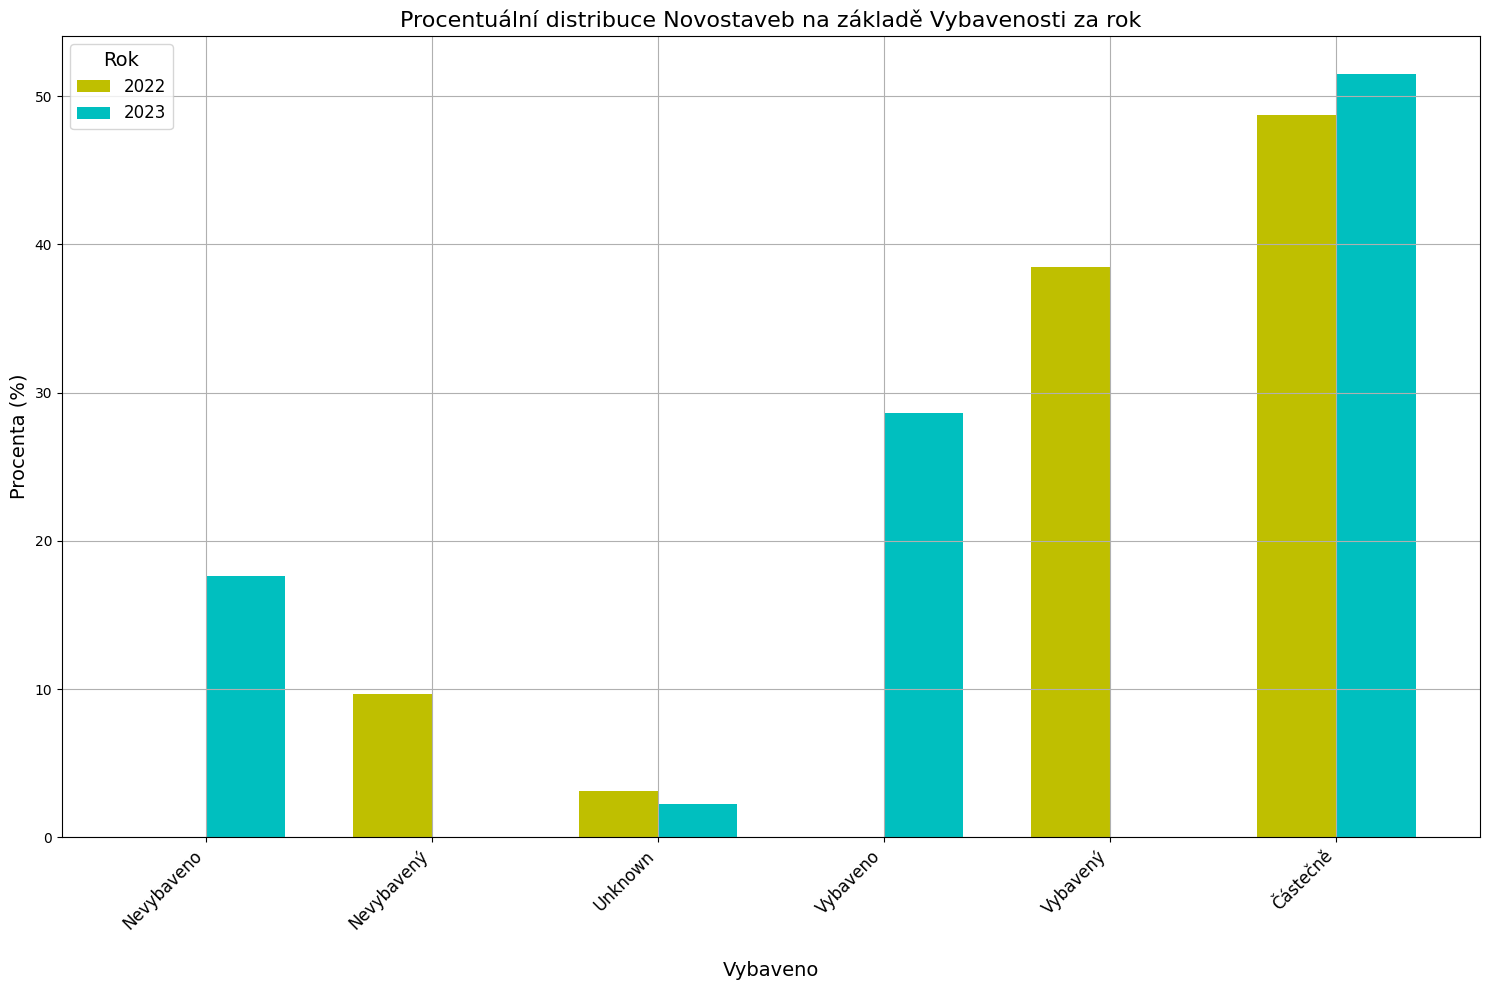

In [37]:
import numpy as np
import matplotlib.pyplot as plt

df = df_pronajem.copy()

df_pronajem['Vybaveno'] = df_pronajem['Vybaveno'].replace(['Nevybavený'], 'Nevybaveno')
df_pronajem['Vybaveno'] = df_pronajem['Vybaveno'].replace(['Vybavený'], 'Vybaveno')

df = df[df['Stav'] == 'Novostavba']

grouped_df = df.groupby(['Vybaveno', 'Data z roku']).size().reset_index(name='Count')

# Calculate the total count per year
total_count = grouped_df.groupby('Data z roku')['Count'].sum()

# Calculate the percentage
grouped_df['Percentage'] = grouped_df.apply(lambda row: row['Count'] / total_count[row['Data z roku']] * 100, axis=1)

pivot_df = grouped_df.pivot(index='Vybaveno', columns='Data z roku', values='Percentage').fillna(0)

offer_types = pivot_df.index
year_values = pivot_df.columns

width = 0.35  # the width of the bars
colors = ['y', 'c']  # Specify your color list here

ind = np.arange(len(offer_types))

fig, ax = plt.subplots(figsize=(15, 10))

for i, year in enumerate(year_values):
    ax.bar(ind - width/2 + i*width, pivot_df[year], width, color=colors[i], label=year)

ax.set_xticks(ind)
ax.set_xticklabels(offer_types, fontsize=12, rotation=45, ha="right")

ax.set_xlabel('Vybaveno', fontsize=14, labelpad=20)  
ax.set_ylabel('Procenta (%)', fontsize=14)
ax.set_title('Procentuální distribuce Novostaveb na základě Vybavenosti za rok', fontsize=16)
ax.legend(title='Rok', fontsize=12, title_fontsize=14)

ax.grid(True)
plt.tight_layout()
plt.show()

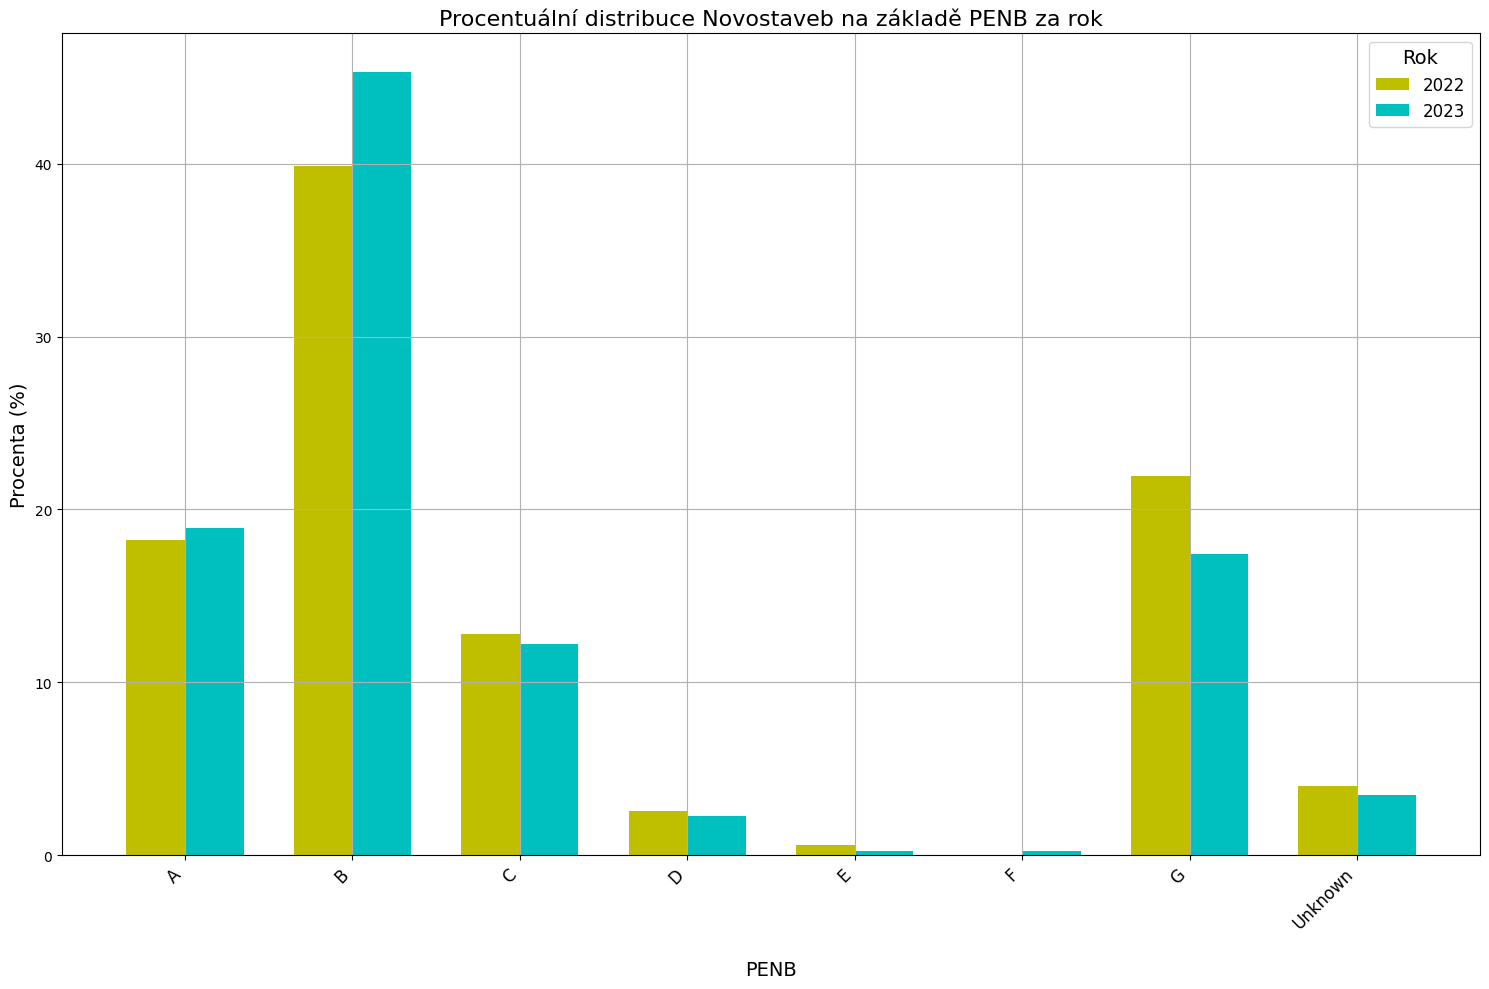

In [38]:
import numpy as np
import matplotlib.pyplot as plt

df = df_pronajem.copy()
df = df[df['Stav'] == 'Novostavba']

grouped_df = df.groupby(['PENB', 'Data z roku']).size().reset_index(name='Count')

# Calculate the total count per year
total_count = grouped_df.groupby('Data z roku')['Count'].sum()

# Calculate the percentage
grouped_df['Percentage'] = grouped_df.apply(lambda row: row['Count'] / total_count[row['Data z roku']] * 100, axis=1)

pivot_df = grouped_df.pivot(index='PENB', columns='Data z roku', values='Percentage').fillna(0)

offer_types = pivot_df.index
year_values = pivot_df.columns

width = 0.35  # the width of the bars
colors = ['y', 'c']  # Specify your color list here

ind = np.arange(len(offer_types))

fig, ax = plt.subplots(figsize=(15, 10))

for i, year in enumerate(year_values):
    ax.bar(ind - width/2 + i*width, pivot_df[year], width, color=colors[i], label=year)

ax.set_xticks(ind)
ax.set_xticklabels(offer_types, fontsize=12, rotation=45, ha="right")

ax.set_xlabel('PENB', fontsize=14, labelpad=20)  
ax.set_ylabel('Procenta (%)', fontsize=14)
ax.set_title('Procentuální distribuce Novostaveb na základě PENB za rok', fontsize=16)
ax.legend(title='Rok', fontsize=12, title_fontsize=14)

ax.grid(True)
plt.tight_layout()
plt.show()

### Novostavba prodej

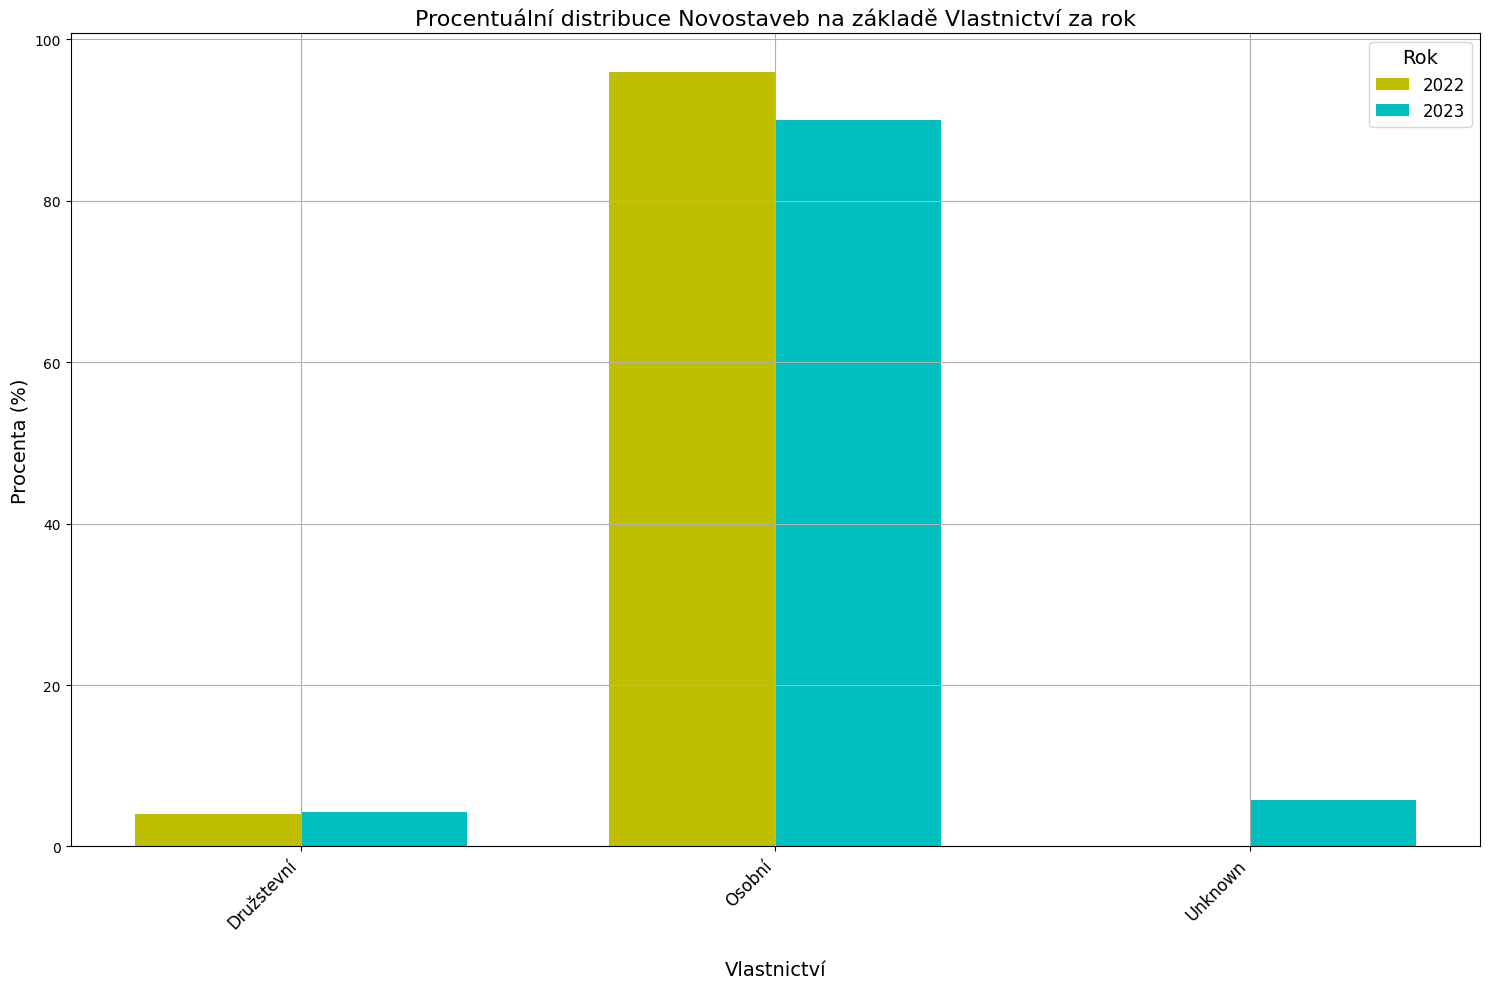

In [39]:
import numpy as np
import matplotlib.pyplot as plt

df = df_prodej.copy()
df = df[df['Stav'] == 'Novostavba']

grouped_df = df.groupby(['Vlastnictví', 'Data z roku']).size().reset_index(name='Count')

# Calculate the total count per year
total_count = grouped_df.groupby('Data z roku')['Count'].sum()

# Calculate the percentage
grouped_df['Percentage'] = grouped_df.apply(lambda row: row['Count'] / total_count[row['Data z roku']] * 100, axis=1)

pivot_df = grouped_df.pivot(index='Vlastnictví', columns='Data z roku', values='Percentage').fillna(0)

offer_types = pivot_df.index
year_values = pivot_df.columns

width = 0.35  # the width of the bars
colors = ['y', 'c']  # Specify your color list here

ind = np.arange(len(offer_types))

fig, ax = plt.subplots(figsize=(15, 10))

for i, year in enumerate(year_values):
    ax.bar(ind - width/2 + i*width, pivot_df[year], width, color=colors[i], label=year)

ax.set_xticks(ind)
ax.set_xticklabels(offer_types, fontsize=12, rotation=45, ha="right")

ax.set_xlabel('Vlastnictví', fontsize=14, labelpad=20)  
ax.set_ylabel('Procenta (%)', fontsize=14)
ax.set_title('Procentuální distribuce Novostaveb na základě Vlastnictví za rok', fontsize=16)
ax.legend(title='Rok', fontsize=12, title_fontsize=14)

ax.grid(True)
plt.tight_layout()
plt.show()

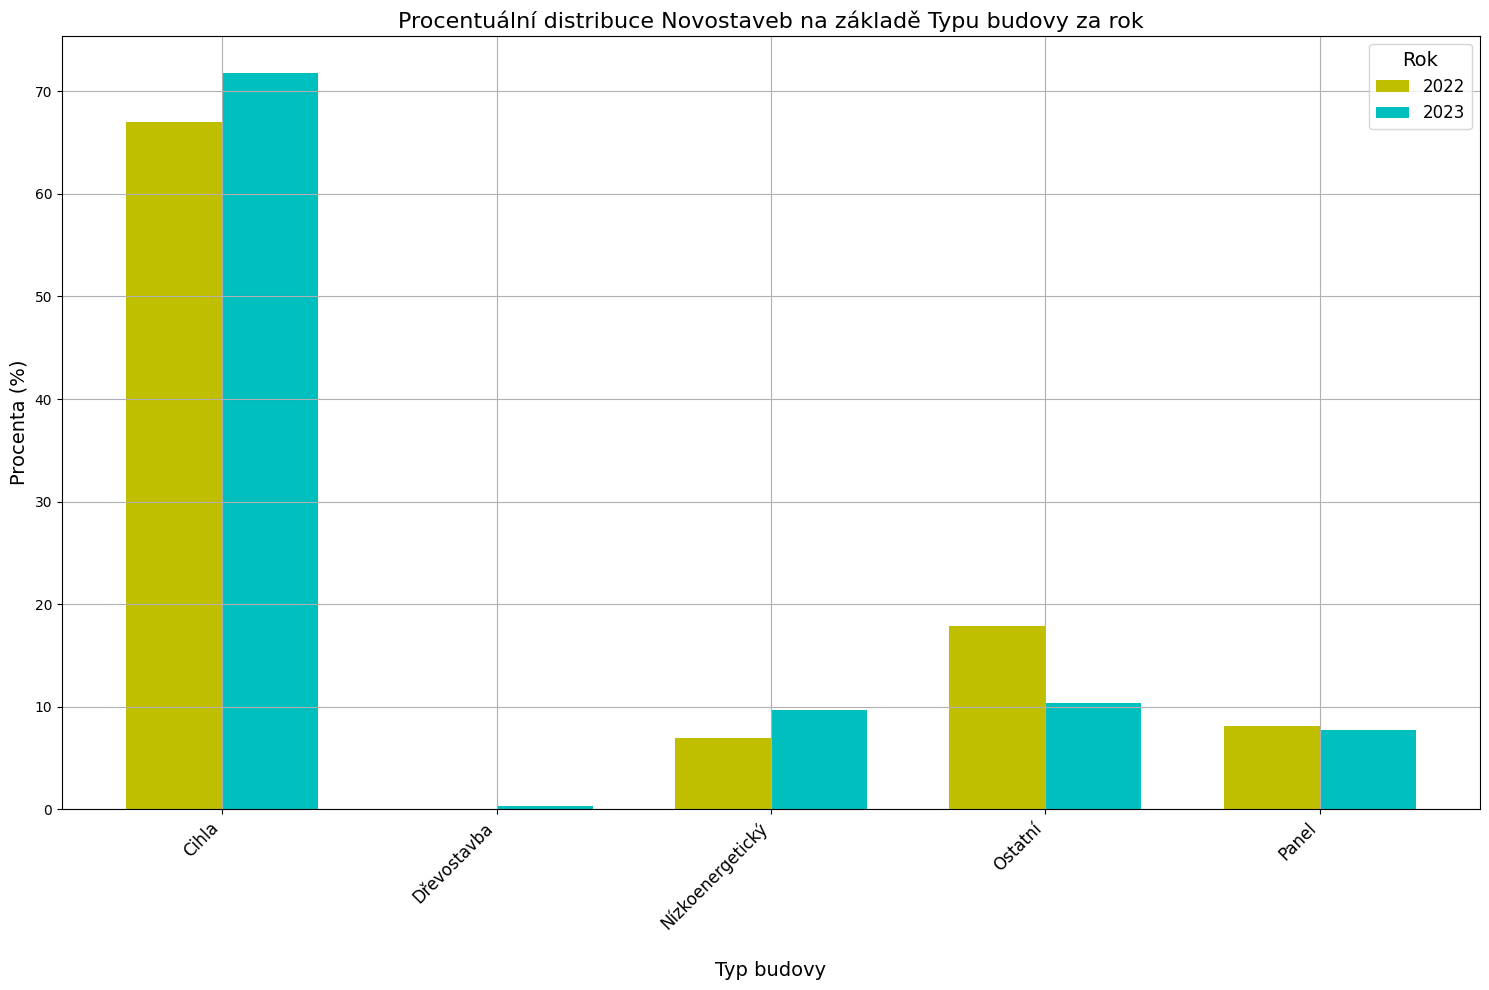

In [40]:
import numpy as np
import matplotlib.pyplot as plt

df = df_prodej.copy()
df = df[df['Stav'] == 'Novostavba']

grouped_df = df.groupby(['Typ budovy', 'Data z roku']).size().reset_index(name='Count')

# Calculate the total count per year
total_count = grouped_df.groupby('Data z roku')['Count'].sum()

# Calculate the percentage
grouped_df['Percentage'] = grouped_df.apply(lambda row: row['Count'] / total_count[row['Data z roku']] * 100, axis=1)

pivot_df = grouped_df.pivot(index='Typ budovy', columns='Data z roku', values='Percentage').fillna(0)

offer_types = pivot_df.index
year_values = pivot_df.columns

width = 0.35  # the width of the bars
colors = ['y', 'c']  # Specify your color list here

ind = np.arange(len(offer_types))

fig, ax = plt.subplots(figsize=(15, 10))

for i, year in enumerate(year_values):
    ax.bar(ind - width/2 + i*width, pivot_df[year], width, color=colors[i], label=year)

ax.set_xticks(ind)
ax.set_xticklabels(offer_types, fontsize=12, rotation=45, ha="right")

ax.set_xlabel('Typ budovy', fontsize=14, labelpad=20)  
ax.set_ylabel('Procenta (%)', fontsize=14)
ax.set_title('Procentuální distribuce Novostaveb na základě Typu budovy za rok', fontsize=16)
ax.legend(title='Rok', fontsize=12, title_fontsize=14)

ax.grid(True)
plt.tight_layout()
plt.show()

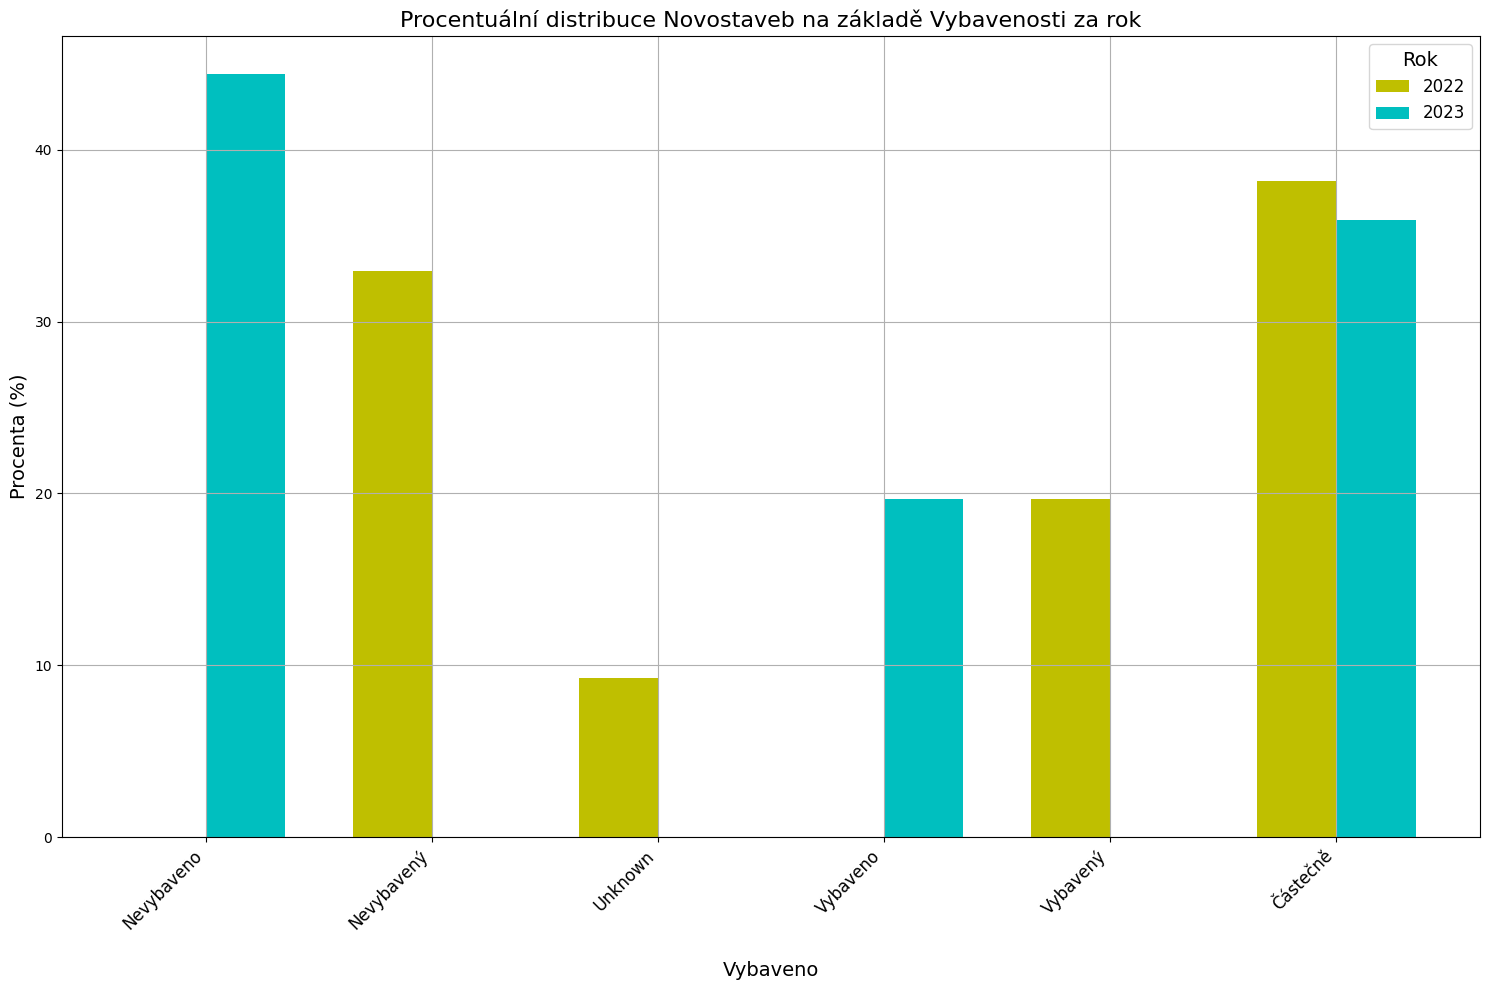

In [41]:
import numpy as np
import matplotlib.pyplot as plt

df = df_prodej.copy()

df_prodej['Vybaveno'] = df_prodej['Vybaveno'].replace(['Nevybavený'], 'Nevybaveno')
df_prodej['Vybaveno'] = df_prodej['Vybaveno'].replace(['Vybavený'], 'Vybaveno')

df = df[df['Stav'] == 'Novostavba']

grouped_df = df.groupby(['Vybaveno', 'Data z roku']).size().reset_index(name='Count')

# Calculate the total count per year
total_count = grouped_df.groupby('Data z roku')['Count'].sum()

# Calculate the percentage
grouped_df['Percentage'] = grouped_df.apply(lambda row: row['Count'] / total_count[row['Data z roku']] * 100, axis=1)

pivot_df = grouped_df.pivot(index='Vybaveno', columns='Data z roku', values='Percentage').fillna(0)

offer_types = pivot_df.index
year_values = pivot_df.columns

width = 0.35  # the width of the bars
colors = ['y', 'c']  # Specify your color list here

ind = np.arange(len(offer_types))

fig, ax = plt.subplots(figsize=(15, 10))

for i, year in enumerate(year_values):
    ax.bar(ind - width/2 + i*width, pivot_df[year], width, color=colors[i], label=year)

ax.set_xticks(ind)
ax.set_xticklabels(offer_types, fontsize=12, rotation=45, ha="right")

ax.set_xlabel('Vybaveno', fontsize=14, labelpad=20)  
ax.set_ylabel('Procenta (%)', fontsize=14)
ax.set_title('Procentuální distribuce Novostaveb na základě Vybavenosti za rok', fontsize=16)
ax.legend(title='Rok', fontsize=12, title_fontsize=14)

ax.grid(True)
plt.tight_layout()
plt.show()

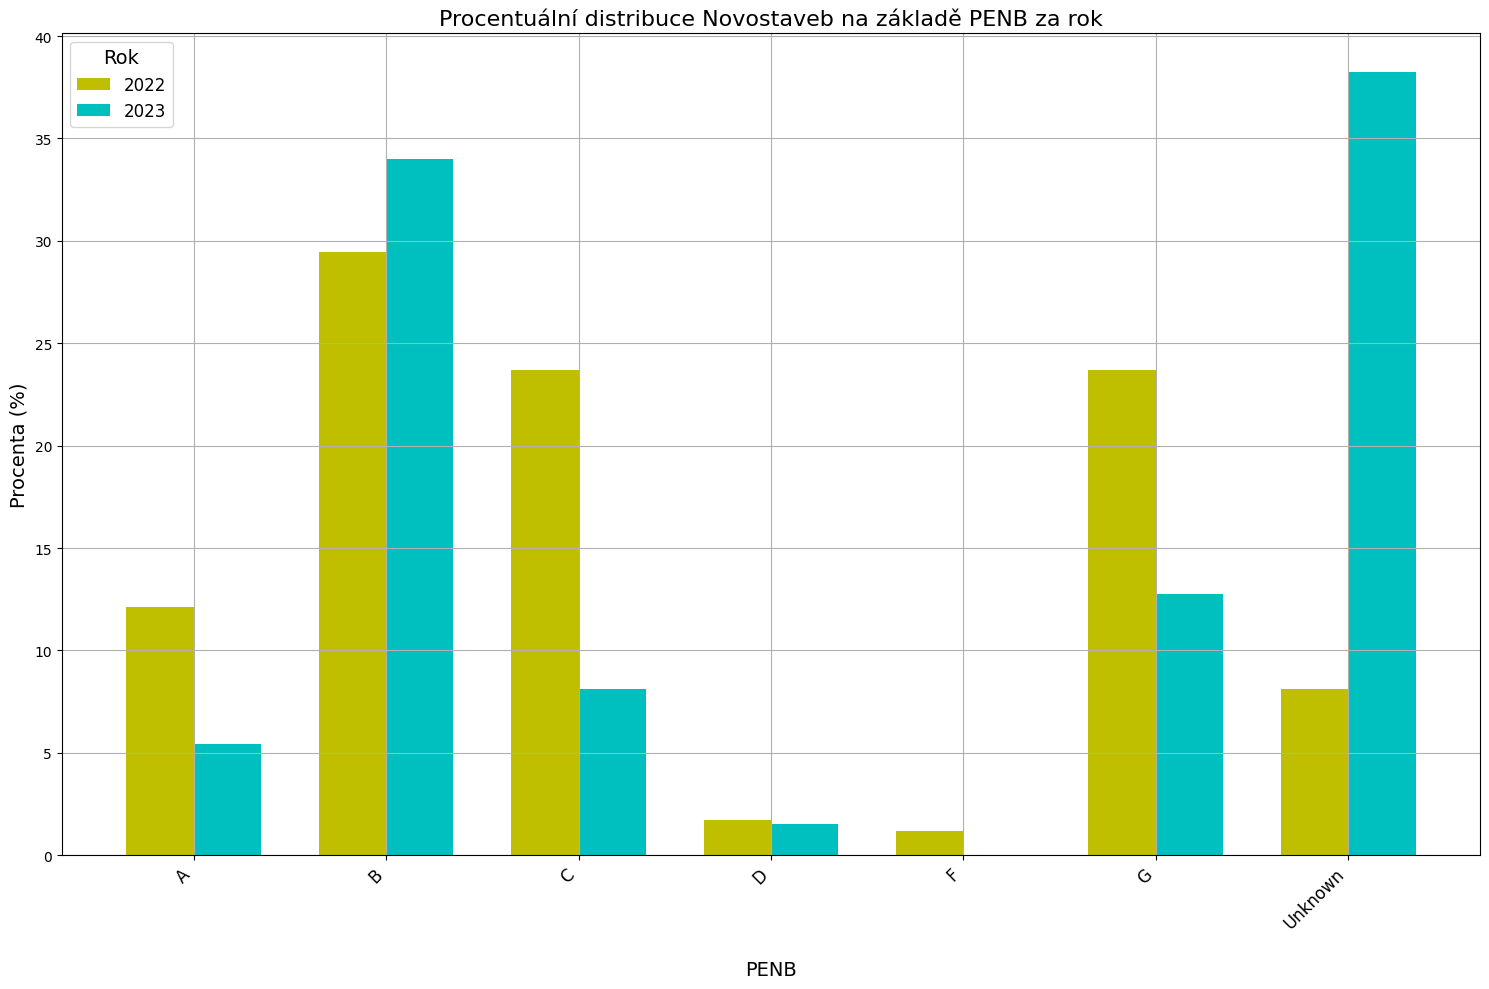

In [42]:
import numpy as np
import matplotlib.pyplot as plt

df = df_prodej.copy()
df = df[df['Stav'] == 'Novostavba']

grouped_df = df.groupby(['PENB', 'Data z roku']).size().reset_index(name='Count')

# Calculate the total count per year
total_count = grouped_df.groupby('Data z roku')['Count'].sum()

# Calculate the percentage
grouped_df['Percentage'] = grouped_df.apply(lambda row: row['Count'] / total_count[row['Data z roku']] * 100, axis=1)

pivot_df = grouped_df.pivot(index='PENB', columns='Data z roku', values='Percentage').fillna(0)

offer_types = pivot_df.index
year_values = pivot_df.columns

width = 0.35  # the width of the bars
colors = ['y', 'c']  # Specify your color list here

ind = np.arange(len(offer_types))

fig, ax = plt.subplots(figsize=(15, 10))

for i, year in enumerate(year_values):
    ax.bar(ind - width/2 + i*width, pivot_df[year], width, color=colors[i], label=year)

ax.set_xticks(ind)
ax.set_xticklabels(offer_types, fontsize=12, rotation=45, ha="right")

ax.set_xlabel('PENB', fontsize=14, labelpad=20)  
ax.set_ylabel('Procenta (%)', fontsize=14)
ax.set_title('Procentuální distribuce Novostaveb na základě PENB za rok', fontsize=16)
ax.legend(title='Rok', fontsize=12, title_fontsize=14)

ax.grid(True)
plt.tight_layout()
plt.show()

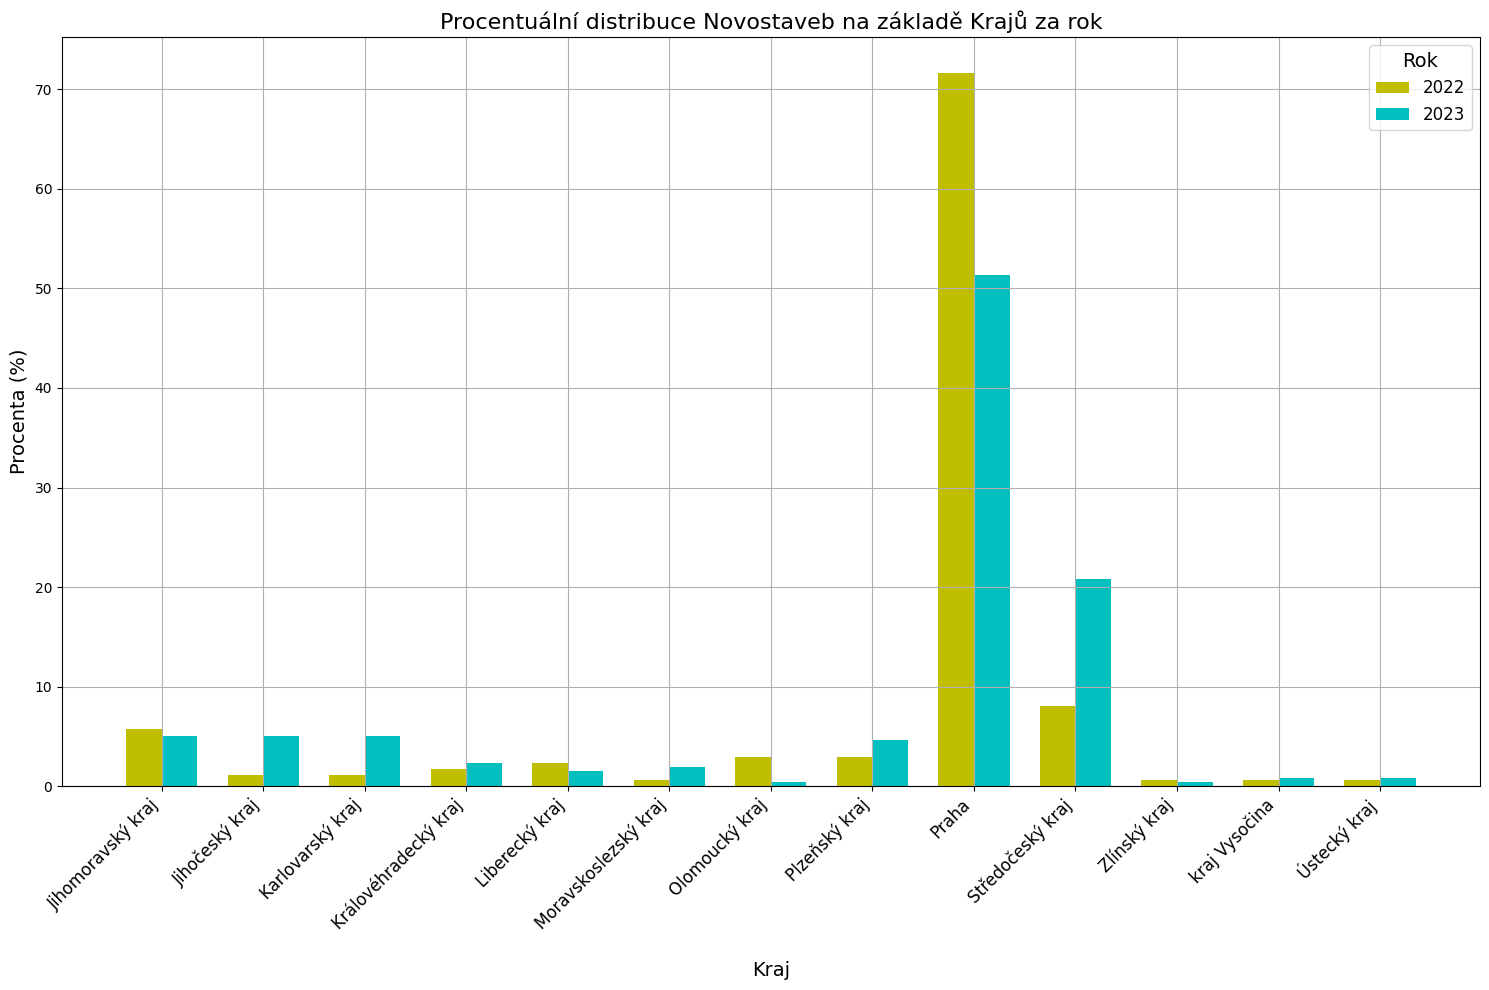

In [43]:
import numpy as np
import matplotlib.pyplot as plt

df = df_prodej.copy()
df = df[df['Stav'] == 'Novostavba']

grouped_df = df.groupby(['Kraj', 'Data z roku']).size().reset_index(name='Count')

# Calculate the total count per year
total_count = grouped_df.groupby('Data z roku')['Count'].sum()

# Calculate the percentage
grouped_df['Percentage'] = grouped_df.apply(lambda row: row['Count'] / total_count[row['Data z roku']] * 100, axis=1)

pivot_df = grouped_df.pivot(index='Kraj', columns='Data z roku', values='Percentage').fillna(0)

offer_types = pivot_df.index
year_values = pivot_df.columns

width = 0.35  # the width of the bars
colors = ['y', 'c']  # Specify your color list here

ind = np.arange(len(offer_types))

fig, ax = plt.subplots(figsize=(15, 10))

for i, year in enumerate(year_values):
    ax.bar(ind - width/2 + i*width, pivot_df[year], width, color=colors[i], label=year)

ax.set_xticks(ind)
ax.set_xticklabels(offer_types, fontsize=12, rotation=45, ha="right")

ax.set_xlabel('Kraj', fontsize=14, labelpad=20)  
ax.set_ylabel('Procenta (%)', fontsize=14)
ax.set_title('Procentuální distribuce Novostaveb na základě Krajů za rok', fontsize=16)
ax.legend(title='Rok', fontsize=12, title_fontsize=14)

ax.grid(True)
plt.tight_layout()
plt.show()

### Binary values

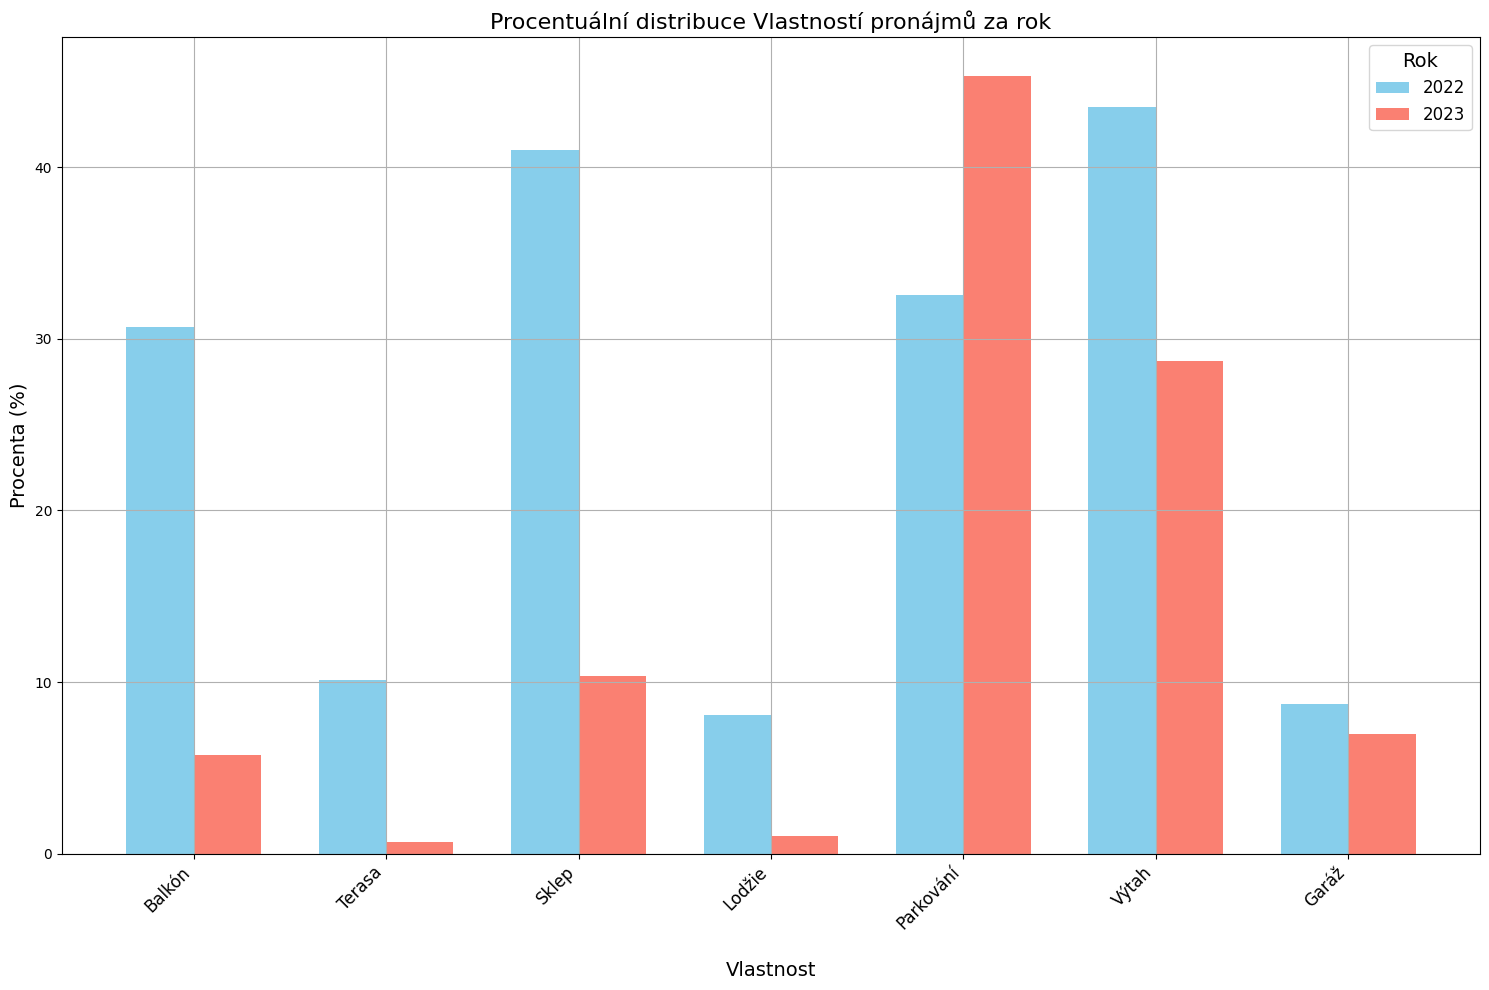

In [44]:
import numpy as np
import matplotlib.pyplot as plt

binary_attributes = ['Balkón', 'Terasa', 'Sklep', 'Lodžie', 'Parkování', 'Výtah', 'Garáž']
colors = ['skyblue', 'salmon']  # Specify your color list here

df = df_pronajem.copy()

# Filter dataframe for years 2022 and 2023 only
df = df[df['Data z roku'].isin([2022, 2023])]

# Initialize a dictionary to hold results
results = {}

# Group by 'Data z roku' and calculate the count and percentage
for attribute in binary_attributes:
    grouped_df = df.groupby(['Data z roku', attribute]).size().reset_index(name='Count')
    total_count = grouped_df.groupby('Data z roku')['Count'].sum()
    grouped_df['Percentage'] = grouped_df.apply(lambda row: row['Count'] / total_count[row['Data z roku']] * 100, axis=1)
    pivot_df = grouped_df[grouped_df[attribute] == 1].pivot(index=attribute, columns='Data z roku', values='Percentage').fillna(0)
    results[attribute] = pivot_df.loc[1] if 1 in pivot_df.index else pd.Series({2022: 0, 2023: 0})

# Plotting
fig, ax = plt.subplots(figsize=(15, 10))
width = 0.35  # the width of the bars
ind = np.arange(len(binary_attributes))

for i, year in enumerate([2022, 2023]):
    percentages = [results[attribute].get(year, 0) for attribute in binary_attributes]
    ax.bar(ind - width/2 + i*width, percentages, width, color=colors[i], label=year)

ax.set_xticks(ind)
ax.set_xticklabels(binary_attributes, fontsize=12, rotation=45, ha="right")

ax.set_xlabel('Vlastnost', fontsize=14, labelpad=20)
ax.set_ylabel('Procenta (%)', fontsize=14)
ax.set_title('Procentuální distribuce Vlastností pronájmů za rok', fontsize=16)
ax.legend(title='Rok', fontsize=12, title_fontsize=14)

ax.grid(True)
plt.tight_layout()
plt.show()


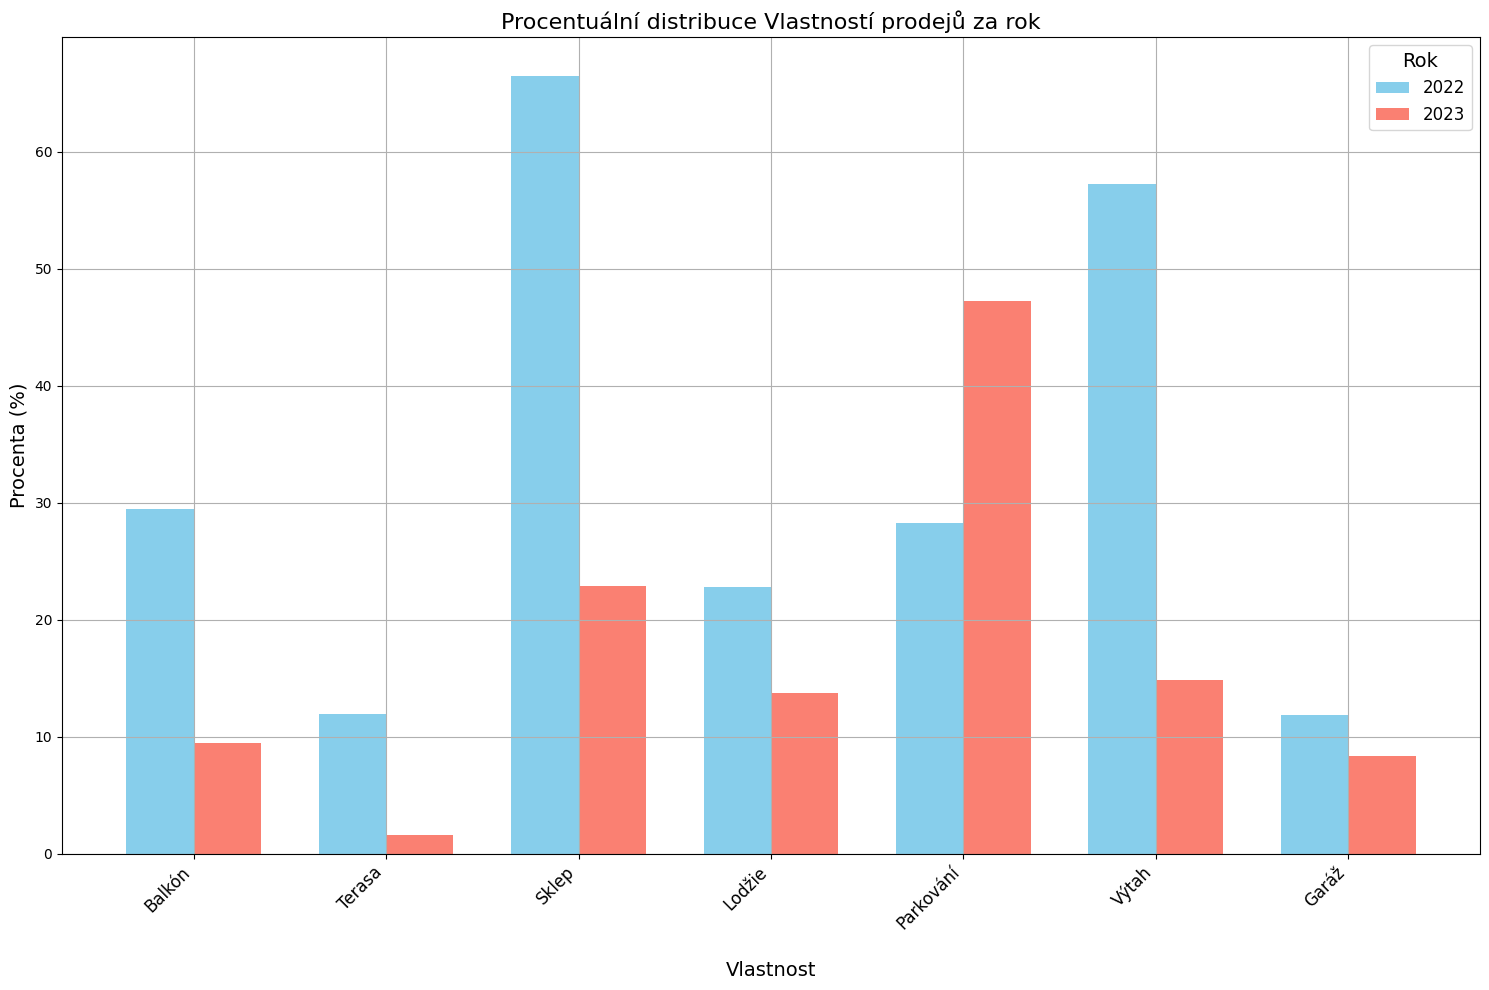

In [45]:
import numpy as np
import matplotlib.pyplot as plt

binary_attributes = ['Balkón', 'Terasa', 'Sklep', 'Lodžie', 'Parkování', 'Výtah', 'Garáž']
colors = ['skyblue', 'salmon']  # Specify your color list here

df = df_prodej.copy()

# Filter dataframe for years 2022 and 2023 only
df = df[df['Data z roku'].isin([2022, 2023])]

# Initialize a dictionary to hold results
results = {}

# Group by 'Data z roku' and calculate the count and percentage
for attribute in binary_attributes:
    grouped_df = df.groupby(['Data z roku', attribute]).size().reset_index(name='Count')
    total_count = grouped_df.groupby('Data z roku')['Count'].sum()
    grouped_df['Percentage'] = grouped_df.apply(lambda row: row['Count'] / total_count[row['Data z roku']] * 100, axis=1)
    pivot_df = grouped_df[grouped_df[attribute] == 1].pivot(index=attribute, columns='Data z roku', values='Percentage').fillna(0)
    results[attribute] = pivot_df.loc[1] if 1 in pivot_df.index else pd.Series({2022: 0, 2023: 0})

# Plotting
fig, ax = plt.subplots(figsize=(15, 10))
width = 0.35  # the width of the bars
ind = np.arange(len(binary_attributes))

for i, year in enumerate([2022, 2023]):
    percentages = [results[attribute].get(year, 0) for attribute in binary_attributes]
    ax.bar(ind - width/2 + i*width, percentages, width, color=colors[i], label=year)

ax.set_xticks(ind)
ax.set_xticklabels(binary_attributes, fontsize=12, rotation=45, ha="right")

ax.set_xlabel('Vlastnost', fontsize=14, labelpad=20)
ax.set_ylabel('Procenta (%)', fontsize=14)
ax.set_title('Procentuální distribuce Vlastností prodejů za rok', fontsize=16)
ax.legend(title='Rok', fontsize=12, title_fontsize=14)

ax.grid(True)
plt.tight_layout()
plt.show()


### Histogram Cena

13.824435585585586
14.41209296390813


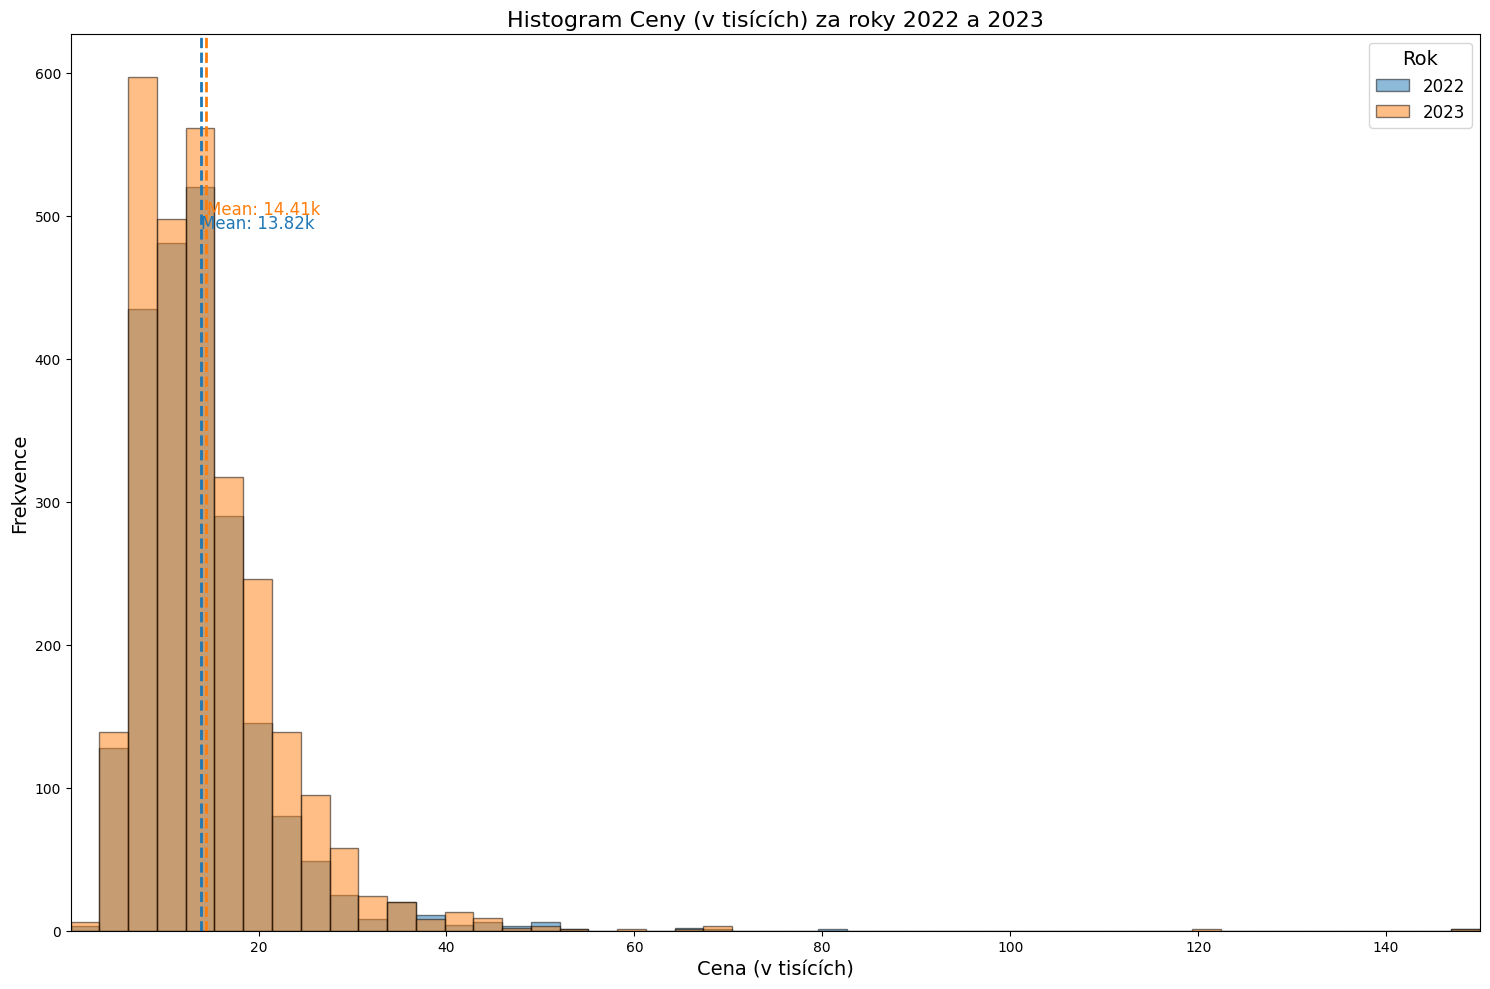

In [46]:
df = df_pronajem.copy()

# Convert 'Cena' to thousands
df['Cena'] = df['Cena'] / 1_000

# Redefine data for 2022 and 2023 and their means
data_2022 = df[df['Data z roku'] == 2022]['Cena'].dropna()
mean_2022 = data_2022.mean()
data_2023 = df[df['Data z roku'] == 2023]['Cena'].dropna()
mean_2023 = data_2023.mean()

# Define the number of bins and the range for the histogram
bins = np.linspace(min(min(data_2022), min(data_2023)), max(max(data_2022), max(data_2023)), 50)

# Create a figure and a single subplot
fig, ax = plt.subplots(figsize=(15, 10))

print(mean_2022)
print(mean_2023)

# Define your colors
color_2022 = 'tab:blue'
color_2023 = 'tab:orange'

# Create the histogram for 2022
ax.hist(data_2022, bins=bins, color=color_2022, edgecolor='black', alpha=0.5, label='2022')
ax.axvline(mean_2022, color=color_2022, linestyle='dashed', linewidth=2)
# Adding text for mean value for 2022
ax.text(mean_2022+0.1, ax.get_ylim()[1]*0.9, f'Mean: {mean_2022:.2f}k', fontsize=12, color=color_2022)

# Create the histogram for 2023
ax.hist(data_2023, bins=bins, color=color_2023, edgecolor='black', alpha=0.5, label='2023')
ax.axvline(mean_2023, color=color_2023, linestyle='dashed', linewidth=2)
# Adding text for mean value for 2023
ax.text(mean_2023+0.1, ax.get_ylim()[1]*0.8, f'Mean: {mean_2023:.2f}k', fontsize=12, color=color_2023)

ax.set_title('Histogram Ceny (v tisících) za roky 2022 a 2023', fontsize=16)
ax.set_xlabel('Cena (v tisících)', fontsize=14)
ax.set_ylabel('Frekvence', fontsize=14)
ax.legend(title='Rok', fontsize=12, title_fontsize=14)

# Setting the x-axis range
ax.set_xlim([min(min(data_2022), min(data_2023)), max(max(data_2022), max(data_2023))])

plt.tight_layout()
plt.show()

C:\Users\vikto\AppData\Local\Temp\ipykernel_15440\158825143.py:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bins = np.histogram_bin_edges(data_2022.append(data_2023), bins='auto')


13.824435585585586
14.41209296390813


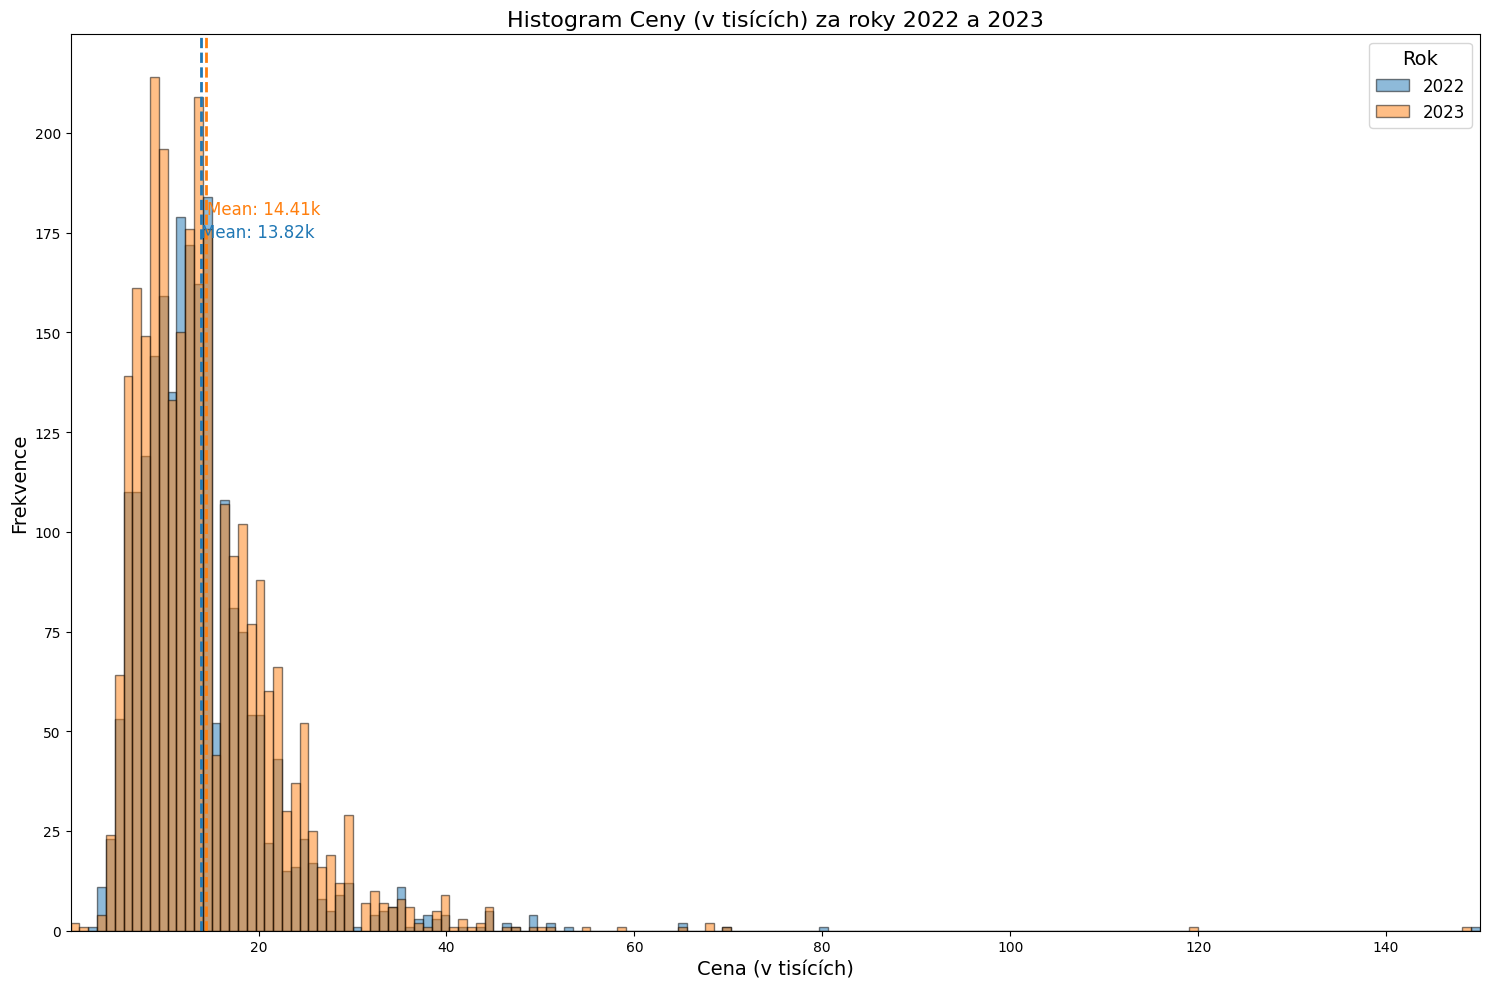

In [47]:
df = df_pronajem.copy()

# Convert 'Cena' to thousands
df['Cena'] = df['Cena'] / 1_000

# Redefine data for 2022 and 2023 and their means
data_2022 = df[df['Data z roku'] == 2022]['Cena'].dropna()
mean_2022 = data_2022.mean()
data_2023 = df[df['Data z roku'] == 2023]['Cena'].dropna()
mean_2023 = data_2023.mean()

# Define custom bins
bins = np.histogram_bin_edges(data_2022.append(data_2023), bins='auto')

# Create a figure and a single subplot
fig, ax = plt.subplots(figsize=(15, 10))

print(mean_2022)
print(mean_2023)

# Define your colors
color_2022 = 'tab:blue'
color_2023 = 'tab:orange'

# Create the histogram for 2022
ax.hist(data_2022, bins=bins, color=color_2022, edgecolor='black', alpha=0.5, label='2022')
ax.axvline(mean_2022, color=color_2022, linestyle='dashed', linewidth=2)
# Adding text for mean value for 2022
ax.text(mean_2022+0.1, ax.get_ylim()[1]*0.9, f'Mean: {mean_2022:.2f}k', fontsize=12, color=color_2022)

# Create the histogram for 2023
ax.hist(data_2023, bins=bins, color=color_2023, edgecolor='black', alpha=0.5, label='2023')
ax.axvline(mean_2023, color=color_2023, linestyle='dashed', linewidth=2)
# Adding text for mean value for 2023
ax.text(mean_2023+0.1, ax.get_ylim()[1]*0.8, f'Mean: {mean_2023:.2f}k', fontsize=12, color=color_2023)

ax.set_title('Histogram Ceny (v tisících) za roky 2022 a 2023', fontsize=16)
ax.set_xlabel('Cena (v tisících)', fontsize=14)
ax.set_ylabel('Frekvence', fontsize=14)
ax.legend(title='Rok', fontsize=12, title_fontsize=14)

# Setting the x-axis range
ax.set_xlim([min(min(data_2022), min(data_2023)), max(max(data_2022), max(data_2023))])

plt.tight_layout()
plt.show()


6.311734511278195
4.3593789413369715


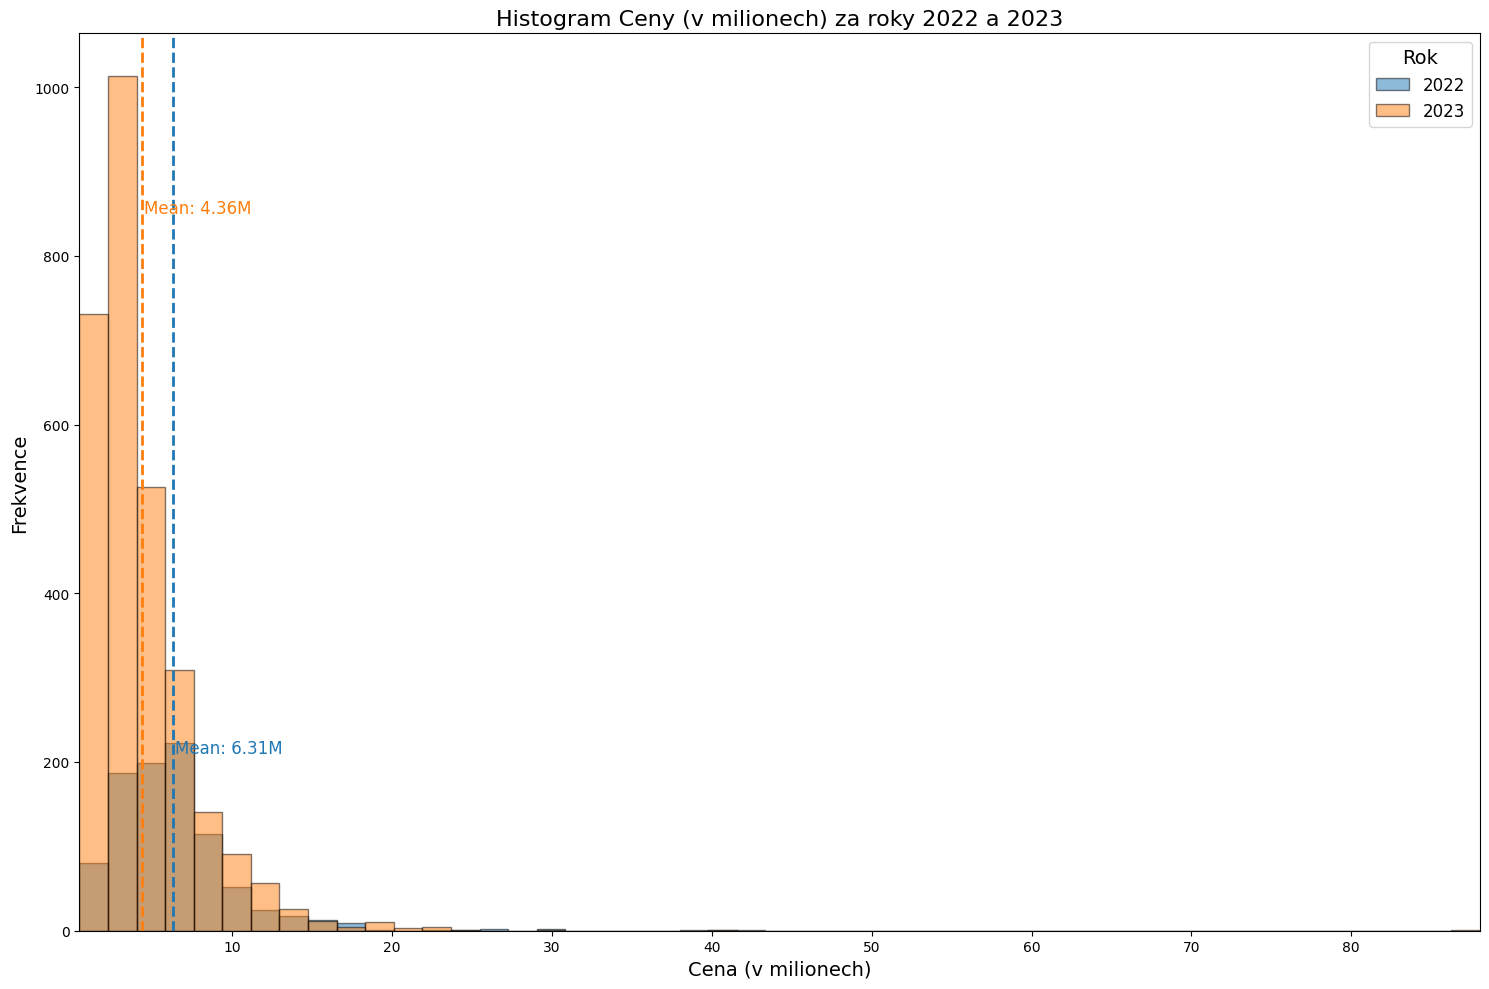

In [48]:
df = df_prodej.copy()

# Convert 'Cena' to millions
df['Cena'] = df['Cena'] / 1_000_000

# Redefine data for 2022 and 2023 and their means
data_2022 = df[df['Data z roku'] == 2022]['Cena'].dropna()
mean_2022 = data_2022.mean()
data_2023 = df[df['Data z roku'] == 2023]['Cena'].dropna()
mean_2023 = data_2023.mean()

# Define the number of bins and the range for the histogram
bins = np.linspace(min(min(data_2022), min(data_2023)), max(max(data_2022), max(data_2023)), 50)

# Create a figure and a single subplot
fig, ax = plt.subplots(figsize=(15, 10))

print(mean_2022)
print(mean_2023)

# Define your colors
color_2022 = 'tab:blue'
color_2023 = 'tab:orange'

# Create the histogram for 2022
ax.hist(data_2022, bins=bins, color=color_2022, edgecolor='black', alpha=0.5, label='2022')
ax.axvline(mean_2022, color=color_2022, linestyle='dashed', linewidth=2)
# Adding text for mean value for 2022
ax.text(mean_2022+0.1, ax.get_ylim()[1]*0.9, f'Mean: {mean_2022:.2f}M', fontsize=12, color=color_2022)

# Create the histogram for 2023
ax.hist(data_2023, bins=bins, color=color_2023, edgecolor='black', alpha=0.5, label='2023')
ax.axvline(mean_2023, color=color_2023, linestyle='dashed', linewidth=2)
# Adding text for mean value for 2023
ax.text(mean_2023+0.1, ax.get_ylim()[1]*0.8, f'Mean: {mean_2023:.2f}M', fontsize=12, color=color_2023)

ax.set_title('Histogram Ceny (v milionech) za roky 2022 a 2023', fontsize=16)
ax.set_xlabel('Cena (v milionech)', fontsize=14)
ax.set_ylabel('Frekvence', fontsize=14)
ax.legend(title='Rok', fontsize=12, title_fontsize=14)

# Setting the x-axis range
ax.set_xlim([min(min(data_2022), min(data_2023)), max(max(data_2022), max(data_2023))])

plt.tight_layout()
plt.show()


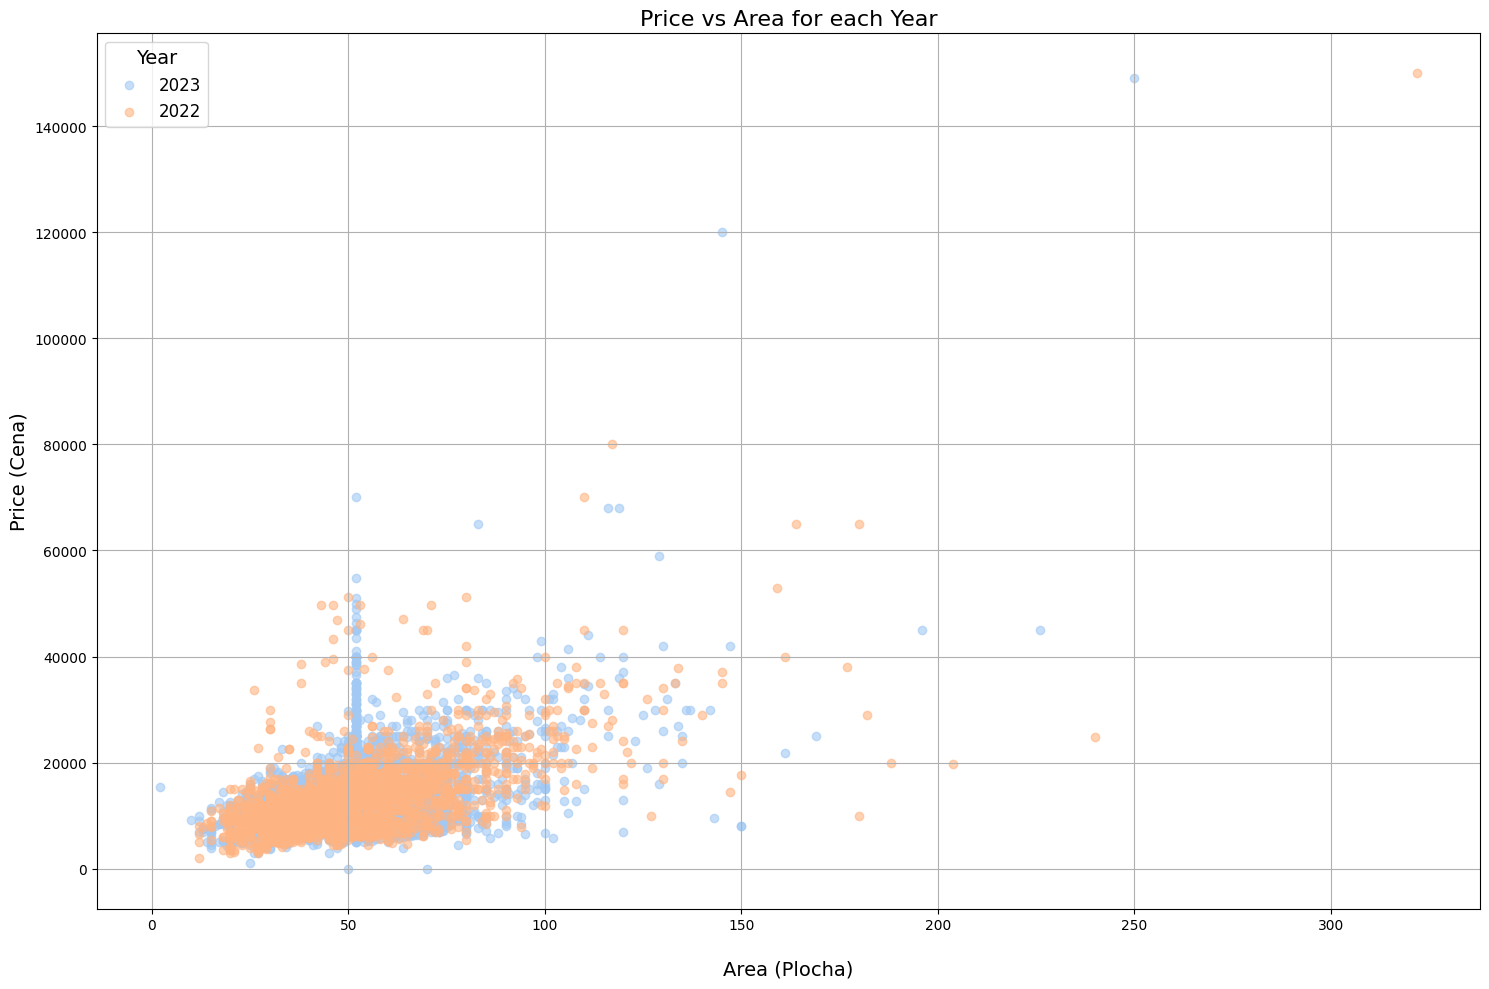

In [49]:
df = df_pronajem.copy()

# Ensure 'Cena', 'Plocha' and 'Data z roku' columns are numeric
df['Cena'] = pd.to_numeric(df['Cena'], errors='coerce')
df['Plocha'] = pd.to_numeric(df['Plocha'], errors='coerce')
df['Data z roku'] = pd.to_numeric(df['Data z roku'], errors='coerce')

# Get unique 'Data z roku' values
year_values = df['Data z roku'].unique()

# Choose a nice color palette
colors = sns.color_palette('pastel')[0:len(year_values)]

# Create a new figure
plt.figure(figsize=(15, 10))

# Create a scatter plot for each year
for i, year in enumerate(year_values):
    year_df = df[df['Data z roku'] == year]
    plt.scatter(year_df['Plocha'], year_df['Cena'], color=colors[i], label=year, alpha=0.6)

# Add labels, title, legend and grid
plt.xlabel('Area (Plocha)', fontsize=14, labelpad=20)  # Adjust fontsize and labelpad
plt.ylabel('Price (Cena)', fontsize=14)
plt.title('Price vs Area for each Year', fontsize=16)
plt.legend(title='Year', fontsize=12, title_fontsize=14)
plt.grid(True)

# Improve layout for better visibility
plt.tight_layout()
plt.show()

# Modeling

## Regression

In [50]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer

df = df_prodej.copy()


In [51]:
df = df.drop(columns=['Typ nabídky', 'Vlastnictví', 'Typ budovy', 'Stav'])

columns_to_drop = ['Ostatní', 'Unknown', 'Garsoniéra', '6+1', '5+kk', '5+1']
df = df[~df['Dispozice'].isin(columns_to_drop)]

df['Price per m2'] = df['Cena'] / df['Plocha']

In [52]:
print(df.head())

      Cena                  Kraj Dispozice  Plocha  Vybaveno  Podlaží  \
0  2750000  Moravskoslezský kraj       3+1      61  Částečně        9   
1  2300000          Ústecký kraj       2+1      58  Částečně        1   
3  2260000  Moravskoslezský kraj       3+1      67  Částečně        1   
4  5356000                 Praha       2+1      61  Částečně        5   
5  5500000                 Praha      1+kk      38  Vybaveno        1   

      PENB  Balkón  Terasa  Sklep  Lodžie  Parkování  Výtah  Garáž  MHD  \
0        F       1       0      1       0          1      1      0  258   
1        G       0       0      0       0          1      0      0  236   
3        G       0       0      0       1          0      0      0  772   
4  Unknown       0       0      0       0          0      0      0  394   
5        G       0       0      0       0          1      0      0  387   

   Pošta  Obchod  Banka  Restaurace  Lékárna  Škola  Mateřská škola  \
0   1324     150   1454          20    

In [53]:
# Define the order for each column
dispozice_order = ['1+kk', '1+1', '2+kk', '2+1', '3+kk', '3+1', '4+kk', '4+1']
penb_order = ['Unknown', 'G', 'F', 'E', 'D', 'C', 'B', 'A']
vybaveno_order = ['Unknown', 'Nevybaveno', 'Částečně', 'Vybaveno']

# Create a mapping from category to number for each column
dispozice_mapping = {category: i for i, category in enumerate(dispozice_order)}
penb_mapping = {category: i for i, category in enumerate(penb_order)}
vybaveno_mapping = {category: i for i, category in enumerate(vybaveno_order)}

# Apply the mapping to the corresponding column
df['Dispozice'] = df['Dispozice'].map(dispozice_mapping)
df['PENB'] = df['PENB'].map(penb_mapping)
df['Vybaveno'] = df['Vybaveno'].map(vybaveno_mapping)

label_encoder = LabelEncoder()

for col in ['Dispozice', 'PENB', 'Vybaveno']:
    df[col] = label_encoder.fit_transform(df[col])

In [54]:
df = pd.get_dummies(df, columns=['Kraj'])

In [55]:
# Define columns to be scaled
cols_to_scale = df.drop(columns=['Cena']).select_dtypes(include=['float64', 'int64']).columns

# Create a scaler object for the features
scaler = StandardScaler()

# Fit and transform the data for the features
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# Create a separate scaler object for the target 'Cena'
scaler_cena = StandardScaler()

# Fit and transform the data for 'Cena'
df['Cena'] = scaler_cena.fit_transform(df[['Cena']])

In [56]:
X = df.drop('Cena', axis=1)  # input features
y = df['Cena']  # target variable

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
print(df.shape)
print(df.head())

(3569, 38)
       Cena  Dispozice    Plocha  Vybaveno   Podlaží      PENB    Balkón  \
0 -0.527690   0.932369 -0.118807  0.260197  2.469725  0.317861  2.365807   
1 -0.653988  -0.175362 -0.245470  0.260197 -1.028419 -0.157200 -0.422689   
3 -0.665215   0.932369  0.134517  0.260197 -1.028419 -0.157200 -0.422689   
4  0.203715  -0.175362 -0.118807  0.260197  0.720653 -0.632261 -0.422689   
5  0.244131  -1.836960 -1.089886  1.579293 -1.028419 -0.157200 -0.422689   

     Terasa     Sklep    Lodžie  Parkování     Výtah    Garáž       MHD  \
0 -0.203558  1.348746 -0.454038   1.104947  1.661566 -0.32502 -0.113303   
1 -0.203558 -0.741430 -0.454038   1.104947 -0.601842 -0.32502 -0.146916   
3 -0.203558 -0.741430  2.202458  -0.905021 -0.601842 -0.32502  0.672023   
4 -0.203558 -0.741430 -0.454038  -0.905021 -0.601842 -0.32502  0.094487   
5 -0.203558 -0.741430 -0.454038   1.104947 -0.601842 -0.32502  0.083792   

      Pošta    Obchod     Banka  Restaurace   Lékárna     Škola  \
0  0.422585 -0

In [59]:
import os

# Make directory
if not os.path.exists('modeling_data'):
    os.makedirs('modeling_data')

# Write data to CSV
X_train.to_csv('modeling_data/X_train.csv', index=False)
y_train.to_csv('modeling_data/y_train.csv', index=False)
X_test.to_csv('modeling_data/X_test.csv', index=False)
y_test.to_csv('modeling_data/y_test.csv', index=False)

In [60]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [62]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

Mean Squared Error: 0.61
Mean Absolute Error: 0.06


Variable: Price per m2         Importance: 0.63
Variable: Plocha               Importance: 0.35
Variable: Dispozice            Importance: 0.0
Variable: Vybaveno             Importance: 0.0
Variable: Podlaží              Importance: 0.0
Variable: PENB                 Importance: 0.0
Variable: Balkón               Importance: 0.0
Variable: Terasa               Importance: 0.0
Variable: Sklep                Importance: 0.0
Variable: Lodžie               Importance: 0.0
Variable: Parkování            Importance: 0.0
Variable: Výtah                Importance: 0.0
Variable: Garáž                Importance: 0.0
Variable: MHD                  Importance: 0.0
Variable: Pošta                Importance: 0.0
Variable: Obchod               Importance: 0.0
Variable: Banka                Importance: 0.0
Variable: Restaurace           Importance: 0.0
Variable: Lékárna              Importance: 0.0
Variable: Škola                Importance: 0.0
Variable: Mateřská škola       Importance: 0.0
Variable: S

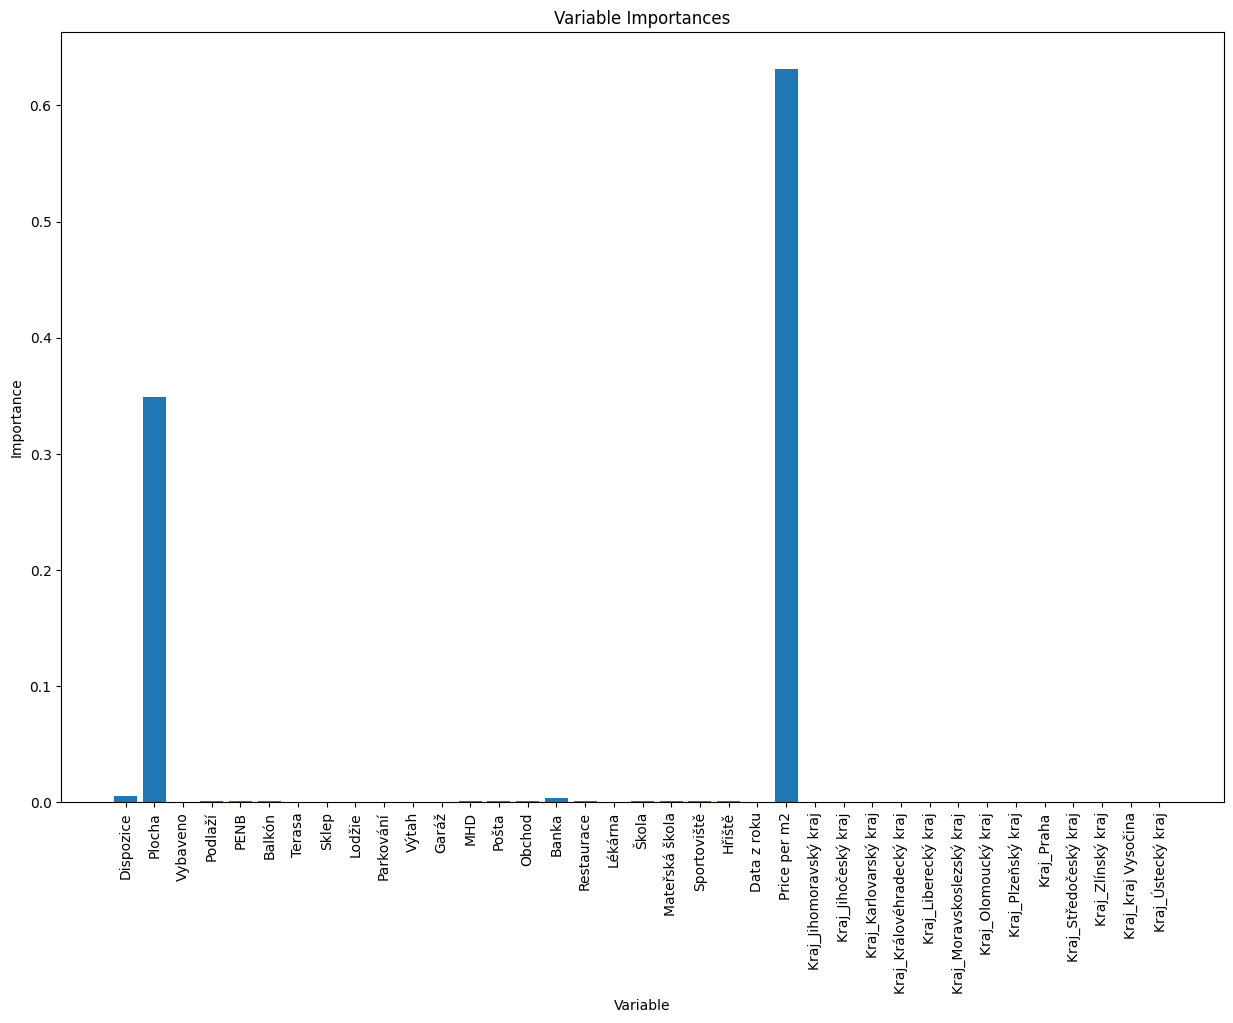

In [63]:
# Get numerical feature importances
importances = list(model.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(list(X_train.columns), importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.figure(figsize=(15,10))
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, X_train.columns, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [64]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

r2_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
print(f"Decision Tree R2 score: {r2_dt:.2f}")
print(f"Decision Tree Mean Squared Error: {mse_dt:.2f}")
print(f"Decision Tree Mean Absolute Error: {mae_dt:.2f}")

Decision Tree R2 score: 0.59
Decision Tree Mean Squared Error: 0.64
Decision Tree Mean Absolute Error: 0.10


In [65]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Random Forest R2 score: {r2_rf:.2f}")
print(f"Random Forest Mean Squared Error: {mse_rf:.2f}")
print(f"Random Forest Mean Absolute Error: {mae_rf:.2f}")

Random Forest R2 score: 0.61
Random Forest Mean Squared Error: 0.61
Random Forest Mean Absolute Error: 0.06


In [66]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', seed=42)

params = {
    'colsample_bytree': [0.5, 0.7],
    'n_estimators': [50, 100],
    'max_depth': [2, 5, 7],
    'learning_rate': [0.01, 0.1]
}

In [67]:
grid = GridSearchCV(xg_reg, params, verbose=3, n_jobs=-1, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


In [68]:
y_pred = grid.best_estimator_.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"R2 score: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

R2 score: 0.62
Mean Squared Error: 0.59
Mean Absolute Error: 0.09


In [69]:
# Extract feature importances
importances = grid.best_estimator_.feature_importances_

# Get the feature names from your dataset
feature_names = X_train.columns

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(importance_df)


                      Feature  Importance
23               Price per m2    0.208157
32                 Kraj_Praha    0.161466
1                      Plocha    0.085320
0                   Dispozice    0.067278
26      Kraj_Karlovarský kraj    0.063884
22                Data z roku    0.051534
10                      Výtah    0.046465
11                      Garáž    0.044612
36          Kraj_Ústecký kraj    0.028578
16                 Restaurace    0.025769
15                      Banka    0.019809
19             Mateřská škola    0.017874
24     Kraj_Jihomoravský kraj    0.017452
7                       Sklep    0.017291
2                    Vybaveno    0.016440
4                        PENB    0.015706
29  Kraj_Moravskoslezský kraj    0.015619
33      Kraj_Středočeský kraj    0.015561
5                      Balkón    0.012788
20                Sportoviště    0.010914
17                    Lékárna    0.009696
18                      Škola    0.008809
13                      Pošta    0

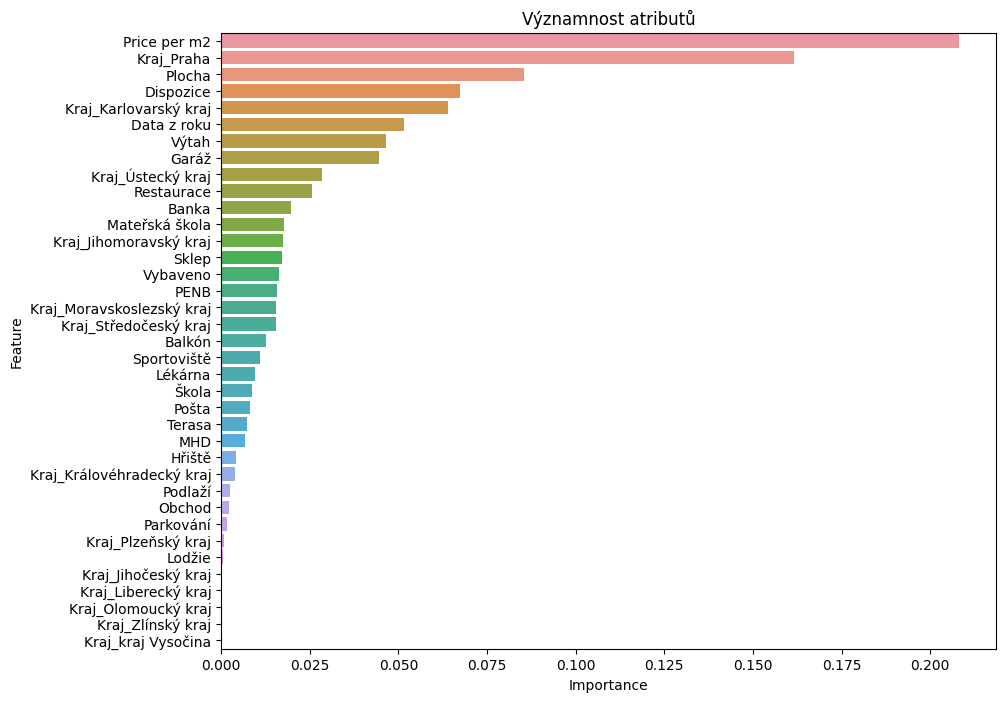

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Významnost atributů')
plt.show()

In [71]:
new_house_details = {
    'Kraj': 'Moravskoslezský kraj',
    'Dispozice': '3+1',
    'Plocha': 61,
    'Podlaží': 9,
    'PENB': 'F',
    'Vybaveno': 'Částečně',
    'Balkón': 1,
    'Terasa': 0,
    'Sklep': 0,
    'Lodžie': 0,
    'Parkování': 1,
    'Výtah': 0,
    'Garáž': 0,
    'MHD': 300,
    'Pošta': 800,
    'Obchod': 200,
    'Banka': 500,
    'Restaurace': 50,
    'Lékárna': 700,
    'Škola': 400,
    'Mateřská škola': 300,
    'Sportoviště': 800,
    'Hřiště': 200,
    'Data z roku': 2023,
    'Price per m2': 45081
}

new_data_raw = pd.DataFrame([new_house_details])


In [72]:
# First, convert 'Dispozice' and 'PENB' to numeric
new_data_raw['Dispozice'] = new_data_raw['Dispozice'].map(dispozice_mapping)
new_data_raw['PENB'] = new_data_raw['PENB'].map(penb_mapping)
new_data_raw['Vybaveno'] = new_data_raw['Vybaveno'].map(vybaveno_mapping)

# Then, use One-Hot Encoding for the 'Kraj' column
new_data_raw = pd.get_dummies(new_data_raw, columns=['Kraj'])

# Now, add missing (dummy) columns if any. Fill them with zeros
missing_cols = set(X.columns) - set(new_data_raw.columns)
for c in missing_cols:
    new_data_raw[c] = 0

# Ensure the order of column in the test set is in the same order than in train set
new_data_raw = new_data_raw[X.columns]

# Then, scale the columns that need to be scaled
new_data_raw[cols_to_scale] = scaler.transform(new_data_raw[cols_to_scale])

In [73]:
prediction = grid.best_estimator_.predict(new_data_raw)

In [74]:
# Reshape the prediction to 2D array for inverse transform
prediction = prediction.reshape(-1, 1)

# Use scaler_cena to inverse transform the prediction
prediction_original_scale = scaler_cena.inverse_transform(prediction)

print(f'The predicted price of the house (in original units) is: {prediction_original_scale[0][0]}')

The predicted price of the house (in original units) is: 2858642.5


## Classification

In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder


df = df_prodej.copy()

df = df.drop(columns=['Typ nabídky', 'Podlaží', 'Výtah', 'Garáž', 'MHD', 'Pošta', 'Obchod', 'Banka', 'Restaurace', 'Lékárna', 'Škola', 'Mateřská škola', 'Sportoviště', 'Hřiště'])

columns_to_drop = ['Ostatní', 'Unknown', 'Garsoniéra', '6+1', '5+kk', '5+1']
df = df[~df['Dispozice'].isin(columns_to_drop)]

In [76]:
# Convert 'Cena' and 'Plocha' columns to categorical
df['Cena'] = pd.qcut(df['Cena'], q=5, labels=['velmi levný', 'levný', 'střední', 'drahý', 'velmi drahý'])
df['Plocha'] = pd.qcut(df['Plocha'], q=5, labels=['velmi malá', 'malá', 'střední', 'velká', 'velmi velká'])

columns_to_drop = ['Unknown']
df = df[~df['PENB'].isin(columns_to_drop)]



In [77]:
display(df.head(20))

,Cena,Kraj,Dispozice,Stav,Vlastnictví,Typ budovy,Plocha,Vybaveno,PENB,Balkón,Terasa,Sklep,Lodžie,Parkování,Data z roku
0,levný,Moravskoslezský kraj,3+1,Velmi dobrý,Družstevní,Panel,střední,Částečně,F,1,0,1,0,1,2023
1,levný,Ústecký kraj,2+1,Dobrý,Osobní,Cihla,střední,Částečně,G,0,0,0,0,1,2023
3,levný,Moravskoslezský kraj,3+1,Dobrý,Družstevní,Panel,střední,Částečně,G,0,0,0,1,0,2023
5,drahý,Praha,1+kk,Velmi dobrý,Osobní,Cihla,velmi malá,Vybaveno,G,0,0,0,0,1,2023
6,drahý,Praha,3+kk,Dobrý,Osobní,Panel,střední,Částečně,G,0,0,1,1,0,2023
8,střední,Jihomoravský kraj,3+1,Velmi dobrý,Osobní,Panel,velká,Částečně,G,0,0,1,0,1,2023
11,střední,Jihočeský kraj,2+kk,Ve výstavbě,Osobní,Nízkoenergetický,malá,Nevybaveno,B,0,1,0,0,1,2023
12,střední,Praha,2+kk,Novostavba,Družstevní,Cihla,střední,Nevybaveno,B,0,0,0,0,1,2023
13,velmi levný,Moravskoslezský kraj,1+kk,Velmi dobrý,Družstevní,Panel,velmi malá,Vybaveno,G,0,0,0,0,1,2023
14,velmi levný,Ústecký kraj,2+1,Velmi dobrý,Osobní,Cihla,střední,Částečně,G,0,0,0,0,1,2023


In [78]:
print(df.columns)

Index(['Cena', 'Kraj', 'Dispozice', 'Stav', 'Vlastnictví', 'Typ budovy',
       'Plocha', 'Vybaveno', 'PENB', 'Balkón', 'Terasa', 'Sklep', 'Lodžie',
       'Parkování', 'Data z roku'],
      dtype='object')


In [79]:
from imblearn.over_sampling import SMOTE

# Isolate the PENB column before one-hot encoding the DataFrame
PENB = df['PENB']

# Drop the 'PENB' column from df
df = df.drop(columns=['PENB'])

# Perform one-hot encoding on the rest of df
df = pd.get_dummies(df)

# Now add the PENB column back to df
df['PENB'] = PENB

# Convert 'PENB' column to categorical using label encoding
le = LabelEncoder()
df['PENB'] = le.fit_transform(df['PENB'])

# Now you can split your data and use 'PENB' as your target variable
y = df['PENB']
X = df.drop('PENB', axis=1)

# Handling class imbalance using SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)



In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid for RandomForest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

# Create a base model
rf = RandomForestClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Use the best model
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f'RandomForest Accuracy: {accuracy}')
print(f'RandomForest Precision: {precision}')
print(f'RandomForest Recall: {recall}')
print(f'RandomForest F1-Score: {f1}')

cm = confusion_matrix(y_test, y_pred)
print('RandomForest Confusion Matrix:')
print(cm)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


RandomForest Accuracy: 0.8319405756731661
RandomForest Precision: 0.8314932617481036
RandomForest Recall: 0.8350561159097614
RandomForest F1-Score: 0.8319743673250545
RandomForest Confusion Matrix:
[[151   4   0   1   0   0   4]
 [ 14 108   6   5   0   0   4]
 [  4  11 116  19   1   0  15]
 [  2   4   6 130   4   1   6]
 [  2   0   0   0 137   2   4]
 [  0   0   1   0   0 148   3]
 [  3  15  23  13   4   0 106]]


In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

models = [
    ('RandomForest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('SVM', SVC(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    print(f'{name} Accuracy: {accuracy}')
    print(f'{name} Precision: {precision}')
    print(f'{name} Recall: {recall}')
    print(f'{name} F1-Score: {f1}')
    cm = confusion_matrix(y_test, y_pred)
    print(f'{name} Confusion Matrix:')
    print(cm)

d:\Python\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


RandomForest Accuracy: 0.8310120705663882
RandomForest Precision: 0.830375795363226
RandomForest Recall: 0.8349425282259426
RandomForest F1-Score: 0.8310725784116452
RandomForest Confusion Matrix:
[[151   4   0   1   0   0   4]
 [ 12 113   3   4   1   0   4]
 [  5  10 118  18   1   0  14]
 [  2   4   7 128   4   1   7]
 [  2   0   0   0 138   2   3]
 [  0   1   2   0   0 147   2]
 [  4  15  29  12   3   1 100]]


d:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.5636025998142989
Logistic Regression Precision: 0.5550030970415251
Logistic Regression Recall: 0.5661780773057412
Logistic Regression F1-Score: 0.5575649373495136
Logistic Regression Confusion Matrix:
[[111  18   8   4   2  14   3]
 [ 31  67  13  12   0   7   7]
 [ 14  15  52  30   9  11  35]
 [  9   4  21  61  39   8  11]
 [  8   0   0  17 102  12   6]
 [  0   0   5   4  15 125   3]
 [  6  11  32  20   5   1  89]]


d:\Python\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Accuracy: 0.12720519962859797
SVM Precision: 0.018172171375513996
SVM Recall: 0.14285714285714285
SVM F1-Score: 0.03224288067780655
SVM Confusion Matrix:
[[  0 160   0   0   0   0   0]
 [  0 137   0   0   0   0   0]
 [  0 166   0   0   0   0   0]
 [  0 153   0   0   0   0   0]
 [  0 145   0   0   0   0   0]
 [  0 152   0   0   0   0   0]
 [  0 164   0   0   0   0   0]]
KNN Accuracy: 0.7493036211699164
KNN Precision: 0.7513058301320799
KNN Recall: 0.7566269334646757
KNN F1-Score: 0.7308298576225833
KNN Confusion Matrix:
[[150   3   1   1   1   2   2]
 [ 21 107   1   4   3   0   1]
 [  9   7 110  21   6   7   6]
 [  8   5  11 110  15   1   3]
 [  2   0   0   0 140   3   0]
 [  0   0   0   2   0 150   0]
 [ 11  16  41  34  12  10  40]]
Gradient Boosting Accuracy: 0.7056638811513464
Gradient Boosting Precision: 0.6993028730248182
Gradient Boosting Recall: 0.7104349077359914
Gradient Boosting F1-Score: 0.7011736570757804
Gradient Boosting Confusion Matrix:
[[143   4   3   2   2   4   2]

In [82]:
# Create the new dataset
new_data = pd.DataFrame({
    'Cena': ['střední'],
    'Kraj': ['Jihočeský kraj'],
    'Dispozice': ['2+kk'],
    'Stav': ['Ve výstavbě'],
    'Vlastnictví': ['Osobní'],
    'Typ budovy': ['Nízkoenergetický'],
    'Plocha': ['malá'],
    'Vybaveno': ['Nevybaveno'],
    'Balkón': [1],
    'Terasa': [0],
    'Sklep': [1],
    'Lodžie': [0],
    'Parkování': [1],
    'Data z roku': [2023]
})

# Convert the categorical variables into dummy/indicator variables
new_data_encoded = pd.get_dummies(new_data)

# Ensure the new data has the same columns as the training set
missing_cols = set(X_train.columns) - set(new_data_encoded.columns)
for c in missing_cols:
    new_data_encoded[c] = 0
new_data_encoded = new_data_encoded[X_train.columns]

# Predict the PENB using the trained model
predicted_penb_encoded = best_model.predict(new_data_encoded)

# Decode the predicted PENB
predicted_penb = le.inverse_transform(predicted_penb_encoded)

print(f'The predicted PENB is: {predicted_penb[0]}')

The predicted PENB is: B


## Clustering

In [83]:
import pandas as pd

original_df = df_prodej.copy()

original_df = original_df.drop(columns=['Typ nabídky', 'Vlastnictví', 'Typ budovy', 'Vybaveno', 'Stav'])

columns_to_drop = ['Ostatní', 'Unknown', 'Garsoniéra', '6+1', '5+kk', '5+1']
original_df = original_df[~original_df['Dispozice'].isin(columns_to_drop)]

df = original_df.copy()

In [84]:
# Define the order for each column
dispozice_order = ['1+kk', '1+1', '2+kk', '2+1', '3+kk', '3+1', '4+kk', '4+1']
penb_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'Unknown']

# Create a mapping from category to number for each column
dispozice_mapping = {category: i for i, category in enumerate(dispozice_order)}
penb_mapping = {category: i for i, category in enumerate(penb_order)}

# Apply the mapping to the corresponding column
df['Dispozice'] = df['Dispozice'].map(dispozice_mapping)
df['PENB'] = df['PENB'].map(penb_mapping)

label_encoder = LabelEncoder()

for col in ['Dispozice', 'PENB']:
    df[col] = label_encoder.fit_transform(df[col])

In [85]:
df = pd.get_dummies(df, columns=['Kraj'])

In [86]:
print(df.head())

      Cena  Dispozice  Plocha  Podlaží  PENB  Balkón  Terasa  Sklep  Lodžie  \
0  2750000          5      61        9     5       1       0      1       0   
1  2300000          3      58        1     6       0       0      0       0   
3  2260000          5      67        1     6       0       0      0       1   
4  5356000          3      61        5     7       0       0      0       0   
5  5500000          0      38        1     6       0       0      0       0   

   Parkování  Výtah  Garáž  MHD  Pošta  Obchod  Banka  Restaurace  Lékárna  \
0          1      1      0  258   1324     150   1454          20      766   
1          1      0      0  236    662     668    978         334      705   
3          0      0      0  772   1320     529   2083         499      482   
4          0      0      0  394   1073     446   2694         523      547   
5          1      0      0  387   7774     365   7888        1389     7966   

   Škola  Mateřská škola  Sportoviště  Hřiště  Data z ro

In [87]:
# Define columns to be scaled
cols_to_scale = df.drop(columns=['Cena']).select_dtypes(include=['float64', 'int64']).columns

# Create a scaler object for the features
scaler = StandardScaler()

# Fit and transform the data for the features
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# Create a separate scaler object for the target 'Cena'
scaler_cena = StandardScaler()

# Fit and transform the data for 'Cena'
df['Cena'] = scaler_cena.fit_transform(df[['Cena']])

In [88]:
from sklearn.cluster import KMeans

# Define the number of clusters you want. Here I'm using 3 as an example.
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the data
kmeans.fit(df)

# Get the cluster assignments for each data point
clusters = kmeans.labels_

# Add the cluster assignments to your dataframe
df['Cluster'] = clusters

d:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


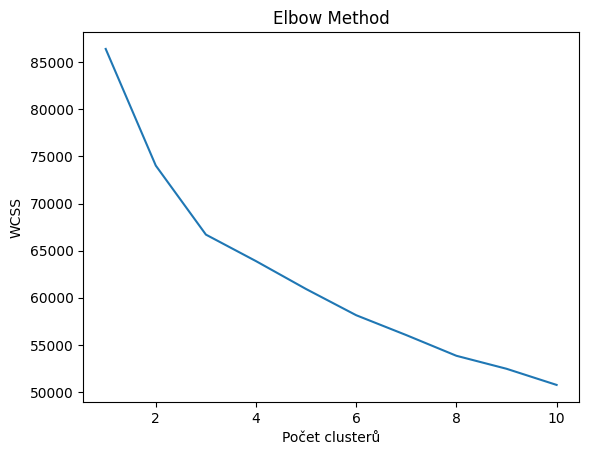

In [89]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Počet clusterů')
plt.ylabel('WCSS')  # within cluster sum of squares
plt.show()

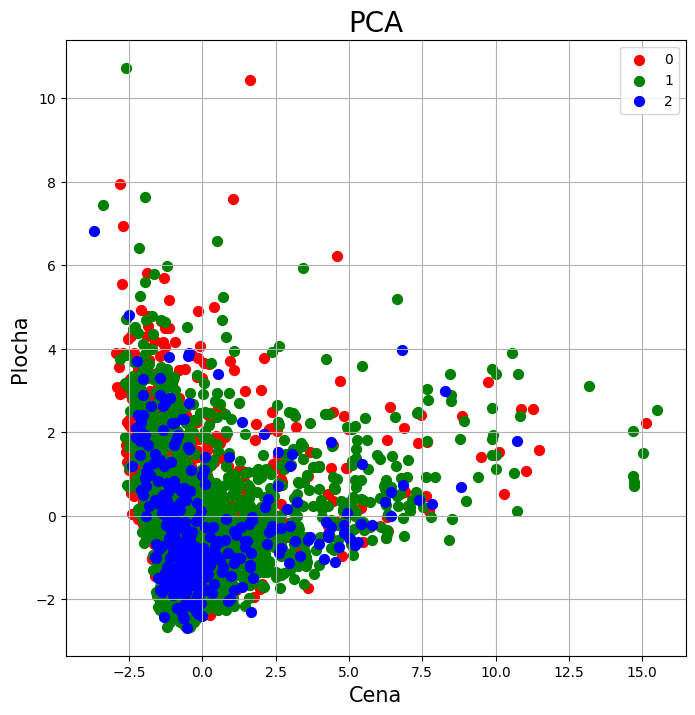

In [90]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df.drop('Cluster', axis=1))

# Create a DataFrame with the two components
principalDf = pd.DataFrame(data = principalComponents, columns = ['Cena', 'Plocha'])

# Concatenate the clusters to the DataFrame
finalDf = pd.concat([principalDf, df[['Cluster']]], axis = 1)

# Visualize 2D Projection
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Cena', fontsize = 15)
ax.set_ylabel('Plocha', fontsize = 15)
ax.set_title('PCA', fontsize = 20)

# Color map
colors = ['r', 'g', 'b']  # Add more colors here if you have more than 3 clusters

# Plot each cluster
for cluster, color in zip(df['Cluster'].unique(), colors):
    indicesToKeep = finalDf['Cluster'] == cluster
    ax.scatter(finalDf.loc[indicesToKeep, 'Cena']
               , finalDf.loc[indicesToKeep, 'Plocha']
               , c = color
               , s = 50)

ax.legend(df['Cluster'].unique())
ax.grid()

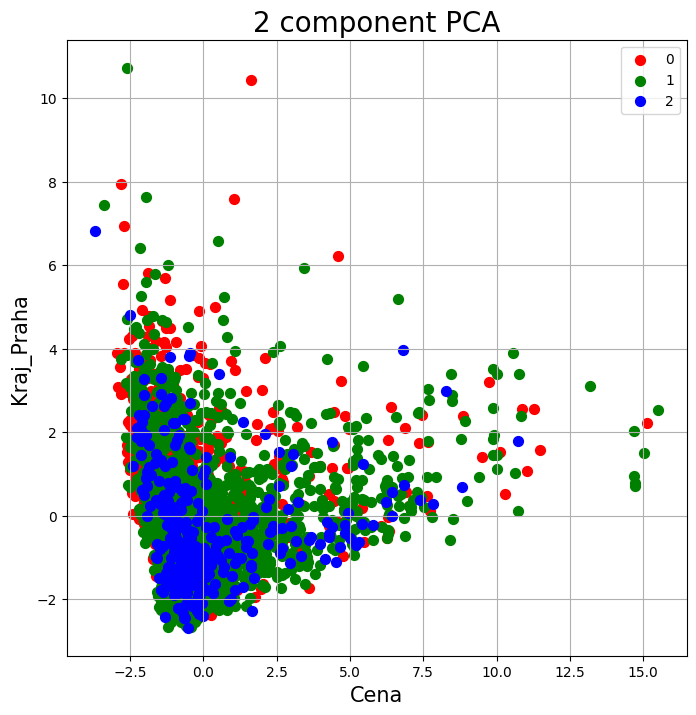

In [91]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df.drop('Cluster', axis=1))

# Create a DataFrame with the two components
principalDf = pd.DataFrame(data = principalComponents, columns = ['Cena', 'Kraj_Praha'])

# Concatenate the clusters to the DataFrame
finalDf = pd.concat([principalDf, df[['Cluster']]], axis = 1)

# Visualize 2D Projection
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Cena', fontsize = 15)
ax.set_ylabel('Kraj_Praha', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

# Color map
colors = ['r', 'g', 'b']  # Add more colors here if you have more than 3 clusters

# Plot each cluster
for cluster, color in zip(df['Cluster'].unique(), colors):
    indicesToKeep = finalDf['Cluster'] == cluster
    ax.scatter(finalDf.loc[indicesToKeep, 'Cena']
               , finalDf.loc[indicesToKeep, 'Kraj_Praha']
               , c = color
               , s = 50)

ax.legend(df['Cluster'].unique())
ax.grid()

In [92]:
# Assign clusters back to the original (pre-scaled) dataframe
original_df['Cluster'] = df['Cluster']

# Get the median of each column within each cluster
cluster_medians = original_df.groupby('Cluster').median()

# Print the medians for each cluster
print(cluster_medians)

              Cena  Plocha  Podlaží  Balkón  Terasa  Sklep  Lodžie  Parkování  \
Cluster                                                                         
0        6500000.0    63.0      3.0     0.0     0.0    1.0     0.0        0.0   
1        3090000.0    62.0      3.0     0.0     0.0    0.0     0.0        0.0   
2        2771000.0    65.0      2.0     0.0     0.0    0.0     0.0        1.0   

         Výtah  Garáž    MHD  Pošta  Obchod   Banka  Restaurace  Lékárna  \
Cluster                                                                    
0          1.0    0.0  224.0  673.0   291.5   815.0       329.5    529.0   
1          0.0    0.0  231.0  662.0   354.0  1223.0       405.0    608.5   
2          0.0    0.0  351.0  811.0  2000.0  6181.0      2738.0   4978.0   

          Škola  Mateřská škola  Sportoviště  Hřiště  Data z roku  
Cluster                                                            
0         498.0           561.0        741.5   306.0       2022.0  
1        